# Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 

recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:

* Which variables are important to predict the price of variable?
* How do these variables describe the price of the house?

## Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

## Technical Requirements:

* Data contains 1460 entries each having 81 variables.
* Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
* Extensive EDA has to be performed to gain relationships of important variable and price.
* Data contains numerical as well as categorical variable. You need to handle them accordingly.
* You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters. 
* You need to find important features which affect the price positively or negatively.
* Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.

The “Data file.csv” and “Data description.txt” are enclosed with this file

# Importing Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,r2_score,mean_squared_error,mean_absolute_error, plot_roc_curve
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the housing data by importing through pandas.
train_data = pd.read_csv('train.csv')
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [3]:
# reading the housing test data by importing data through pandas.
test_data = pd.read_csv('test.csv')
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [4]:
# combining the train data & test data into 1 data set to perform all the preprocessing in both data set.
data = pd.concat([train_data, test_data], axis = 0)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,NaN
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,NaN
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN


First we have combined the train data set & test data set in 1 data set so that we do not have to perform the preprocessing part in both data set we will perform all the preprocessing in combined data set & we will split them after performing the preprocessing.

# Data Reading & Understanding.

In [5]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice        292
Length: 81, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 291
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCo

In [7]:
# making a list of all null values column separate
nan_values = data.isna()
nan_columns = nan_values.any()
columns_with_nan = data.columns[nan_columns].tolist()
print(columns_with_nan,'\n')
print('Total Missing values columns are : ', len(columns_with_nan))


['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice'] 

Total Missing values columns are :  20


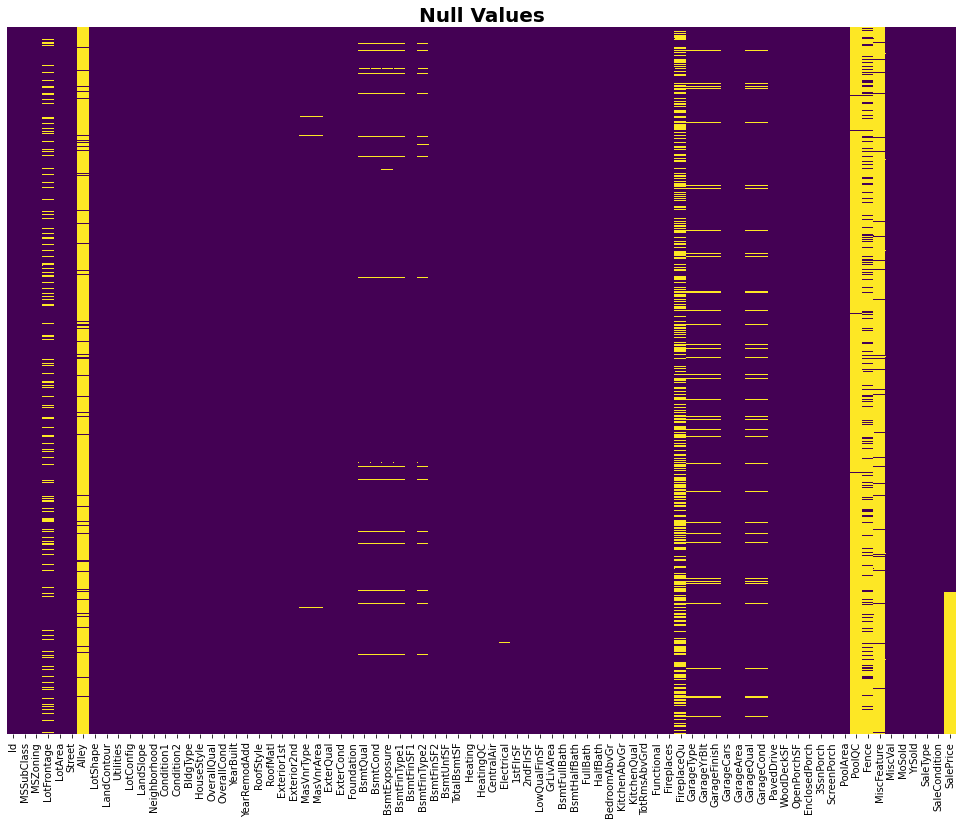

In [8]:
# visualizing the null values columns in data set by plotting heatmap
plt.figure(figsize = (17,13))
sns.heatmap(data.isna(),yticklabels = False, cbar = False, cmap = 'viridis')
plt.title('Null Values', fontweight = 'bold', fontsize = 20)
plt.show()

In [9]:
# making a list of object data type columns and getting the lentgh of all oject data type columns.
obj_data = (data.dtypes=='object')
columns_with_obj = data.columns[obj_data].tolist()
print(columns_with_obj, '\n')
print('Length of Object Data Type Columns : ', len(columns_with_obj))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

Length of Object Data Type Columns :  43


In [10]:
# making a list of integer data type columns and getting the lentgh of all integer data type columns.
int_data = (data.dtypes=='int64')
columns_with_int = data.columns[int_data].tolist()
print(columns_with_int, '\n')
print('Total Integer Data Types Columns are : ', len(columns_with_int))

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 

Total Integer Data Types Columns are :  34


In [11]:
# making a list of float data type columns and getting the lentgh of all float data type columns.
float_data = (data.dtypes=='float')
columns_with_float = data.columns[float_data].to_list()
print(columns_with_float, '\n')
print('Total Float Data Types Columns are : ', len(columns_with_float))

['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'] 

Total Float Data Types Columns are :  4


## Conclusion of Reading & understanding the data.

We have imported the Housing data & read it through pandas. We have Housing data in 2 parts in csv format. 1st part is training data & 2nd part is test data. We have to train & build the model on training data & test the model on testing data.

* In Housing train dataset it have a total of 1168 records(rows) & 81 columns.
* We found that there are 18 columns in the data set having null values & we have created a saperate list of all null values columns.
* We have visualized the null values by plotting through heatmap and found that there are 5 such columns which have very huge amount of null values. Some of them having more than 90% of data are null values.
* In the Data Set we found that there are 43 column's data type is object data type we have created a list of all object data type columns.
* 35 column's data type is integer data type. List was created for integer data type columns.
* And there are 3 columns having float data type columns. List was created for them as well.

The first task for us from now is treating the missing values. First we will try to fill out the null values in all the columns. It is difficult to fill more than 90% of null values in any column, fo those column first we will analyze the data it's relation with any other column, if we will be able to find any solution to fill the null values than we will surely do the task & if not so we will remove the column from the data set.

# Filling the Null Values.

### 1. Filling null Values in ```LotFrontage```

In [12]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [13]:
data['LotFrontage'].isnull().sum()

259

```LotFrontage``` is a continuous data type column, having 214 missiing values.

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

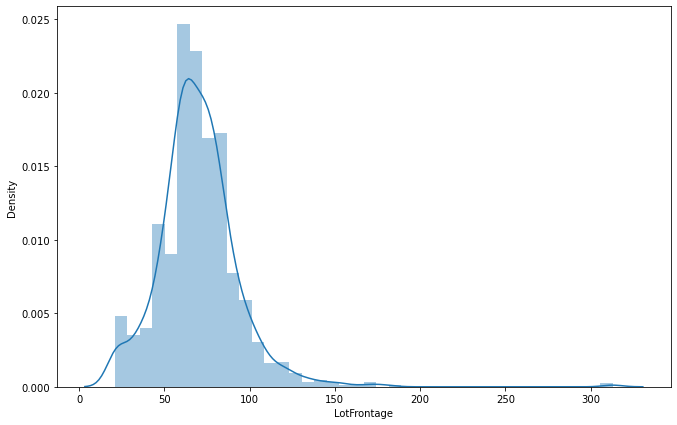

In [14]:
plt.figure(figsize = (11,7))
sns.distplot(data['LotFrontage'], bins = 40)

<AxesSubplot:xlabel='LotFrontage'>

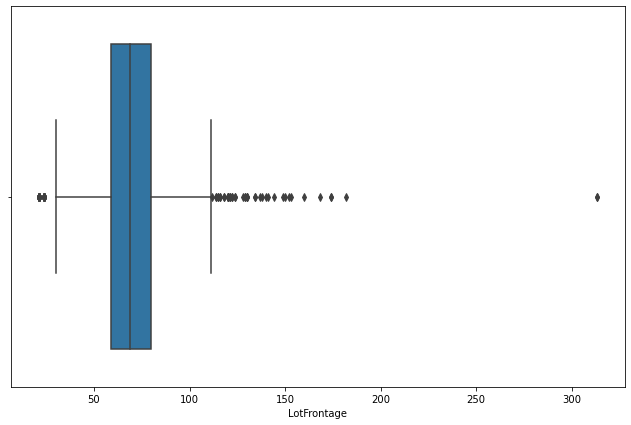

In [15]:
plt.figure(figsize = (11,7))
sns.boxplot(data['LotFrontage'])

It can be seen that ```LotFrontage``` column is a continuous column, so after tried various methods of filling NaN values we come with solution to fill the null values in this column by the mean value of the whole data inside the column. So we are replacing the null values in ```LotFrontage``` column with the mean value of it. We can see in the column description that mean value of the this column is 70.049958, which is very close to 70. We can see that the data type of this column is float but none of the data inside the column has any value after decimal points other than 0, but mean of the data has value after decimal point so we will consider the value of closest round off value of the mean value, which is 70.

In [16]:
# filling the null values in the lotfrontage column by round-off mean value of the data
data['LotFrontage'] = data['LotFrontage'].fillna(70)

### 2. Filling Null Values in ```MasVnrType```

In [17]:
data['MasVnrType'].describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [18]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

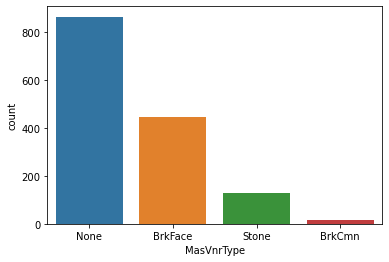

In [19]:
sns.countplot(data['MasVnrType'])

In [20]:
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

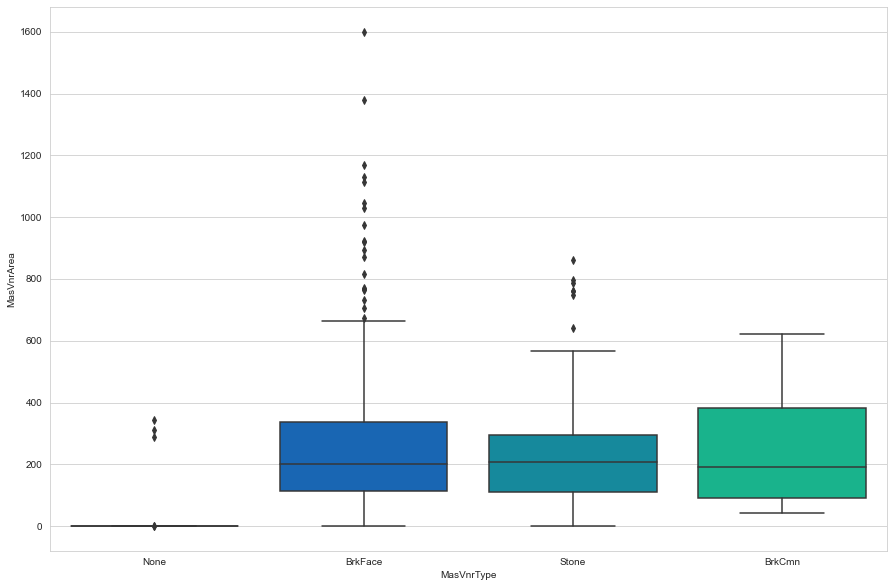

In [21]:
plt.figure(figsize = (15,10))
sns.set_style('whitegrid')
sns.boxplot(x = 'MasVnrType', y = 'MasVnrArea', data = data, palette = 'winter')
plt.show()

From the above data analysis & visualization of ```MasVnrType``` & ```MasVnrArea``` we learned that there is a relationship between both column. we have analysed that ```None``` category of ```MasVnrType``` column holds the maximum amount of values of ```MasVnrArea``` column & that is 0. We have also analysed that other than ```None```, ```BrkFace``` holds the 2nd largest amount of values. Comparitively these 2 categories the other 2 categories holds very less amount of values.
​
So according to this analysis we are going to define a function where we will fill the null values in ```MasVnrType``` column, where if in the column ```MasVnrArea``` having ```value = 0``` we will fill the null values in ```MasVnrType``` column as a category ```None```, & if the value in ```MasVnrArea``` will be having other than 0 we will fill the null values in ```MasVnrType``` as a category ```BrkFace```.

In [22]:
# defining a def function to fill the null values in MasVnrType with respect to it's relation with MasVnrArea column.
def fill_MasVnrType (col):
    MasVnrType = col[0]
    MasVnrArea = col[1]
    
    if pd.isnull(MasVnrType):
        if MasVnrArea == 0.0:
            return 'None'
        else:
            return 'BrkFace'
    else:
        return MasVnrType

In [23]:
# filling the null values in MasVnrType by above defined function.
data['MasVnrType'] = data[['MasVnrType', 'MasVnrArea']].apply(fill_MasVnrType, axis = 1)

In [24]:
# rechecking the null values
data['MasVnrType'].isnull().sum()

0

In [25]:
# rechecking the MasVnrType data description.
data['MasVnrType'].describe()

count     1460
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [26]:
# rechecking the value counts of MasVnrType column
data['MasVnrType'].value_counts()

None       864
BrkFace    453
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

Null values of column ```MasVnrType``` has been filled we can see in above description and value counts of the column is that earliear it has 8 missing values and now no missing values are in there. We also can see that all the null values have been filled with category ```BrkFace``` as earlier it has counts of 445 & now the count is 453.

We are going to fill the null values in ```MasVnrArea``` in the same way of using the relationship of both the column used above.

### 3. Filling Null Values in ```MasVnrArea```.

In [27]:
np.where(data['MasVnrArea']==203)

(array([ 496, 1077], dtype=int64),)

In [28]:
np.where(data['MasVnrArea']==207)

(array([1373], dtype=int64),)

In [29]:
np.where(data['MasVnrArea']==193)

(array([], dtype=int64),)

In [30]:
def fill_MasVnrArea (col):
    MasVnrArea = col[0]
    MasVnrType = col[1]
    
    if pd.isnull(MasVnrArea):
        if MasVnrType == 'None':
            return 0                   # returning 0 because None category of MasVnrType having almost all MasVnrArea value as 0
        elif MasVnrType == 'BrkFace':
            return 203                 # returing 203 because mean value of MasVnrArea in BrkFace category is 203, considered.
        elif MasVnrType == 'Stone':
            return 207                 # returning 207 because mean value of MasVnrArea in Stone category is 207, considered.
        else:
            return 193                 # returning 193 because mean value of MasVnrArea in Brkcmn category is 193, considered.
    else:
        return MasVnrArea              # returning same values as it is where there is no null values in MasVnrArea column.

In [31]:
data['MasVnrArea'] = data[['MasVnrArea', 'MasVnrType']].apply(fill_MasVnrArea, axis = 1)

In [32]:
data['MasVnrArea'].isnull().sum()

0

In [33]:
np.where(data['MasVnrArea']==203)

(array([  68,   78,   99,  185,  224,  367,  496,  874, 1077, 1199],
       dtype=int64),)

In [34]:
np.where(data['MasVnrArea']==207)

(array([1373], dtype=int64),)

In [35]:
np.where(data['MasVnrArea']==193)

(array([], dtype=int64),)

Null values in column ```MasVnrArea``` has been filled and we have rechecked the the column and found that all null the values in the column ```MasVnrArea``` have been filled with number ```203``` which we defined to fill if and only if the value in ```MasVnrArea``` column is ```NaN``` and corrospond value in column ```MasVnrType``` is ```BrkFace```. We choose to fill it with 203 because the 203 is the mean value of ```MasVnrArea``` in ```BrkFace``` category.

### 4. Filling Null Values in ```BsmtQual```.

In [36]:
print(columns_with_nan)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice']


In [37]:
data['BsmtQual'].describe()

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

In [38]:
data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

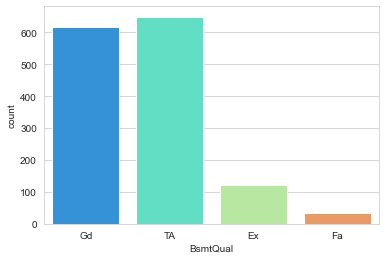

In [39]:
sns.countplot(data['BsmtQual'], palette = 'rainbow')

In [40]:
data['BsmtCond'].describe()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

In [41]:
data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

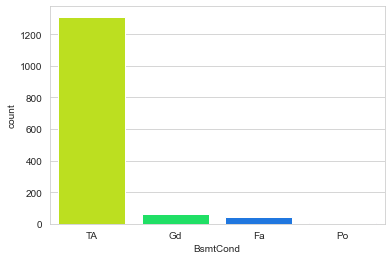

In [42]:
sns.countplot(data['BsmtCond'], palette = 'hsv')

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

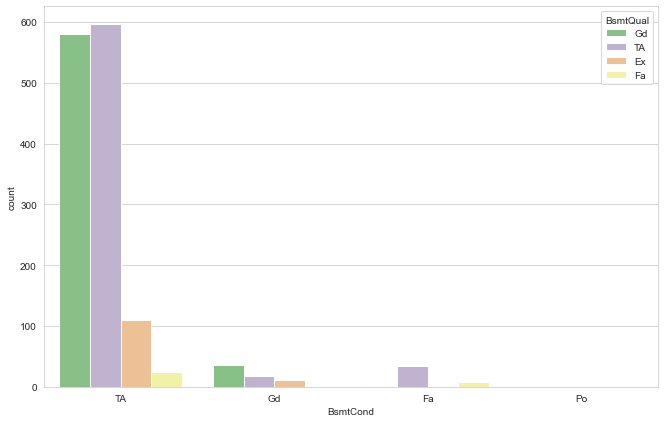

In [43]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtCond', hue = 'BsmtQual',data = data, palette = 'Accent')

In [44]:
data['BsmtExposure'].describe()

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

In [45]:
data['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

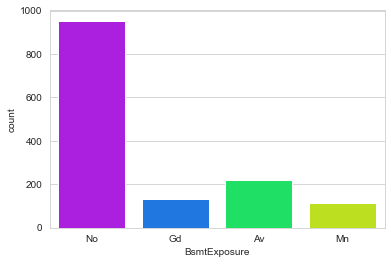

In [46]:
sns.countplot(data['BsmtExposure'], palette = 'hsv_r')

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

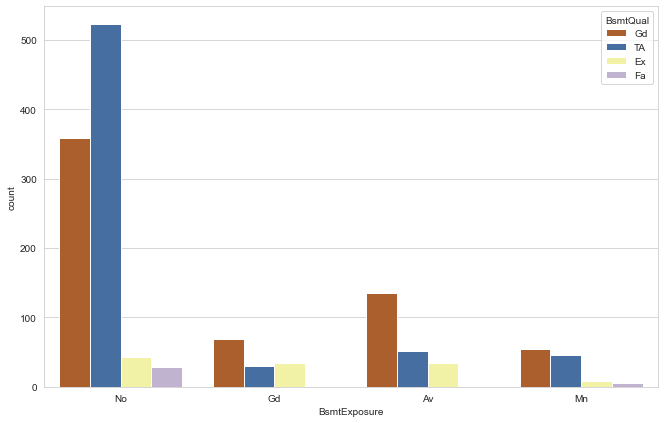

In [47]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtExposure', hue = 'BsmtQual',data = data, palette = 'Accent_r')

In [48]:
data['BsmtFinType1'].describe()

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

In [49]:
data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

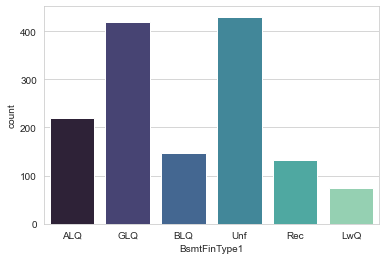

In [50]:
sns.countplot(data['BsmtFinType1'], palette = 'mako')

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

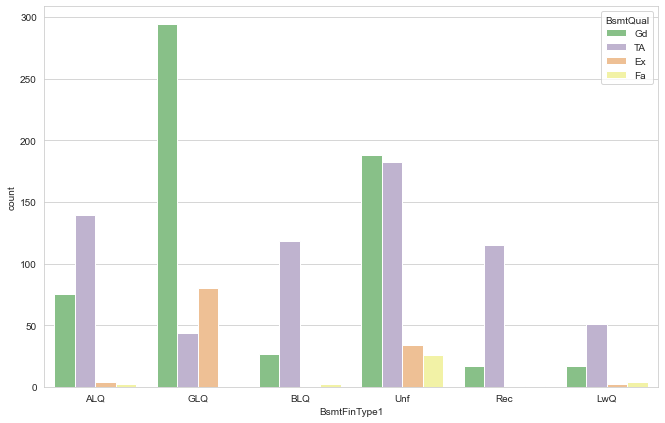

In [51]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtFinType1', hue = 'BsmtQual',data = data, palette = 'Accent')

In [52]:
data['BsmtFinType2'].describe()

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

In [53]:
data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

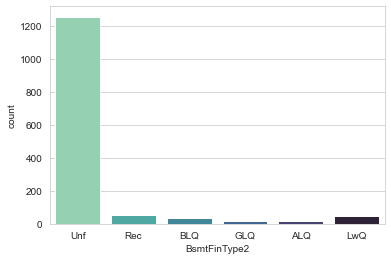

In [54]:
sns.countplot(data['BsmtFinType2'], palette = 'mako_r')

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

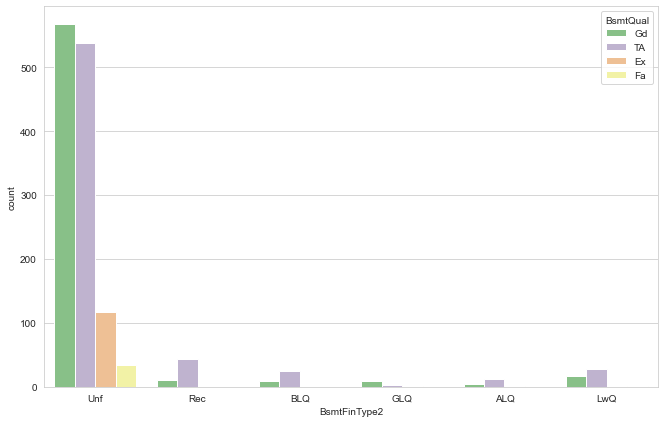

In [55]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtFinType2', hue = 'BsmtQual',data = data, palette = 'Accent')

From above analysis and visualization of all ```Basement``` reated column we analyzed the interrelation of ```BsmntQual``` column with all other ```Basement``` related column. Every column is related with each other and influencing the data in each other columns. From all these analysis we understand the relation between ```BsmntQual``` & ```BsmntFinType1``` column the most. So we decided the use ```BsmntFinType1``` column to define the function of filling Null values in ```BsmnQual``` column.

In [56]:
def fill_BsmntQual (col):
    BsmtQual = col[0]
    BsmtFinType1 = col[1]
    
    if pd.isnull(BsmtQual):
        if BsmtFinType1 == 'ALQ':
            return 'TA'
        elif BsmtFinType1 == 'GLQ':
            return 'Gd'
        elif BsmtFinType1 == 'BLQ':
            return 'TA'
        elif BsmtFinType1 == 'Unf':
            return 'Gd'
        elif BsmtFinType1 == 'Rec':
            return 'TA'
        else:
            return 'TA'
    else:
        return BsmtQual

In [57]:
data['BsmtQual'] = data[['BsmtQual', 'BsmtFinType1']].apply(fill_BsmntQual, axis = 1)

In [58]:
# rechecking the null values in the BsmtQual column
data['BsmtQual'].isnull().sum()

0

In [59]:
# rechecking the counts of value in BsmtQual column
data['BsmtQual'].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

Null Values in ```BsmtQual``` column has been filled with the help of defined function. We can see that al the null valyes in column ```BsmtQual``` is filled with ```TA``` category & also ```TA``` category was the most frequent category in the column.

### 5. Filling Null Values in ```BsmtCond```.

In [60]:
# checking the description of the column
data['BsmtCond'].describe()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

In [61]:
# checking the counts of categories of the column
data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

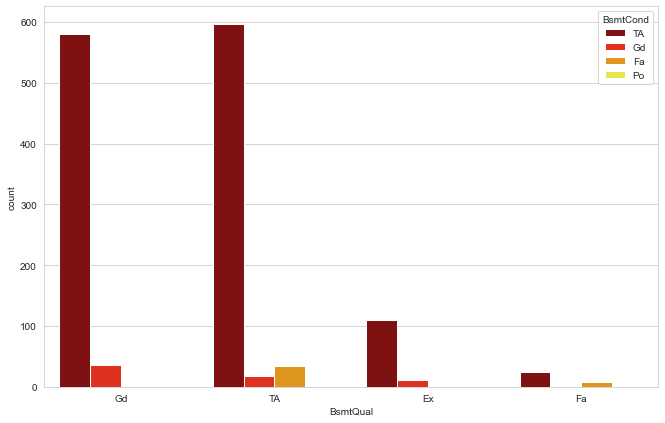

In [62]:
# relational countplot of column BsmtCond & BsmtQual
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtQual', hue = 'BsmtCond',data = data, palette = 'hot')

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

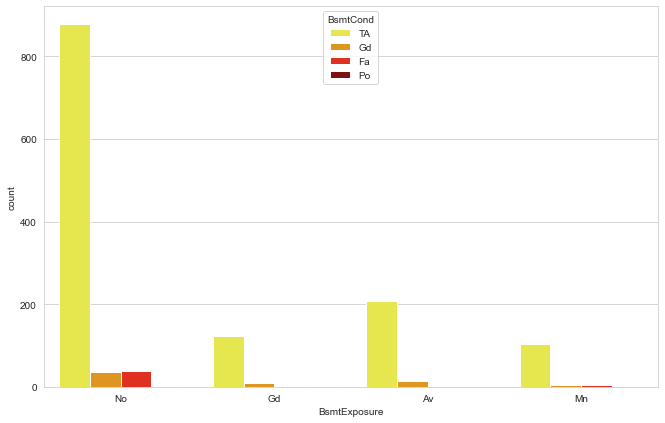

In [63]:
# relational countplot of column BsmtCond & BsmtExposure
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtExposure', hue = 'BsmtCond',data = data, palette = 'hot_r')

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

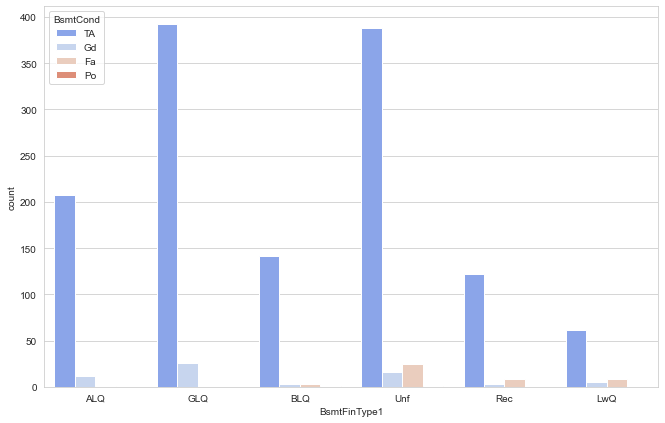

In [64]:
# relational countplot of column BsmtCond & BsmtFinType1
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtFinType1', hue = 'BsmtCond',data = data, palette = 'coolwarm')

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

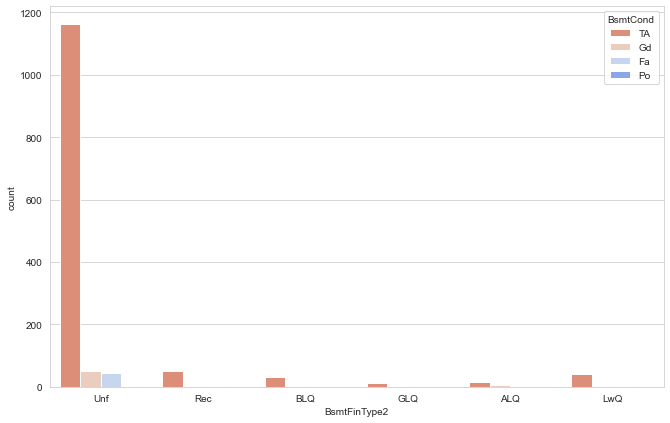

In [65]:
# relational countplot of column BsmtCond & BsmtFinType2
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtFinType2', hue = 'BsmtCond',data = data, palette = 'coolwarm_r')

From above analysis & visualization of ```BsmtCond``` with all other ```Basement``` related coluns we found that ```TA``` category in ```BsmtCond``` has the maximum occurence corrospond every categories in every other ```Basement``` related column and also it is a fact that ```TA``` category in ```BsmtCond``` column has highest number of value occurence That is why we are going to replace the null values with the Mode of the column.

In [66]:
# filling the null values in the BsmtCond column with te mode of the column
data['BsmtCond'] = data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])

In [67]:
# rechecking the sum of null values in column
data['BsmtCond'].isnull().sum()

0

In [68]:
# rechecking the counts of values in the column
data['BsmtCond'].value_counts()

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

Null values in ```BsmtCond``` column has been replaced with mode of the column which is ```TA```.

### 6. Filling Null Values in ```BsmtExposure```.

In [69]:
# checking the description of the column
data['BsmtExposure'].describe()

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

In [70]:
# checking the counts of the values in the column
data['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

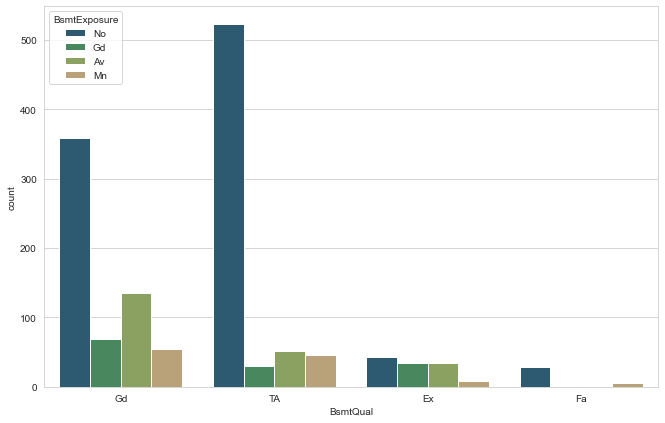

In [71]:
# relational countplot of column BsmtExposure & BsmtQual
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtQual', hue = 'BsmtExposure',data = data, palette = 'gist_earth')

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

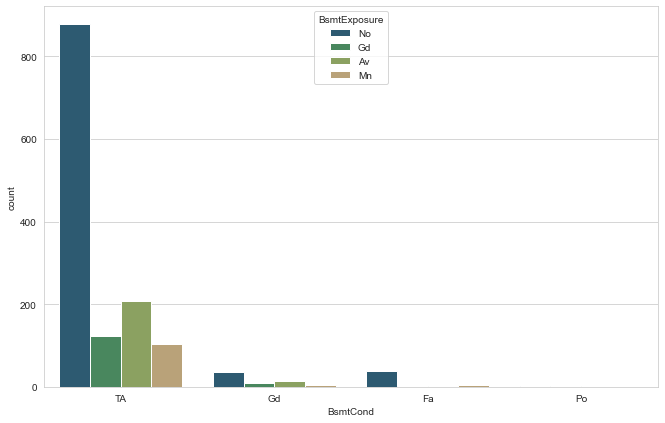

In [72]:
# relational countplot of column BsmtExposure & BsmtCond
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtCond', hue = 'BsmtExposure',data = data, palette = 'gist_earth')

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

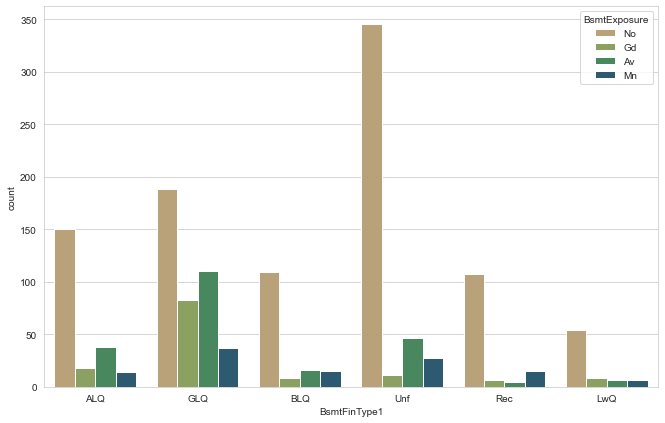

In [73]:
# relational countplot of column BsmtExposure & BsmtFinType1
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtFinType1', hue = 'BsmtExposure',data = data, palette = 'gist_earth_r')

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

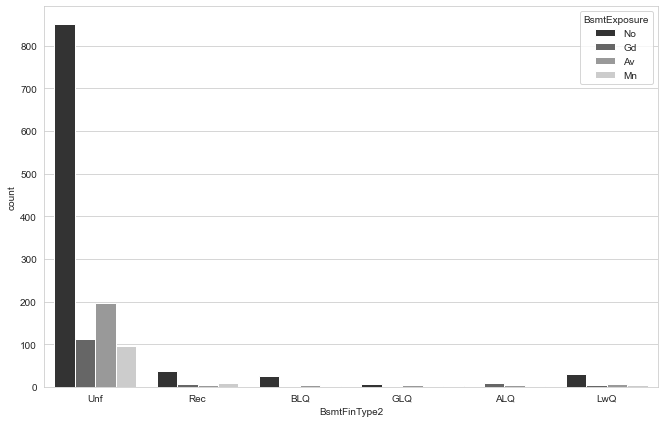

In [74]:
# relational countplot of column BsmtExposure & BsmtFinType2
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtFinType2', hue = 'BsmtExposure',data = data, palette = 'gist_gray')

From above analysis and visualization we found that ```No``` category in ```BsmtExosure``` column has the most number of frequency with respect to every other ```Basement``` column categories. And ```No``` category is also the Mode in ```BsmExposure``` column. So we are going to replace the null values in the column with the mode of the column.

In [75]:
# filling the null values in the column with the mode of the column
data['BsmtExposure'] = data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])

In [76]:
# rechecking the sum of null values in the column
data['BsmtExposure'].isnull().sum()

0

In [77]:
# rechecking the counts of the values in the column
data['BsmtExposure'].value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

### 7. Filling Null Values in ```BsmtFinType1```.

In [78]:
# checking the description of BsmtFinType1 column
data['BsmtFinType1'].describe()

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

In [79]:
# checking the counts of values in BsmtFinType1 column 
data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

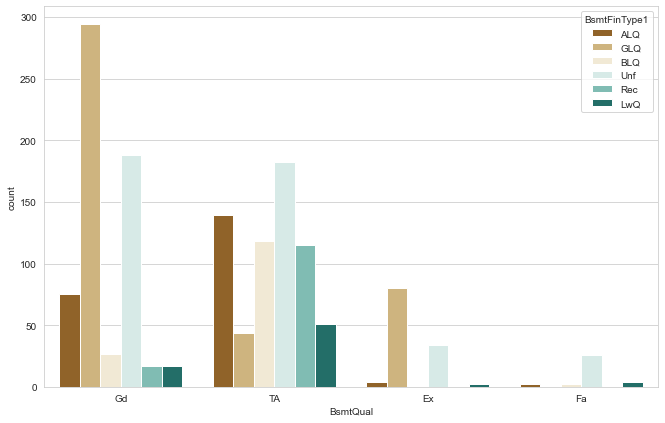

In [80]:
# relational countplot of column BsmtQual & BsmtFinType1
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtQual', hue = 'BsmtFinType1',data = data, palette = 'BrBG')

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

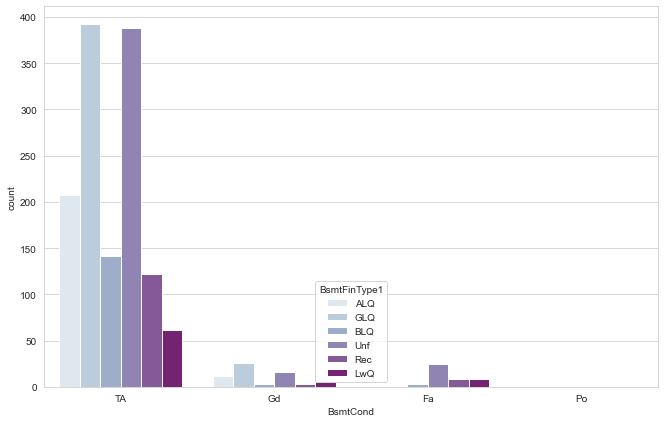

In [81]:
# relational countplot of column BsmtQual & BsmtFinType1
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtCond', hue = 'BsmtFinType1',data = data, palette = 'BuPu')

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

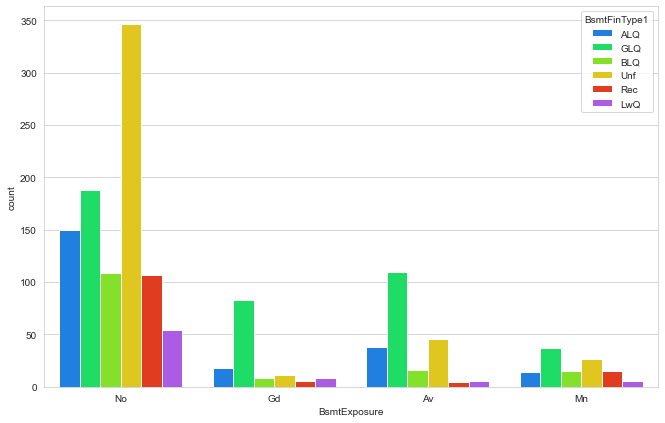

In [82]:
# relational countplot of column BsmtQual & BsmtFinType1
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtExposure', hue = 'BsmtFinType1',data = data, palette = 'gist_ncar')

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

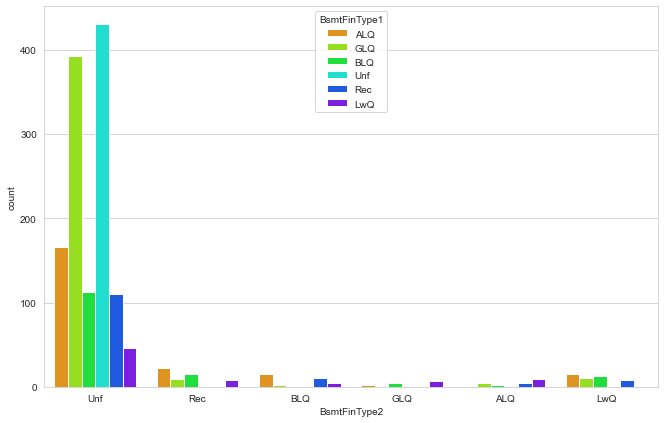

In [83]:
# relational countplot of column BsmtQual & BsmtFinType1
plt.figure(figsize = (11,7))
sns.countplot(x = 'BsmtFinType2', hue = 'BsmtFinType1',data = data, palette = 'gist_rainbow')

From the above analysis and visualization of relation of ```BsmtFinType1``` with all other ```Basement``` related column we understand the relation of ```BsmtFinType1``` & ```BsmtExposure``` the most. Hence we are going to define a function to fill the null values in ```BsmtFinType1``` column.

In [84]:
# defining a def function to fill the null values in BsmtFinType1 column
def fill_BsmtFinType1 (col):
    BsmtFinType1 = col[0]
    BsmtExposure = col[1]
    
    if pd.isnull(BsmtFinType1):
        if BsmtExposure == 'No':
            return 'Unf'
        else:
            return 'GLQ'
        
    else:
        return BsmtFinType1

In [85]:
# filling the null values in the BsmtFinType1 column with defined function
data['BsmtFinType1'] = data[['BsmtFinType1', 'BsmtExposure']].apply(fill_BsmtFinType1, axis = 1)

In [86]:
# rechecking the sum of null values in BsmtFinType1 column after filling the null values.
data['BsmtFinType1'].isnull().sum()

0

In [87]:
# rechecking the counts of value in the BsmtFinType1 column after filling the ull values
data['BsmtFinType1'].value_counts()

Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

Null values in ```BsmtFinType1``` column has been filled with the help of defined function and we can see that all the null values have been filled with category ```Unf```, which is also happens to be mode of the column.

### 8. Filling Null Values in ```BsmtFinType2```.

In [88]:
# checking the description of BsmtFinType2 column
data['BsmtFinType2'].describe()

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

In [89]:
# checking the counts of each category of the column BsmtFinType2
data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

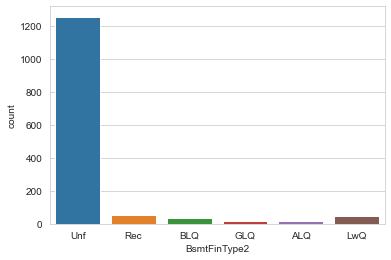

In [90]:
# plotting the countplot to visualize the distribution of the category on the column.
sns.countplot(data['BsmtFinType2'])

We can see in above visualization of ```BsmtFinType2``` column that ```Unf``` category has the highest number of counts and it is one side biased column. If we will compare it's relation with all other column we surely gonna find the influence of ```Unf``` category on each categories of each other column the most. Hence we are going to replace the mean of the column with the model of the column.

In [91]:
# filling the null values with mode of the column in BsmtFinType2
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])

In [92]:
# rechecking the sum of null values if any after filling the null values in the column BsmtFinType2.
data['BsmtFinType2'].isnull().sum()

0

In [93]:
# rechecking the counts of categories in BsmtFinType2 after filling the null values.
data['BsmtFinType2'].value_counts()

Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

The nul values in column```BsmtFinType2``` is filled with the mode value of the column. We can see in the value count code result that the count of ```Unf``` column has been incresed by the number which many were null values earliear.

In [94]:
print(columns_with_nan)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice']


### 9. Filling Null Values in ```Electrical```.

In [95]:
data['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [96]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

<AxesSubplot:xlabel='Electrical', ylabel='count'>

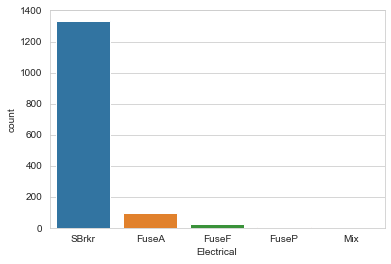

In [97]:
sns.countplot(data['Electrical'])

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

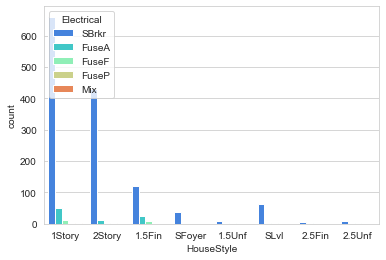

In [98]:
sns.countplot(x = 'HouseStyle', hue = 'Electrical', data = data, palette = 'rainbow')

We can see in above analysis and visualization that ```Sbrkr``` category of column ```Electrical``` has the highest counts & when we compared it's relation with ```HouseStyle``` column it seemed obvious that with each category of ```HouseStyle``` influence of ```Sbrkr``` will be the highest and it would be same if we will compare it with any other relatable column. So we are here going to fill the null values with the mode value of the column.

In [99]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [100]:
data['Electrical'].isnull().sum()

0

In [101]:
data['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Only 1 missing value was there in the column and that too is filled with the ```Sbrkr``` category as it is the highest count categroy of the column and we filled the null value with the mode value of the column.

### 10. Filling Null Values in ```FireplaceQu```.

In [102]:
data['FireplaceQu'].describe()

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object

In [103]:
data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

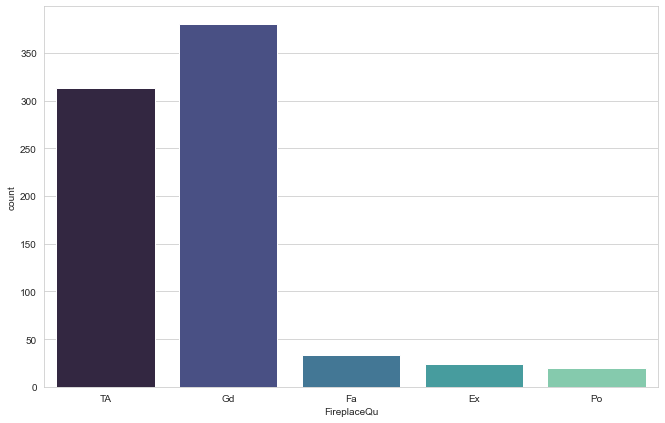

In [104]:
plt.figure(figsize = (11,7))
sns.countplot(data['FireplaceQu'], palette = 'mako')

<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

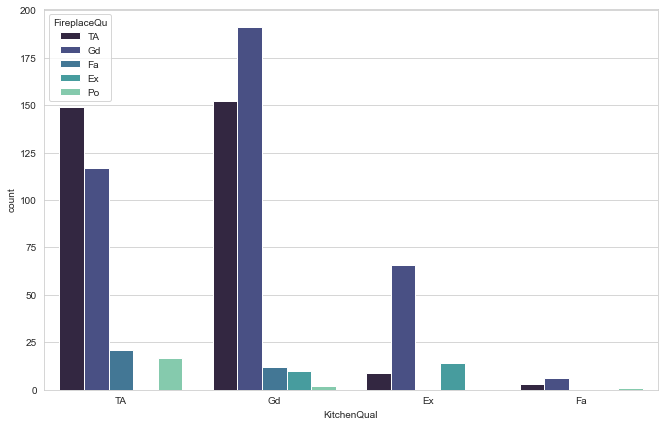

In [105]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'KitchenQual', hue = 'FireplaceQu', data = data, palette = 'mako')

In [106]:
def fill_FireplaceQu (col):
    FireplaceQu = col[0]
    KitchenQual = col[1]
    
    if pd.isnull(FireplaceQu):
        if KitchenQual == 'TA':
            return 'TA'
        elif KitchenQual == 'Gd':
            return 'Gd'
        elif KitchenQual == 'Ex':
            return 'Ex'
        elif KitchenQual == 'Fa':
            return 'Po'
        else:
            return 'Fa'
    else:
        return FireplaceQu  

In [107]:
data['FireplaceQu'] = data[['FireplaceQu', 'KitchenQual']].apply(fill_FireplaceQu, axis = 1)

In [108]:
data['FireplaceQu'].isnull().sum()

0

In [109]:
data['FireplaceQu'].value_counts()

TA    744
Gd    599
Po     49
Ex     35
Fa     33
Name: FireplaceQu, dtype: int64

We have successfully filled the null values in the column ```FireplaceQu``` as per it's relationship found with column ```KitchenQual```, we can see that except ```Fa``` null values filled withh all the unique points.

In [110]:
print(columns_with_nan)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice']


### 11. Filling Null Values in ```GarageType```.

In [111]:
data['GarageType'].describe()

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

In [112]:
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [113]:
data['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

<AxesSubplot:xlabel='LotShape', ylabel='count'>

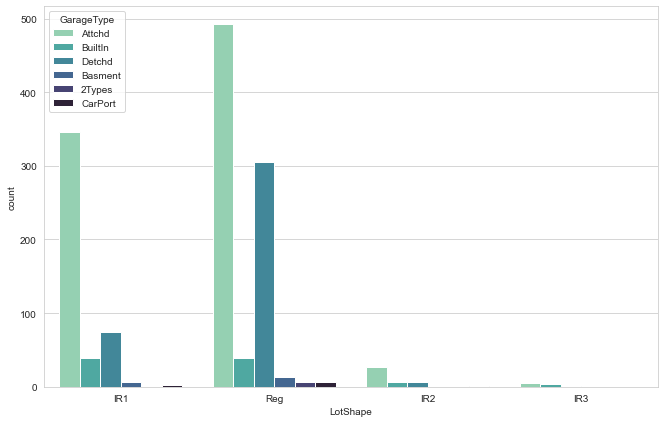

In [114]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'LotShape', hue = 'GarageType', data = data, palette = 'mako_r')

In [115]:
def fill_GarageType (col):
    GarageType = col[0]
    LotShape = col[1]
    
    if pd.isnull(GarageType):
        if LotShape == 'IR1':
            return 'Attchd'
        elif LotShape == 'Reg':
            return 'Detchd'
        elif LotShape == 'IR2':
            return 'BuiltIn'
        elif LotShape == 'IR3':
            return 'BuiltIn'
    else:
        return GarageType

In [116]:
data['GarageType'] = data[['GarageType', 'LotShape']].apply(fill_GarageType, axis = 1)

In [117]:
data['GarageType'].isnull().sum()

0

In [118]:
data['GarageType'].value_counts()

Attchd     887
Detchd     451
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

We have successfully filled the null values in column ```GarageType``` as per it's relationship with the column ```LotShape```. We can see that the null values in the column ```GarageType``` has been filled with basically 2 of it's categories, which is ```Attchd``` & ```Detchd```.

### 12. Filling Null Values in ```GarageYrBlt```.

In [119]:
data['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [120]:
data['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1933.0     1
1900.0     1
1927.0     1
1908.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='GarageYrBlt'>

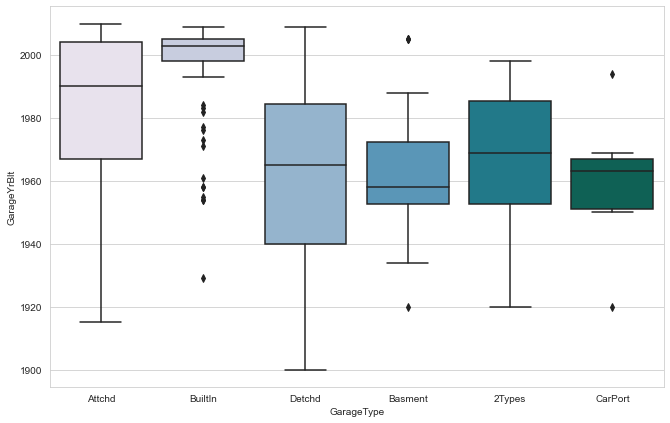

In [121]:
plt.figure(figsize = (11,7))
sns.boxplot(x = 'GarageType', y = 'GarageYrBlt', data = data, palette = 'PuBuGn')

In [122]:
def fill_GarageYrBlt (col):
    GarageYrBlt = col[0]
    GarageType = col[1]
    
    if pd.isnull(GarageYrBlt):
        if GarageType == 'Attchd':
            return 1990
        elif GarageType == 'BuiltIn':
            return 2003
        elif GarageType == 'Detchd':
            return 1965
        elif GarageType == 'Basment':
            return 1958
        elif GarageType == '2Types':
            return 1969
        else:
            return 1963
    else:
        return GarageYrBlt

In [123]:
data['GarageYrBlt'] = data[['GarageYrBlt', 'GarageType']].apply(fill_GarageYrBlt, axis = 1)

In [124]:
data['GarageYrBlt'].isnull().sum()

0

We have successfully filled the null values in ```GarageYrBlt``` column. We filled the null values in the column by analyzing it's relationship with the column ```GarageType```. Each category of ```GarageType``` column has limited ```GarageYrBlt``` & we filled the mean value of ```GarageYrBlt``` falling into each category of ```GarageType```.

### 13. Filling Null Values in ```GarageFinish```.

In [125]:
data['GarageFinish'].describe()

count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object

In [126]:
data['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='count'>

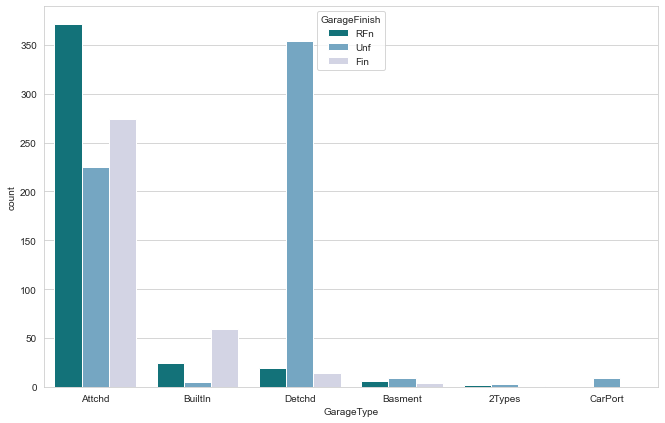

In [127]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'GarageType', hue = 'GarageFinish', data = data, palette = 'PuBuGn_r')

In [128]:
def fill_GarageFinish (col):
    GarageFinish = col[0]
    GarageType = col[1]
    
    if pd.isnull(GarageFinish):
        if GarageType == 'Attchd':
            return 'RFn'
        elif GarageType == 'BuiltIn':
            return "Fin"
        elif GarageType == 'Detchd':
            return 'Unf'
        elif GarageType == 'Basment':
            return 'Unf'
        elif Garagetype == '2Types':
            return 'Unf'
        else:
            return 'Unf'
        
    else:
        return GarageFinish

In [129]:
data['GarageFinish'] = data[['GarageFinish', 'GarageType']].apply(fill_GarageFinish, axis = 1)

In [130]:
data['GarageFinish'].isnull().sum()

0

In [131]:
data['GarageFinish'].value_counts()

Unf    669
RFn    439
Fin    352
Name: GarageFinish, dtype: int64

Null Values in column ```GarageFinish``` has been filled as per it's relation with column ```GarageType```. We found by analyzing the relationship of both column that each category of ```GarageFinish``` has highest count in at least one category of ```GarageType```. Thus we used to fill the null values with the category which has highest counts as per each category of ```GarageType```.

### 14. Filling Null Values in ```GarageQual```.


In [132]:
data['GarageQual'].describe()

count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object

In [133]:
data['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='count'>

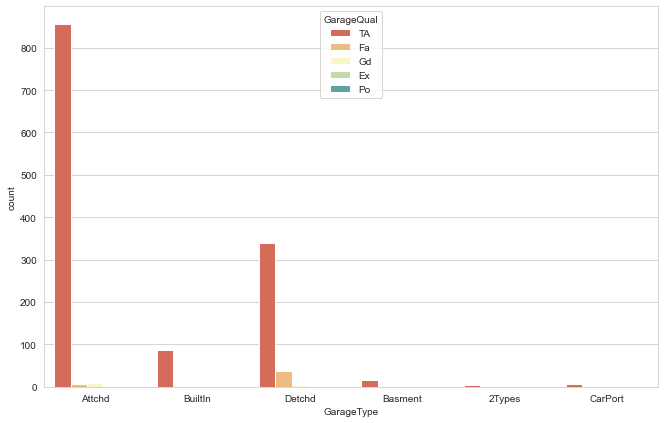

In [134]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'GarageType', hue = 'GarageQual', data = data, palette = 'Spectral')

In [135]:
def fill_GarageQual (col):
    GarageQual = col[0]
    GarageType = col[1]
    
    if pd.isnull(GarageQual):
        if GarageType == 'Detchd':
            return 'Fa'
        else:
            return 'TA'
    else:
        return GarageQual

In [136]:
data['GarageQual'] = data[['GarageQual', 'GarageType']].apply(fill_GarageQual, axis = 1)

In [137]:
data['GarageQual'].isnull().sum()

0

In [138]:
data['GarageQual'].value_counts()

TA    1328
Fa     112
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In above analyzation we found that the presence of ```TA``` category of column ```GarageQual``` has in each category of ```GarageType``` in highest counts but we have also seen that the presence of ```Fa``` category in majority is in ```Detchd``` category of column ```GarageType```, hence we filled the null values with category ```Fa``` if the correspond value of ```GarageType``` would be ```Detchd``` else we filled the null values with ```Ta``` category. 

And in result we can see that 64 null space has been filled with the category ```Fa``` and the rest of null space has been filled with ```TA``` category.

### 15. Filling Null Values in ```GarageCond```.

In [139]:
data['GarageCond'].describe()

count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object

In [140]:
data['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='count'>

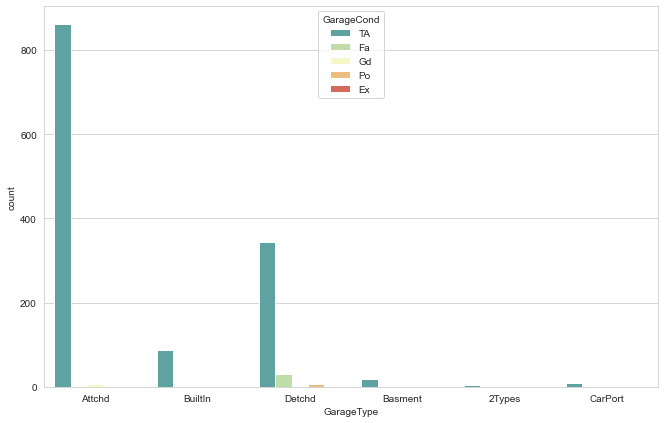

In [141]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'GarageType', hue = 'GarageCond', data = data, palette = 'Spectral_r')

In [142]:
def fill_GarageCond (col):
    GarageCond = col[0]
    GarageType = col[1]
    
    if pd.isnull(GarageCond):
        if GarageType == 'Detchd':
            return "Fa"
        else:
            return 'TA'
    else:
        return GarageCond


In [143]:
data['GarageCond'] = data[['GarageCond', 'GarageType']].apply(fill_GarageCond, axis = 1)

In [144]:
data['GarageCond'].isnull().sum()

0

In [145]:
data['GarageCond'].value_counts()

TA    1343
Fa      99
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

We analyzed & filled the null value in column ```GarageCond``` the same way we analyzed and filled the null value in ```GarageQual``` because it's relationship was found same as above we found.

### 16. Filling Null Values in ```PoolQC```.

In [146]:
data['PoolQC'].describe()

count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object

In [147]:
data['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

We are not going to fill the null values in column ```PoolQC``` because this column has only 7 counts of non-null values. 99.52% of the data in the column is null values hence it is better to drop this column. Hence we are ging to do the same.

### 17. Filling Null Values in ```Fence```.

In [148]:
data['Fence'].describe()

count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object

In [149]:
data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

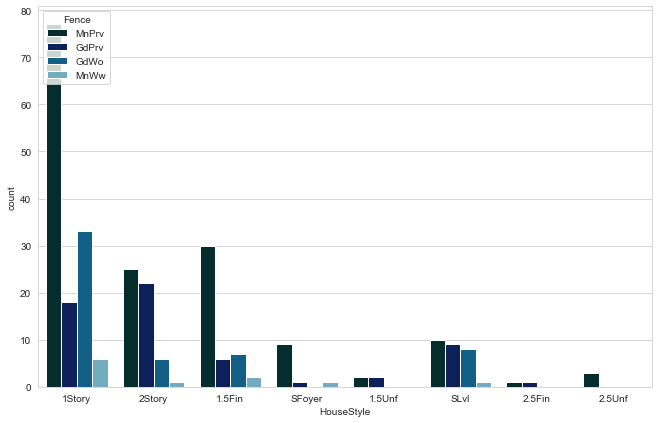

In [150]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'HouseStyle', hue = 'Fence', data = data, palette = 'ocean')

In [151]:
def fill_Fence (col):
    Fence = col[0]
    HouseStyle = col[1]
    
    if pd.isnull(Fence):
        if HouseStyle == '1Story':
            return 'MnPrv'
        elif HouseStyle == '2Story':
            return 'GdPrv'
        elif HouseStyle == '1.5Fin':
            return 'GdWo'
        elif HouseStyle == 'SFoyer':
            return 'MnWw'
        elif HouseStyle == '1.5Unf':
            return 'GdPrv'
        elif HouseStyle == 'Slvl':
            return 'GdWo'
        elif HouseStyle == '2.5Fin':
            return 'GdPrv'
        else:
            return 'MnPrv'
    else:
        return Fence

In [152]:
data['Fence'] = data[['Fence', 'HouseStyle']].apply(fill_Fence, axis = 1)

In [153]:
data['Fence'].isnull().sum()

0

In [154]:
data['Fence'].value_counts()

MnPrv    794
GdPrv    466
GdWo     163
MnWw      37
Name: Fence, dtype: int64

We have successfully filled the null values in ```Fence``` column by analyzed it's relationship with column ```HouseStyle```. While analyzation we found that each categories of column ```Fence``` was distributed with the categories of column ```HouseStyle```. So we did the feature engineering by defining a ```def``` function in which we defined the certain condition according to ```HouseStyle``` Column's category to fill the null values in column ```Fence``` with categories which is lined up with the correspondant categories of column ```HouseStyle```.

### 18. Filling Null Values in ```MiscFeature```.

In [155]:
data['MiscFeature'].describe()

count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object

In [156]:
data['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In Column ```MiscFeature``` 96.3% of data is missing, so we are not going to fill the null values in this column rather we will drop the column from the data.

### 19. Filling Null Values in ```Alley```.

In [157]:
data['Alley'].describe()

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

In [158]:
data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

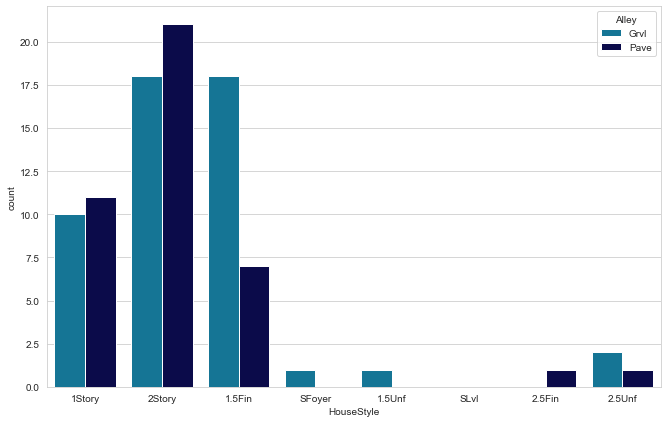

In [159]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'HouseStyle', hue = 'Alley', data = data, palette = 'ocean_r')

In [160]:
def fill_Alley (col):
    Alley = col[0]
    HouseStyle = col[1]
    
    if pd.isnull(Alley):
        if HouseStyle == '1Story':
            return 'Pave'
        elif HouseStyle == '2Story':
            return 'Grvl'
        elif HouseStyle == '1.5Fin':
            return 'Grvl'
        elif HouseStyle == 'SFoyer':
            return 'Grvl'
        elif HouseStyle == '1.5Unf':
            return 'Grvl'
        elif HouseStyle == 'Slvl':
            return 'NA'
        elif HouseStyle == '2.5Fin':
            return 'Pave'
        else:
            return 'Grvl'
    else:
        return Alley

In [161]:
data['Alley'] = data[['Alley', 'HouseStyle']].apply(fill_Alley, axis = 1)

In [162]:
data['Alley'].isnull().sum()

0

In [163]:
data['Alley'].value_counts()

Pave    753
Grvl    707
Name: Alley, dtype: int64

We have successfully filled the null values in column ```Alley``` according to it's relationship with the column ```HouseStyle``` by defining a ```def``` function and putting condition in function according to the categories distribution of column ```Alley``` with the categories of column ```HouseStyle```.

Here we are finished with the filling null values in the column. We have filled the null values in almost all the column. We left only 2 column having null values which are ```PoolQC``` & ```MiscFeature```. Both the column has more than 95% data missed hence we decided to drop these column from the data. Apart from these 2 columns we filled all the null values in rest of 17 columns which have null values.

## Dropping The Columns Which We Don't Require.

In [164]:
data = data.drop(columns = ['Id', 'PoolQC', 'MiscFeature'])
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.0,4928,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,2,2007,WD,Normal,128000.0
1,20,RL,95.0,15865,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,224,0,MnPrv,0,10,2007,WD,Normal,268000.0
2,60,RL,92.0,9920,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,...,0,0,0,GdPrv,0,6,2007,WD,Normal,269790.0
3,20,RL,105.0,11751,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,1,2010,COD,Normal,190000.0
4,20,RL,70.0,16635,Pave,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,MnPrv,0,6,2009,WD,Normal,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,RL,78.0,10206,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,10,2008,WD,Normal,NaN
288,20,RL,57.0,9245,Pave,Pave,IR2,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,2,2008,WD,Normal,NaN
289,20,RL,70.0,11241,Pave,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,MnPrv,700,3,2010,WD,Normal,NaN
290,50,RM,50.0,5000,Pave,Grvl,Reg,Lvl,AllPub,Corner,...,0,0,0,GdWo,0,10,2006,WD,Normal,NaN


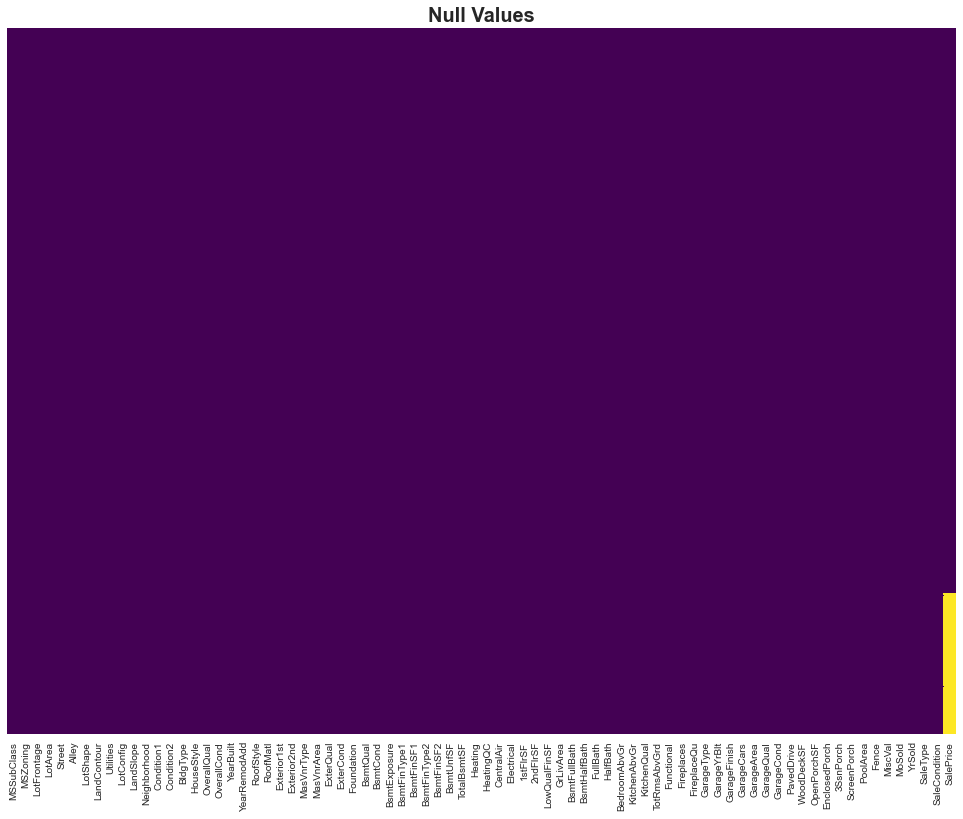

In [165]:
# visualizing the null values columns in data set by plotting heatmap
plt.figure(figsize = (17,13))
sns.heatmap(data.isna(),yticklabels = False, cbar = False, cmap = 'viridis')
plt.title('Null Values', fontweight = 'bold', fontsize = 20)
plt.show()

In above ```HeatMap``` we can see that we do not have any null values in any column except ```SalesPrice``` Column. The null values in ```SalesPrice``` column are the test data set which we will extract from the data after performing preprocessing to the whole data set.

# Exploratory Data Analysis & Visualization.

In [166]:
# making a list of integer data type columns and getting the lentgh of all integer data type columns.
int_data = (data.dtypes=='int64')
columns_with_int = data.columns[int_data].tolist()
print(columns_with_int, '\n')
print('Total Integer Data Types Columns are : ', len(columns_with_int))

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 

Total Integer Data Types Columns are :  33


In [167]:
# making a list of float data type columns and getting the lentgh of all float data type columns.
float_data = (data.dtypes=='float')
columns_with_float = data.columns[float_data].to_list()
print(columns_with_float, '\n')
print('Total Float Data Types Columns are : ', len(columns_with_float))

['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'] 

Total Float Data Types Columns are :  4


In [168]:
cont_col = []
for i in columns_with_int:
    cont_col.append(i)
for j in columns_with_float:
    cont_col.append(j)
    
print(cont_col)
print(len(cont_col))

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice']
37


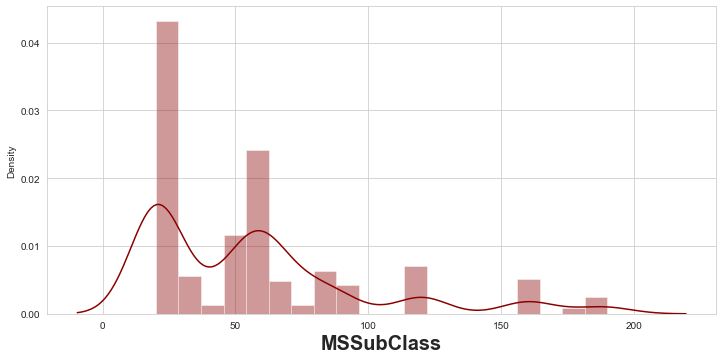

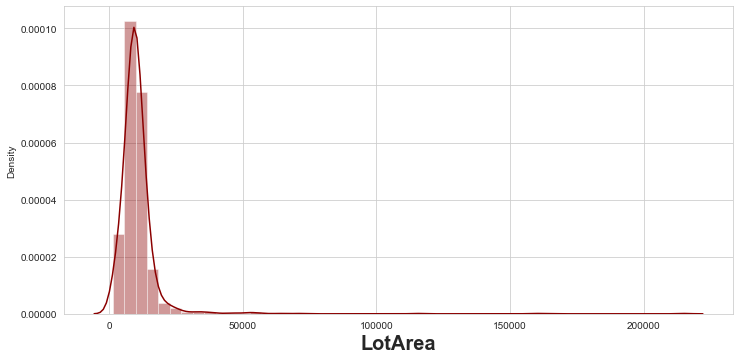

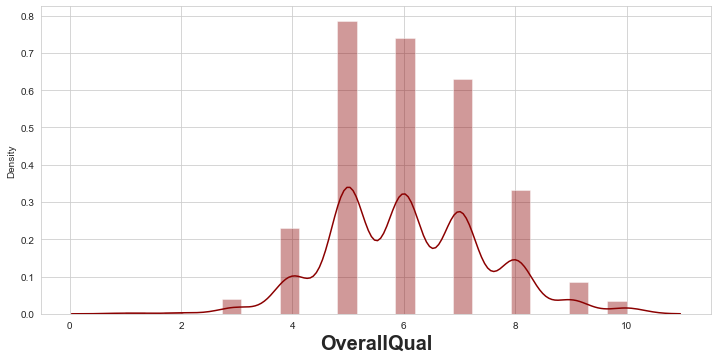

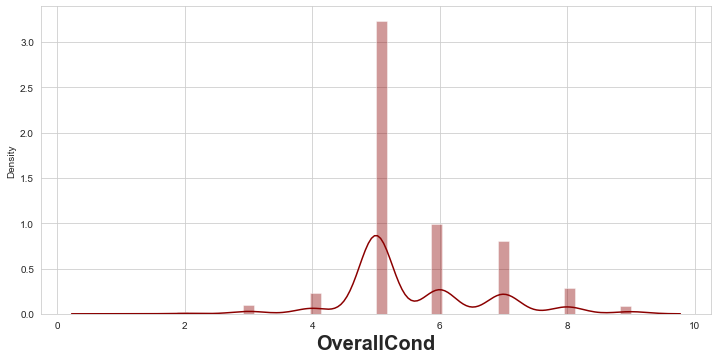

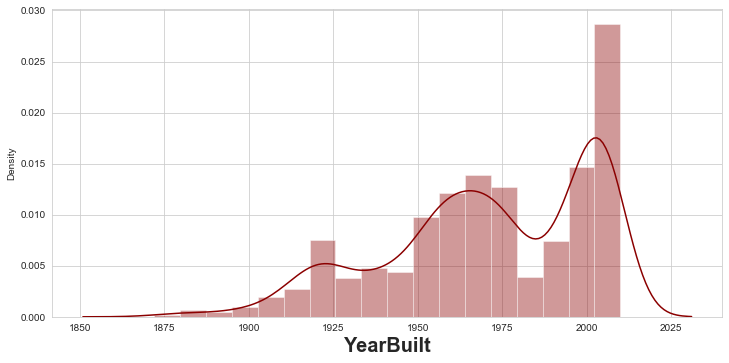

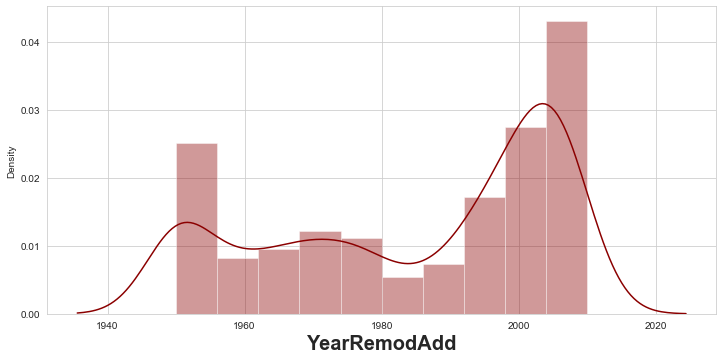

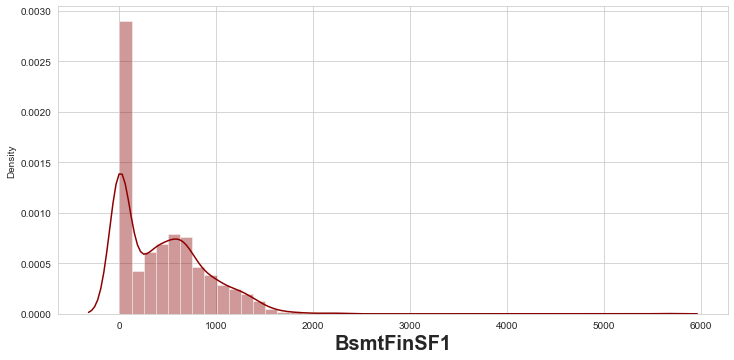

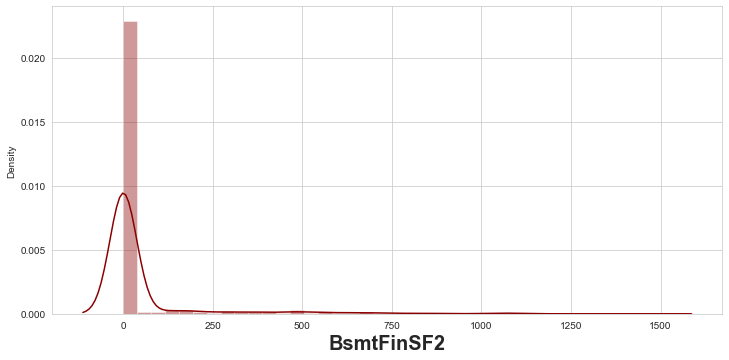

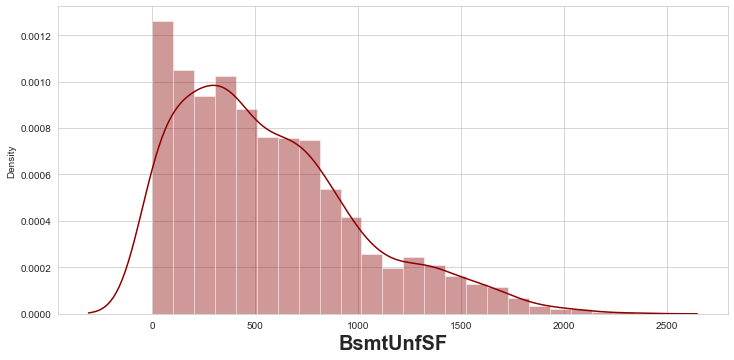

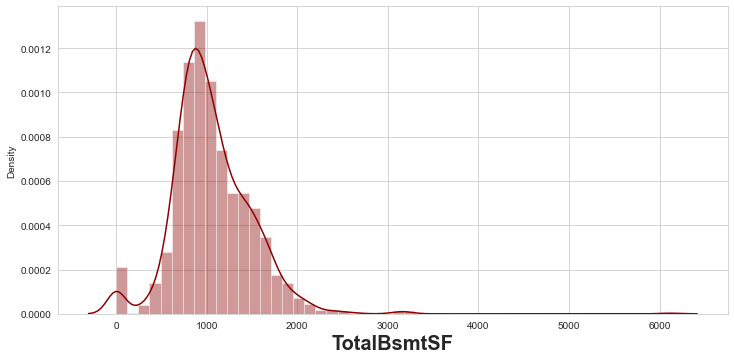

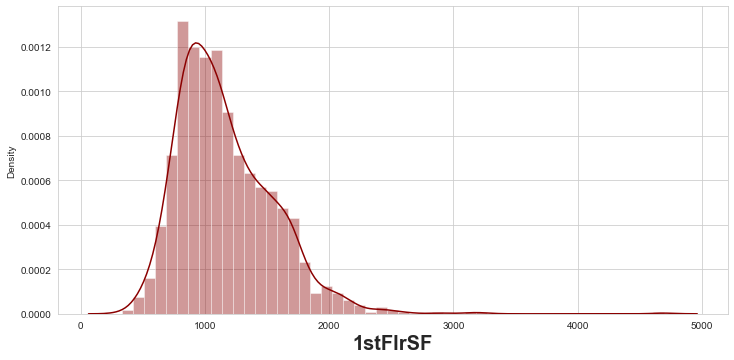

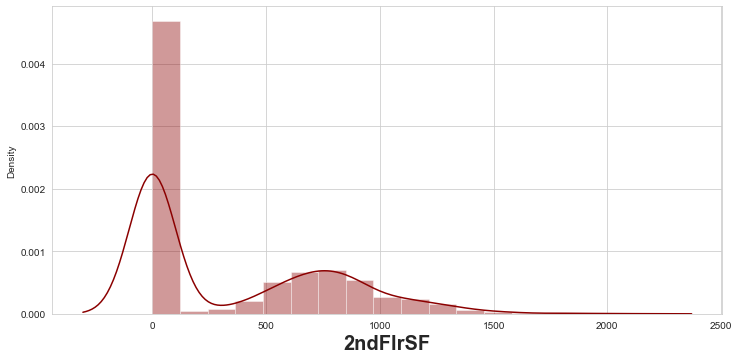

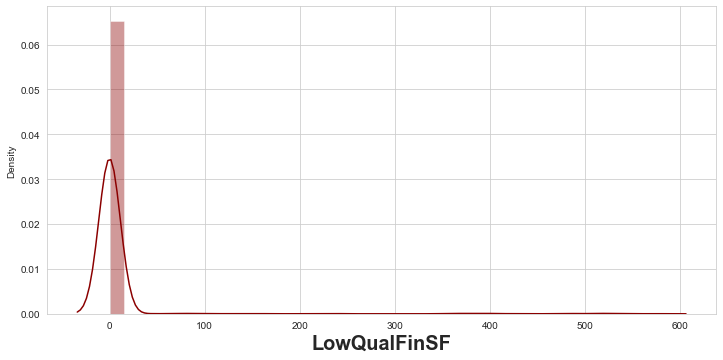

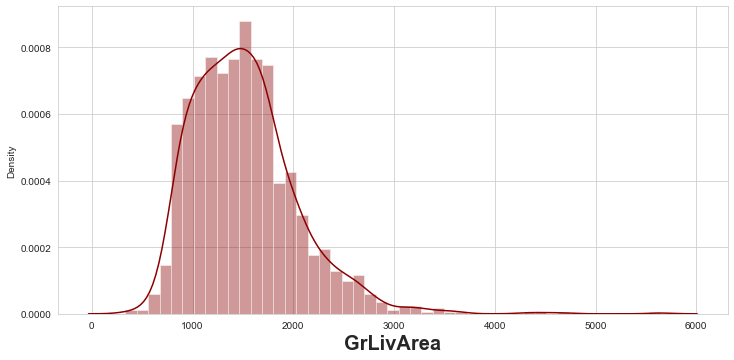

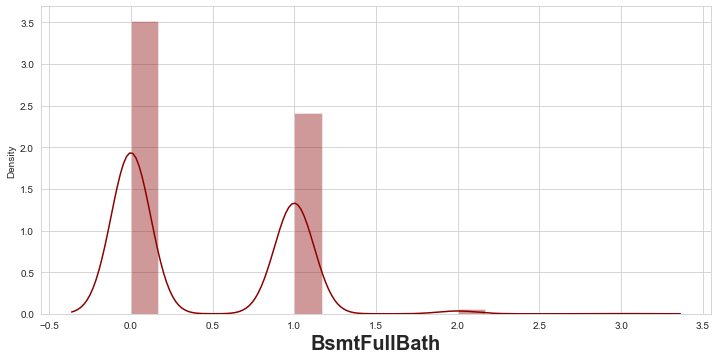

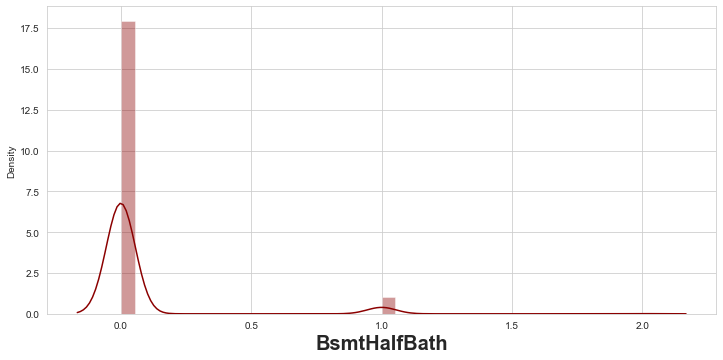

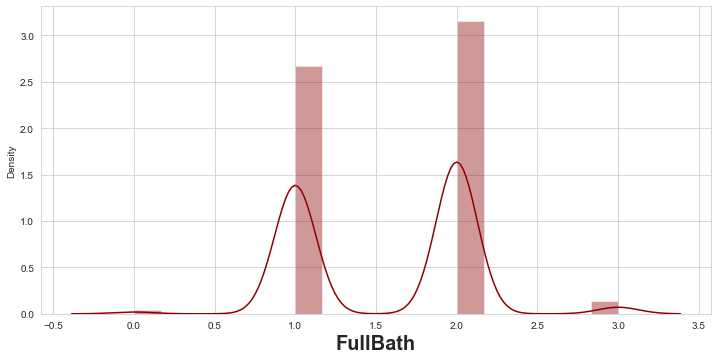

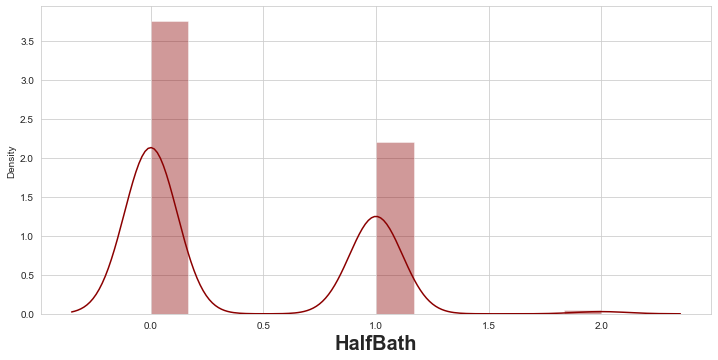

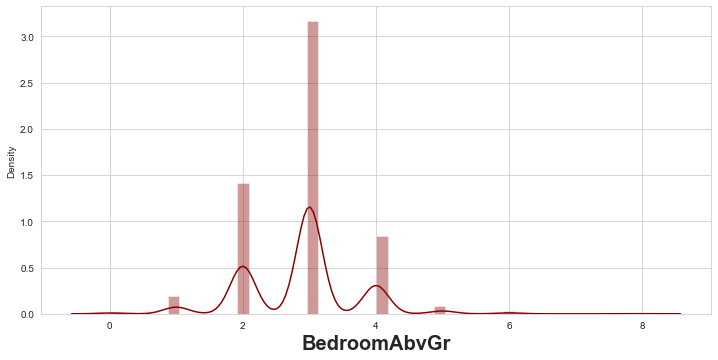

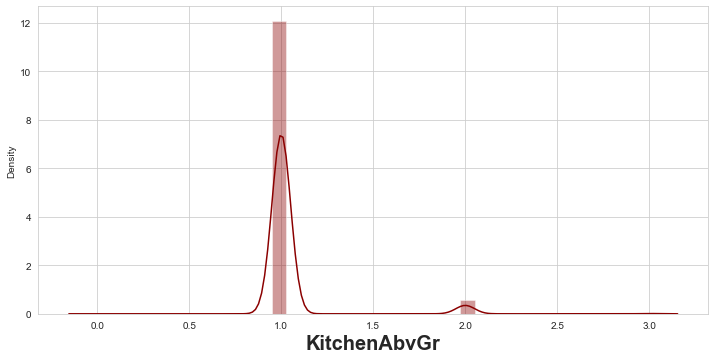

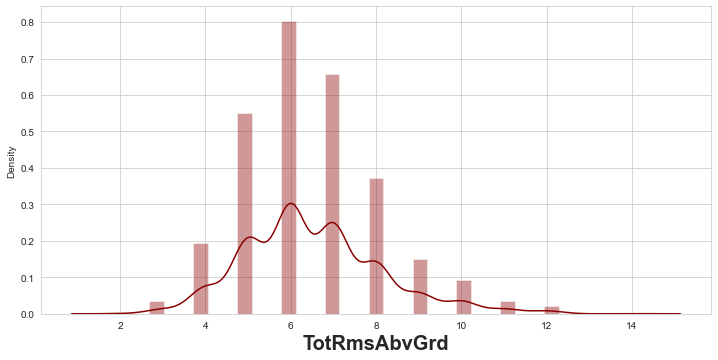

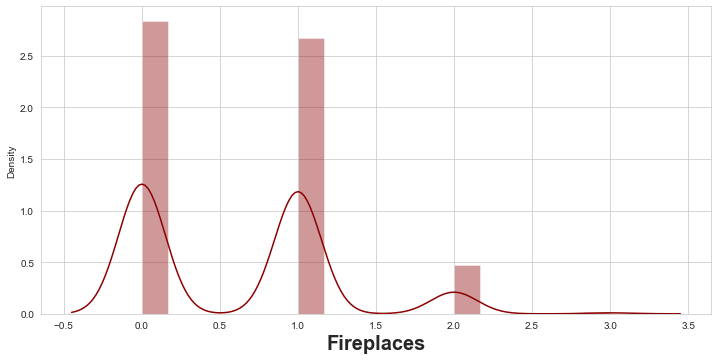

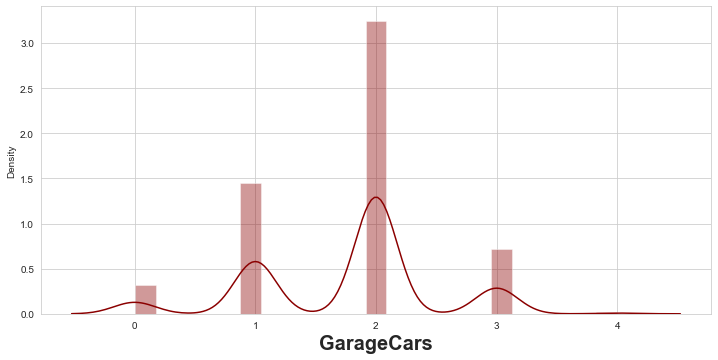

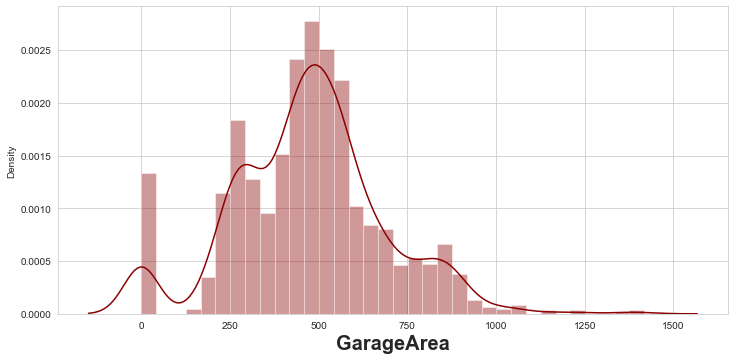

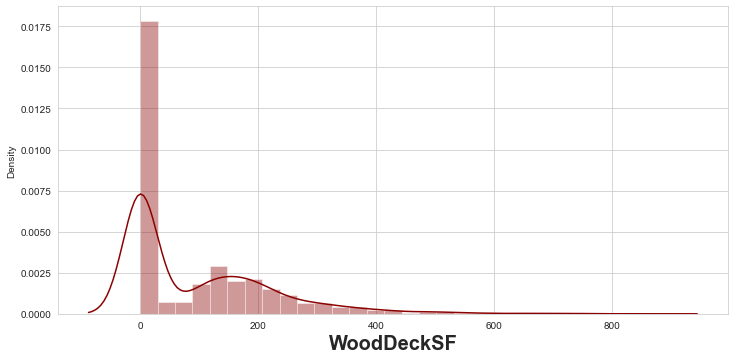

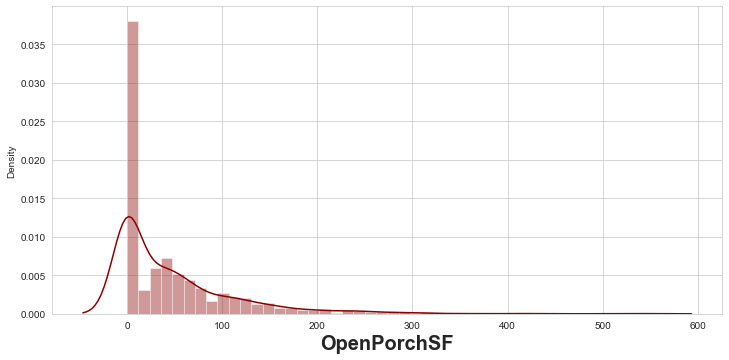

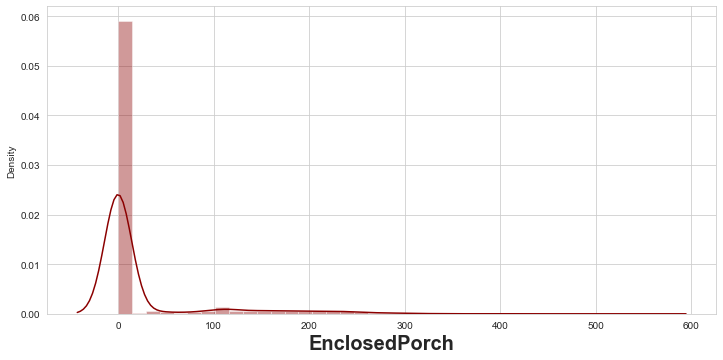

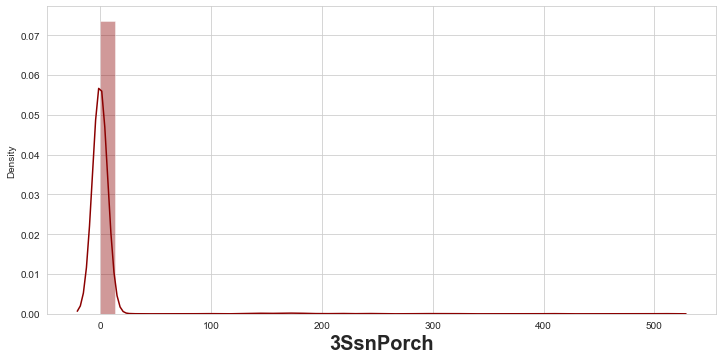

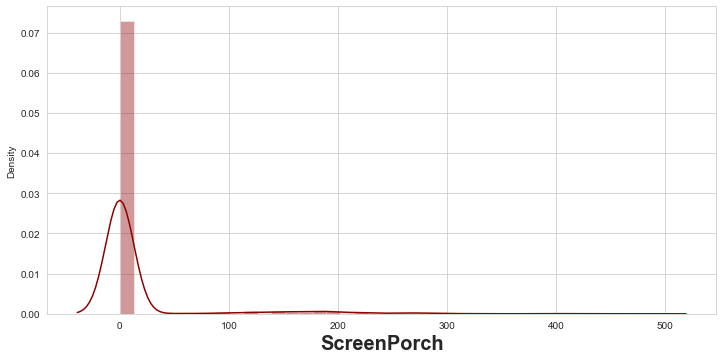

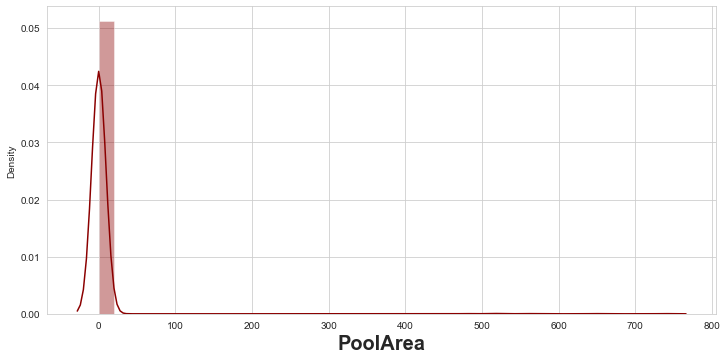

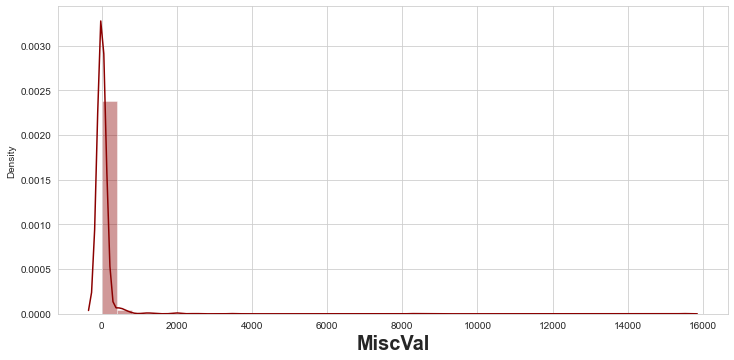

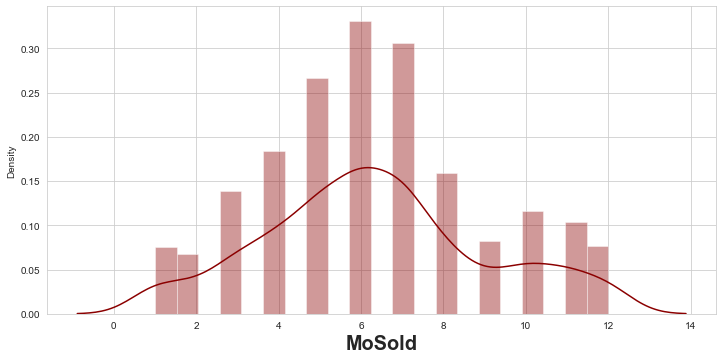

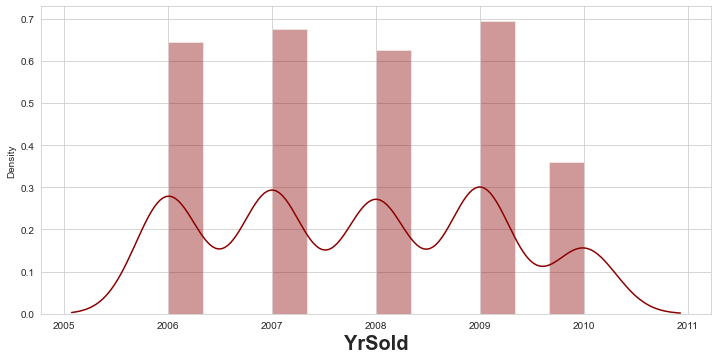

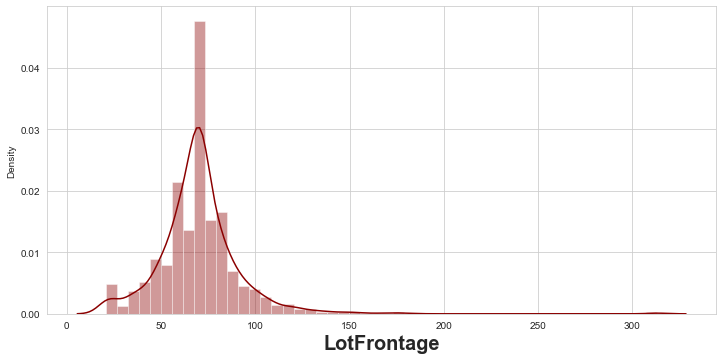

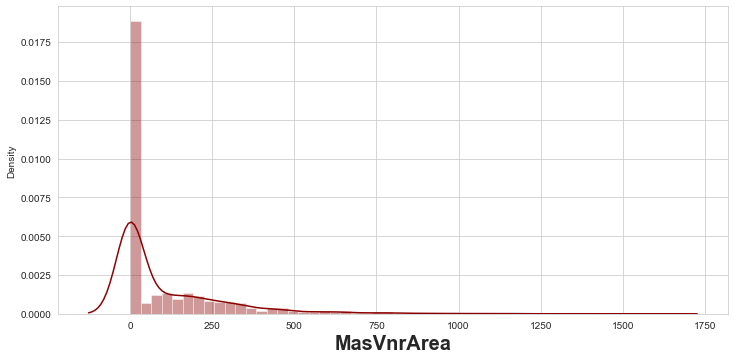

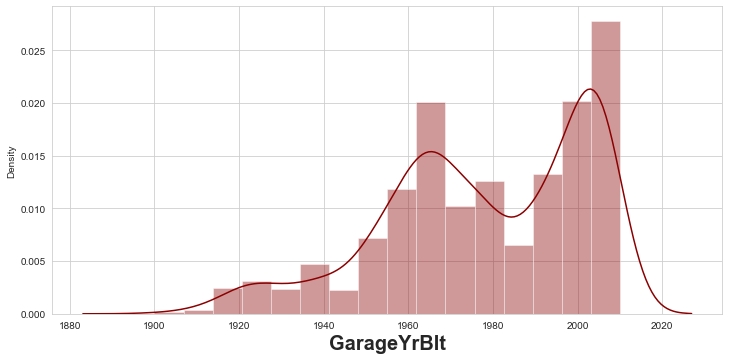

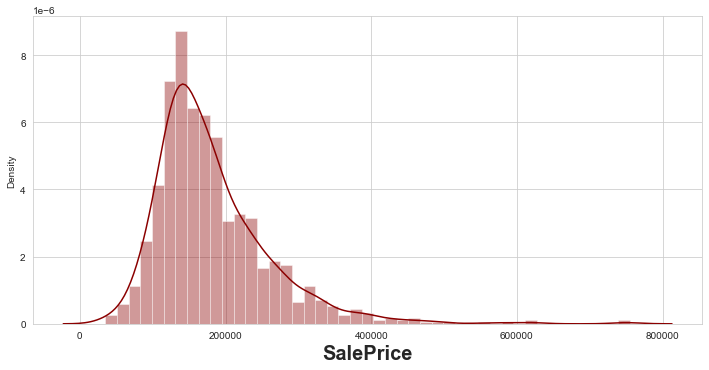

In [169]:
# ploting the distribution plot for all continuous column with for loop
plotnumber = 1

for columns in cont_col:
    if plotnumber <= 37:
        plt.figure(figsize = (12,250))
        ax = plt.subplot(37,1, plotnumber)
        sns.distplot(data[columns], color = 'darkred')
        plt.xlabel(columns, fontsize = 20, fontweight = 'bold')
        plotnumber+=1
plt.show()

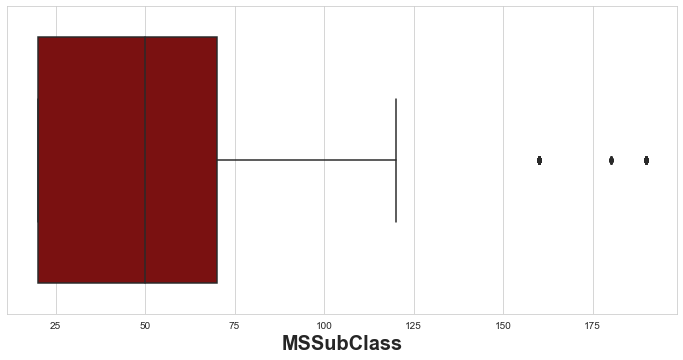

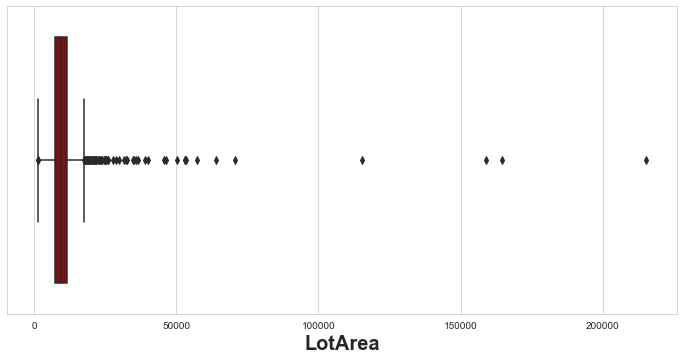

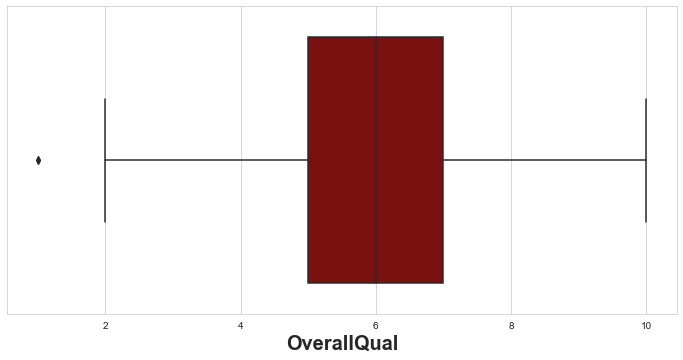

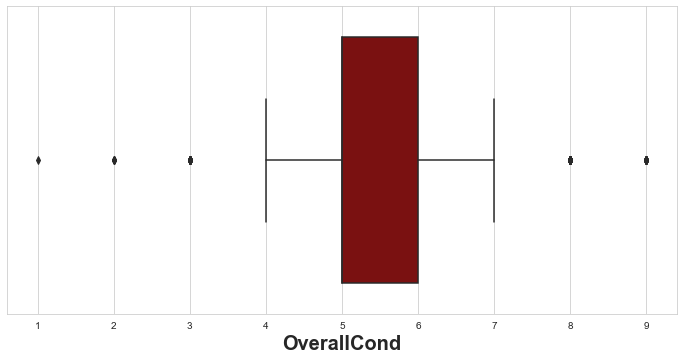

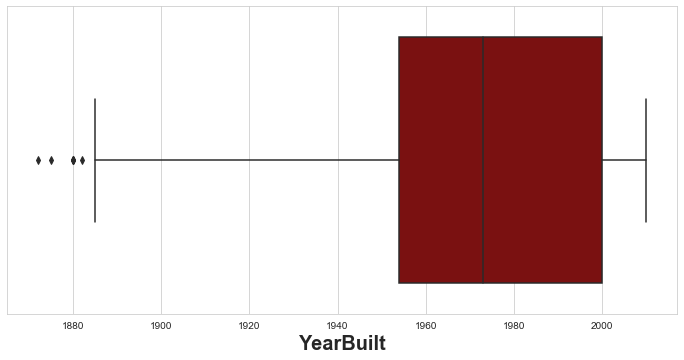

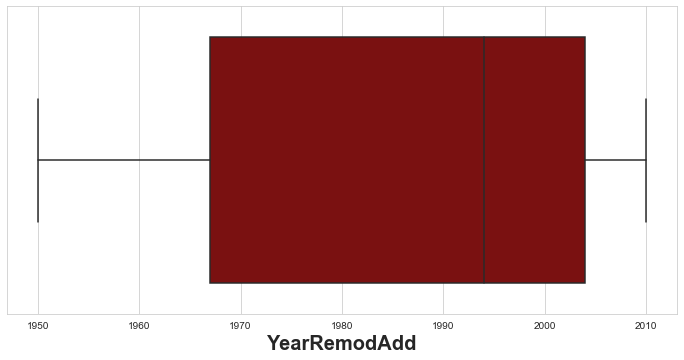

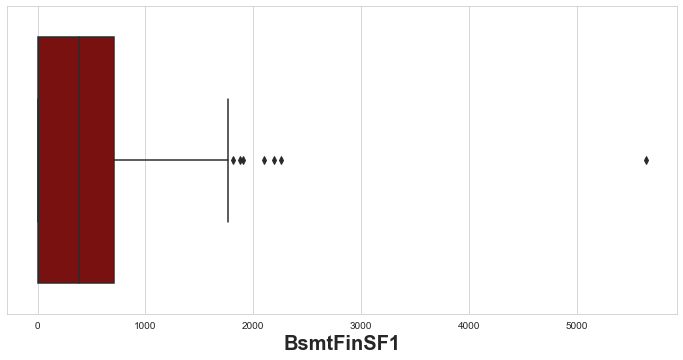

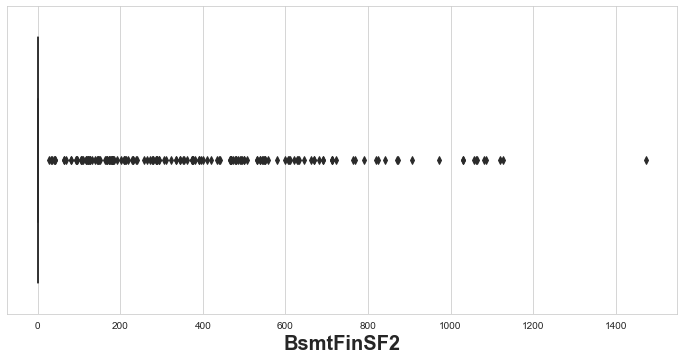

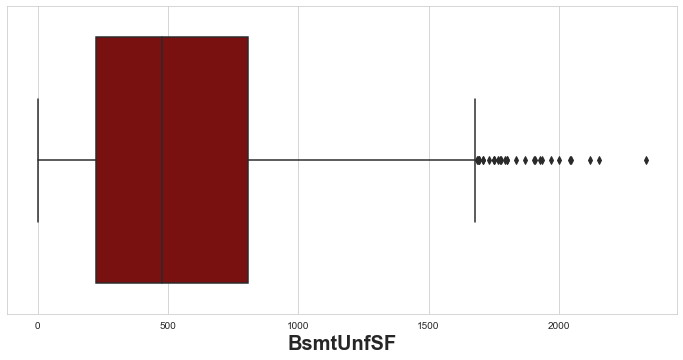

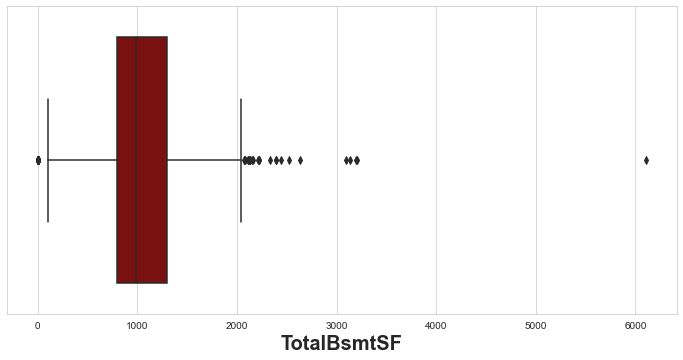

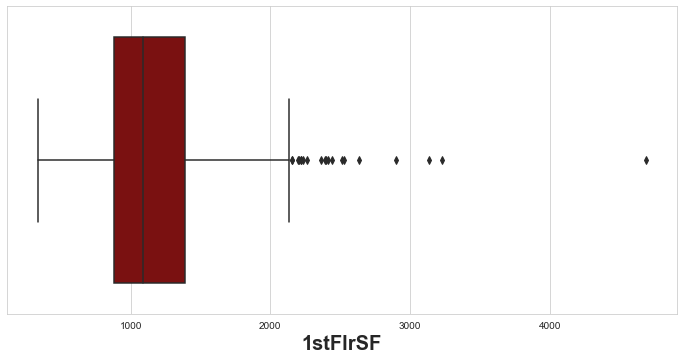

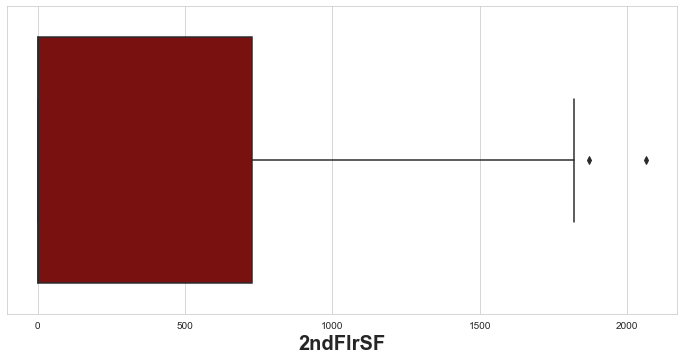

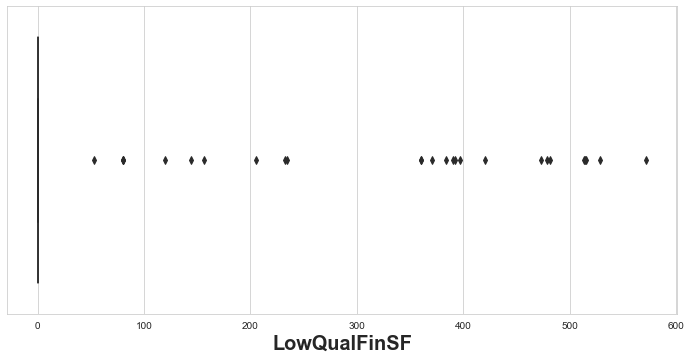

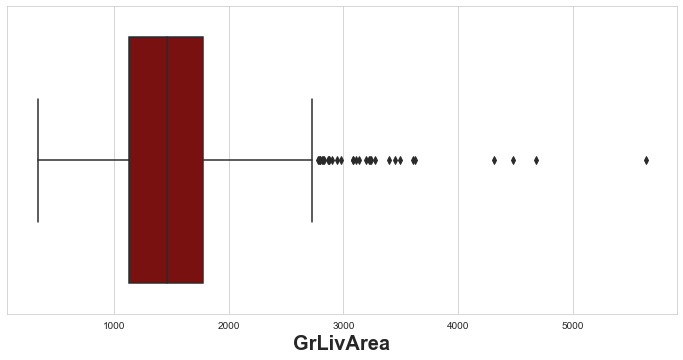

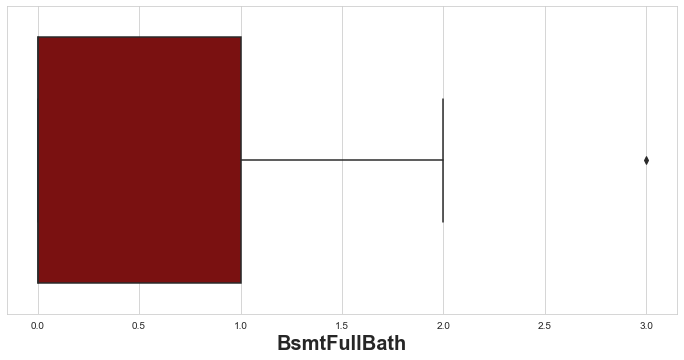

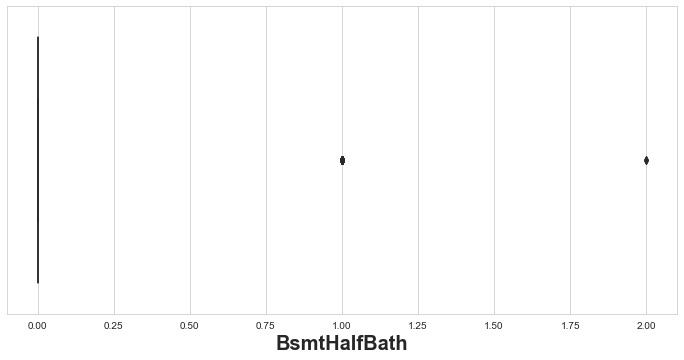

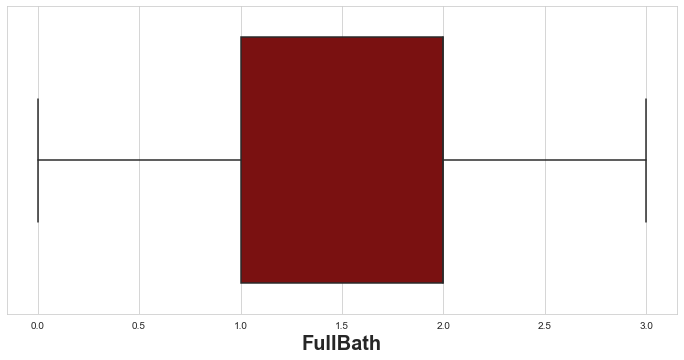

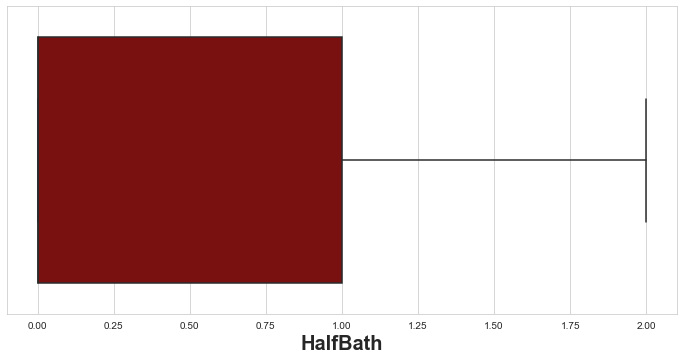

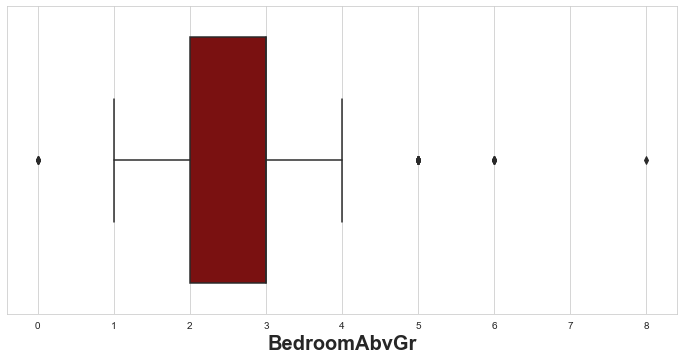

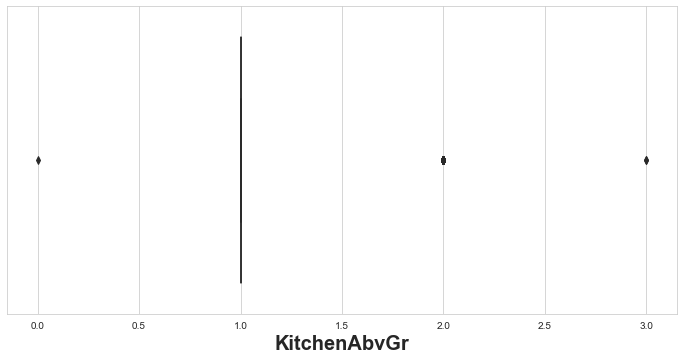

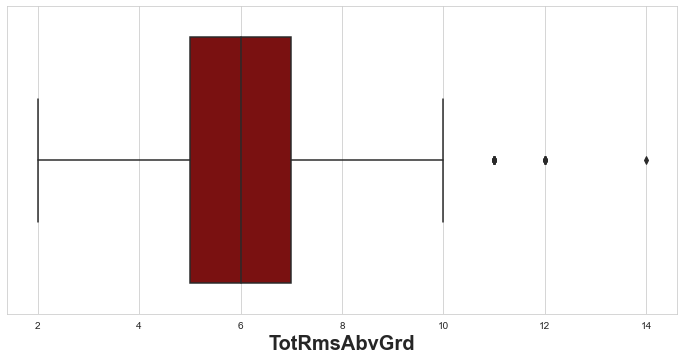

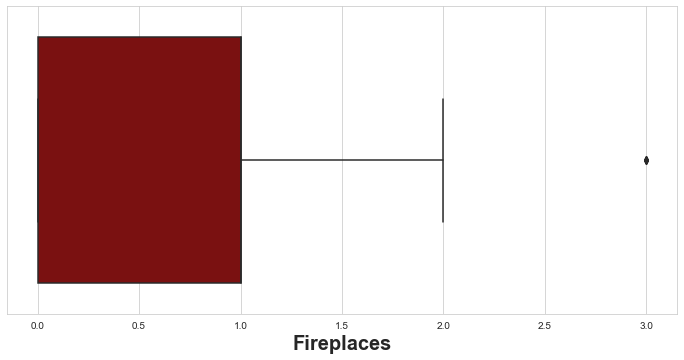

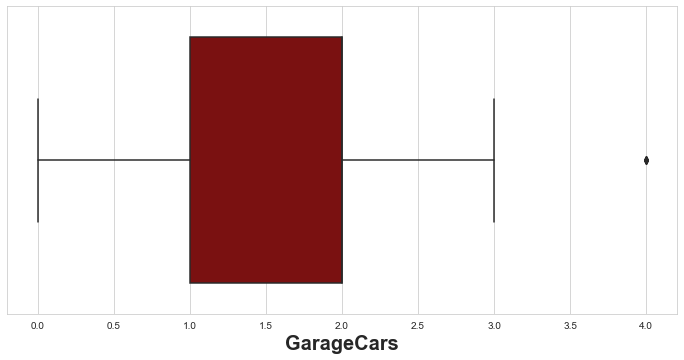

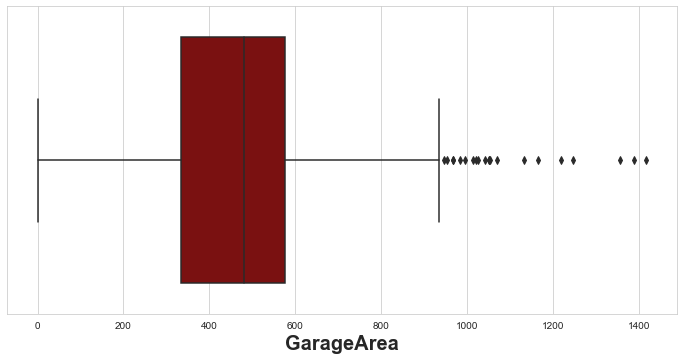

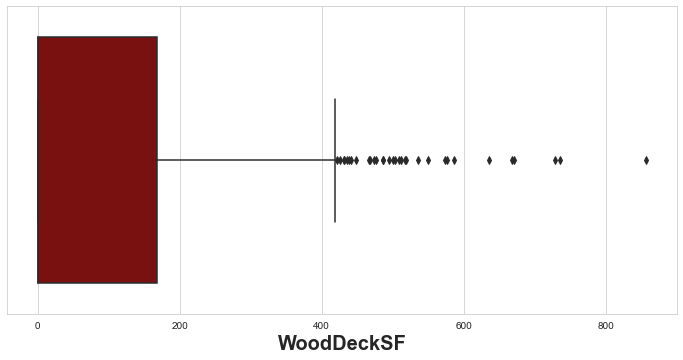

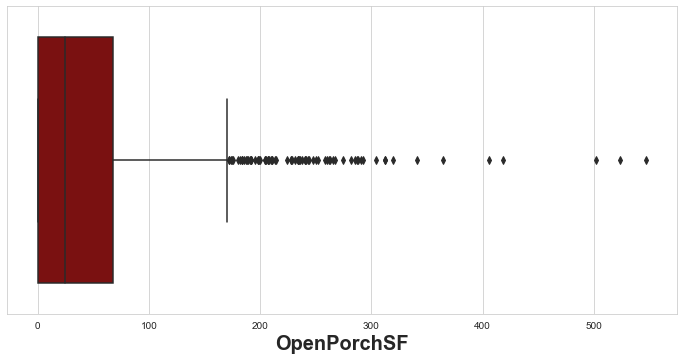

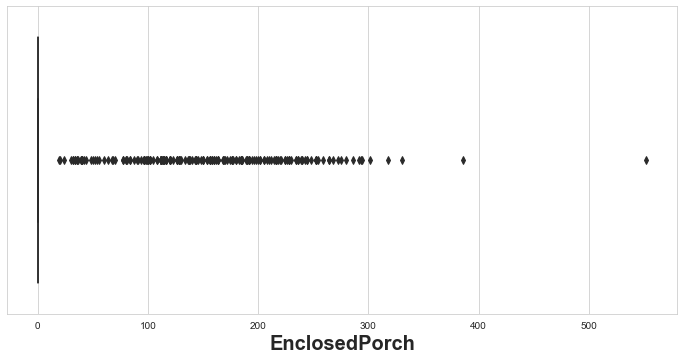

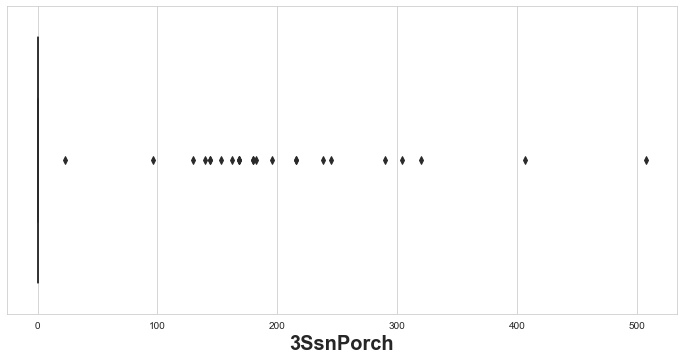

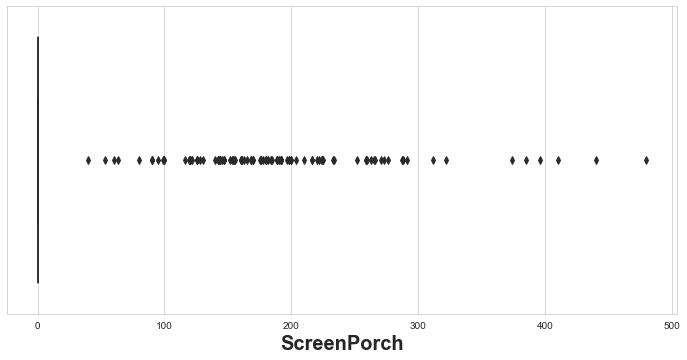

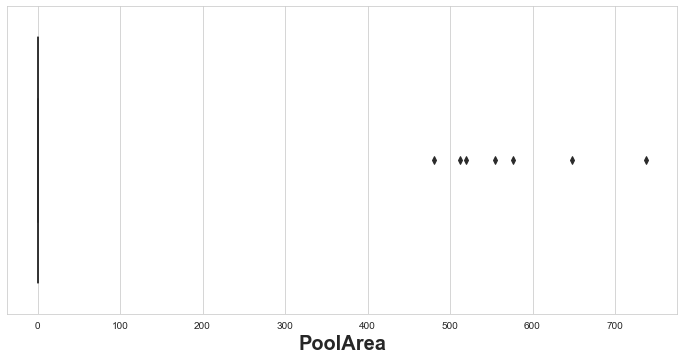

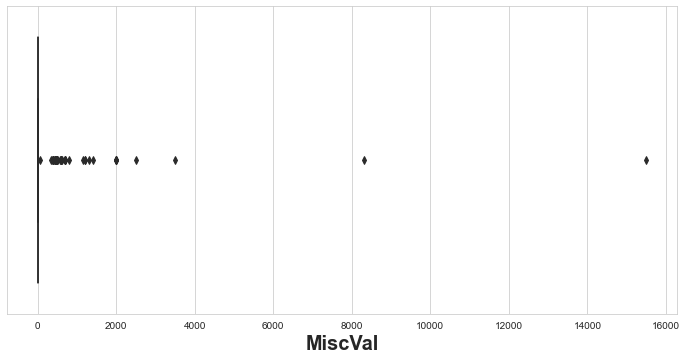

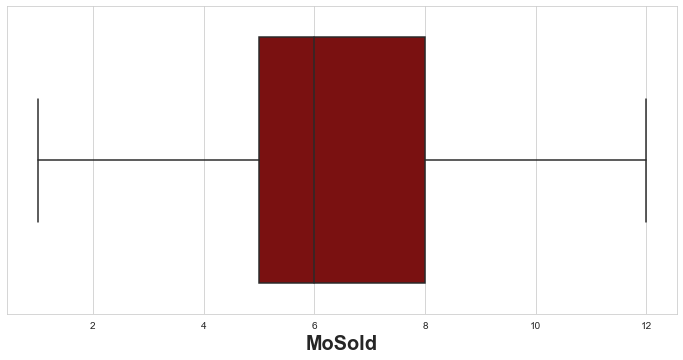

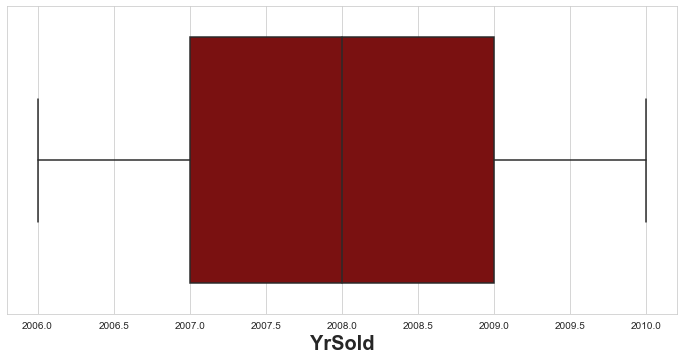

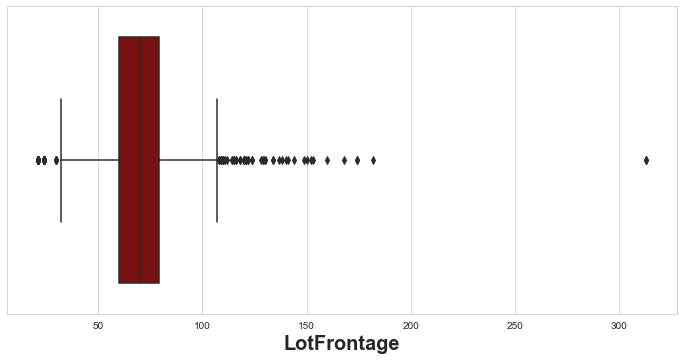

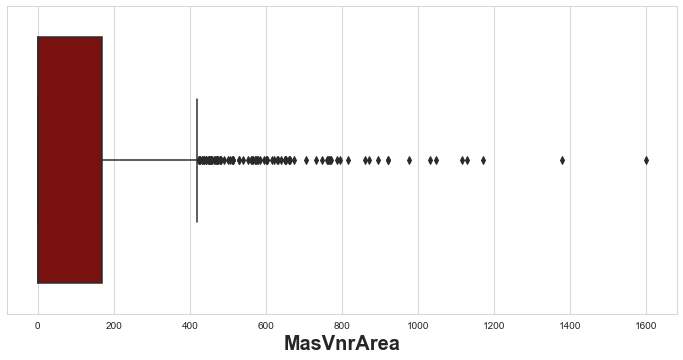

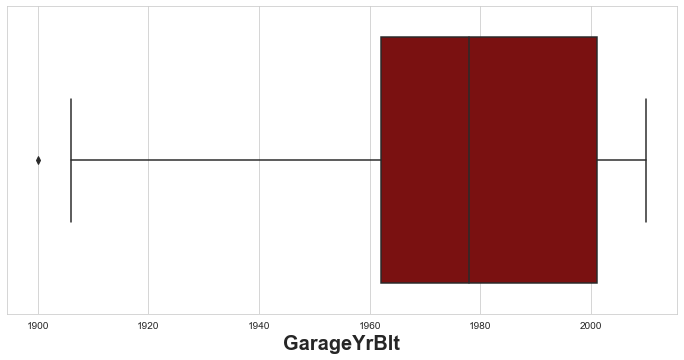

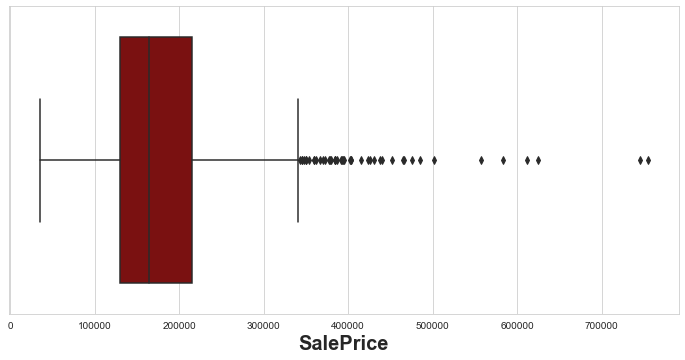

In [170]:
# ploting the boxplot plot for all continuous column with for loop
plotnumber = 1

for columns in cont_col:
    if plotnumber <= 37:
        plt.figure(figsize = (12,250))
        ax = plt.subplot(37,1, plotnumber)
        sns.boxplot(data[columns], color = 'darkred')
        plt.xlabel(columns, fontsize = 20, fontweight = 'bold')
        plotnumber+=1
plt.show()

In above EDA & Visualization of continuous columns of the data(In Distribution Plot) we can observe almost all kind of data distribution, some of the column's data distribution are heavily right skewed like **LotArea, BsmtFinSF1, BsmtFinSF2, TotalBsmtSF, 1stFlrSF, LowQualSF, GrLivArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, LotFrontAge, MasVnrArea**. We also observed the left skewed data distribution in the column :- **YearBlt & GarageYrBlt.

One more point to be added here that we made a list of continuous columns based of data type of the columns which is int64 & float and while doing so we have added some of categorical column which had data type integer or float & we can observe these column's data distribution Kernel Density Estimation is like wave because the data is distributed in very limited categories.

The correspond Boxplot of these right & left skewed column shows the outliers within these columns. We need to remove these outliers from the column but the problem is if we will remove the outliers from these columns with IQR method we will lead to a heavy data loss because we had observed that the number of columns with outliers are very large and some of the columns have very large amount of outliers so we are gonna remove the outliers with z-score method & after that we will remove the skewness of the data.

# Removing Outliers with ```z-score```.

In [171]:
# making a new data frame having columns with outliers only.

new_df = pd.DataFrame({})
new_df['MSSubClass'] = data['MSSubClass']
new_df['LotArea'] = data['LotArea']
new_df['OverallQual'] = data['OverallQual']
new_df['OverallCond'] = data['OverallCond']
new_df['YearBuilt'] = data['YearBuilt']
new_df['BsmtFinSF1'] = data['BsmtFinSF1']
new_df['BsmtFinSF2'] = data['BsmtFinSF2']
new_df['BsmtUnfSF'] = data['BsmtUnfSF']
new_df['TotalBsmtSF'] = data['TotalBsmtSF']
new_df['1stFlrSF'] = data['1stFlrSF']
new_df['2ndFlrSF'] = data['2ndFlrSF']
new_df['LowQualFinSF'] = data['LowQualFinSF']
new_df['GrLivArea'] = data['GrLivArea']
new_df['BsmtFullBath'] = data['BsmtFullBath']
new_df['BedroomAbvGr'] = data['BedroomAbvGr']
new_df['TotRmsAbvGrd'] = data['TotRmsAbvGrd']
new_df['Fireplaces'] = data['Fireplaces']
new_df['GarageCars'] = data['GarageCars']
new_df['GarageArea'] = data['GarageArea']
new_df['WoodDeckSF'] = data['WoodDeckSF']
new_df['OpenPorchSF'] = data['OpenPorchSF']
new_df['EnclosedPorch'] = data['EnclosedPorch']
new_df['3SsnPorch'] = data['3SsnPorch']
new_df['ScreenPorch'] = data['ScreenPorch']
new_df['PoolArea'] = data['PoolArea']
new_df['MiscVal'] = data['MiscVal']
new_df['LotFrontage'] = data['LotFrontage']
new_df['MasVnrArea'] = data['MasVnrArea']
new_df['GarageYrBlt'] = data['GarageYrBlt']
new_df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage,MasVnrArea,GarageYrBlt
0,120,4928,6,5,1976,120,0,958,1078,958,...,0,205,0,0,0,0,0,70.0,0.0,1977.0
1,20,15865,8,6,1970,351,823,1043,2217,2217,...,81,207,0,0,224,0,0,95.0,0.0,1970.0
2,60,9920,7,5,1996,862,0,255,1117,1127,...,180,130,0,0,0,0,0,92.0,0.0,1997.0
3,20,11751,6,6,1977,705,0,1139,1844,1844,...,0,122,0,0,0,0,0,105.0,480.0,1977.0
4,20,16635,6,7,1977,1246,0,356,1602,1602,...,240,0,0,0,0,0,0,70.0,126.0,1977.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,10206,8,5,2007,33,0,1530,1563,1563,...,144,99,0,0,0,0,0,78.0,468.0,2007.0
288,20,9245,5,5,1994,686,0,304,990,990,...,0,0,0,0,0,0,0,57.0,0.0,1996.0
289,20,11241,6,7,1970,578,0,426,1004,1004,...,0,0,0,0,0,0,700,70.0,180.0,1970.0
290,50,5000,6,7,1947,399,0,605,1004,1004,...,0,24,36,0,0,0,0,50.0,0.0,1950.0


In [172]:
# importing stats from scipy
from scipy import stats
z = np.abs(stats.zscore(new_df))   # getting all the z score in variable z
z

array([[1.49228154e+00, 5.60123700e-01, 7.18361143e-02, ...,
        1.86659616e-03, 5.76949570e-01, 4.33394162e-02],
       [8.72562756e-01, 5.36004651e-01, 1.37479460e+00, ...,
        1.13364607e+00, 5.76949570e-01, 3.32835386e-01],
       [7.33749635e-02, 5.98153225e-02, 6.51479243e-01, ...,
        9.97384547e-01, 5.76949570e-01, 7.83791926e-01],
       ...,
       [8.72562756e-01, 7.25779803e-02, 7.18361143e-02, ...,
        1.86659616e-03, 4.19418736e-01, 3.32835386e-01],
       [1.63109466e-01, 5.52907714e-01, 7.18361143e-02, ...,
        9.10276726e-01, 5.76949570e-01, 1.15996673e+00],
       [2.43821926e+00, 8.58284242e-01, 7.18361143e-02, ...,
        2.22747142e+00, 1.68148526e+00, 2.08765685e-01]])

In [173]:
index = (np.where(z > 3)[0])            # getting all the indexes having z score greater than 3 in variable (index)
data = data.drop(data.index[index])     # dropping the whole rows of indexes from main data set where z score is greater than 3
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.0,4928,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,2,2007,WD,Normal,128000.0
2,60,RL,92.0,9920,Pave,Grvl,IR1,Lvl,AllPub,CulDSac,...,0,0,0,GdPrv,0,6,2007,WD,Normal,269790.0
3,20,RL,105.0,11751,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,1,2010,COD,Normal,190000.0
4,20,RL,70.0,16635,Pave,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,MnPrv,0,6,2009,WD,Normal,215000.0
5,60,RL,58.0,14054,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,0,0,GdPrv,0,11,2006,New,Partial,219210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,RL,78.0,10206,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,10,2008,WD,Normal,NaN
288,20,RL,57.0,9245,Pave,Pave,IR2,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,2,2008,WD,Normal,NaN
289,20,RL,70.0,11241,Pave,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,MnPrv,700,3,2010,WD,Normal,NaN
290,50,RM,50.0,5000,Pave,Grvl,Reg,Lvl,AllPub,Corner,...,0,0,0,GdWo,0,10,2006,WD,Normal,NaN


In [174]:
# getting length of all indexes having z score greater than 3
len(index)

504

In [175]:
# dropping the whole rows of indexes from new_df where z score is greater than 3
new_df = new_df.drop(new_df.index[index])
new_df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage,MasVnrArea,GarageYrBlt
0,120,4928,6,5,1976,120,0,958,1078,958,...,0,205,0,0,0,0,0,70.0,0.0,1977.0
2,60,9920,7,5,1996,862,0,255,1117,1127,...,180,130,0,0,0,0,0,92.0,0.0,1997.0
3,20,11751,6,6,1977,705,0,1139,1844,1844,...,0,122,0,0,0,0,0,105.0,480.0,1977.0
4,20,16635,6,7,1977,1246,0,356,1602,1602,...,240,0,0,0,0,0,0,70.0,126.0,1977.0
5,60,14054,7,5,2006,0,0,879,879,879,...,100,17,0,0,0,0,0,58.0,0.0,2006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,10206,8,5,2007,33,0,1530,1563,1563,...,144,99,0,0,0,0,0,78.0,468.0,2007.0
288,20,9245,5,5,1994,686,0,304,990,990,...,0,0,0,0,0,0,0,57.0,0.0,1996.0
289,20,11241,6,7,1970,578,0,426,1004,1004,...,0,0,0,0,0,0,700,70.0,180.0,1970.0
290,50,5000,6,7,1947,399,0,605,1004,1004,...,0,24,36,0,0,0,0,50.0,0.0,1950.0


## Rechecking the data distribution & outliers by visualising.

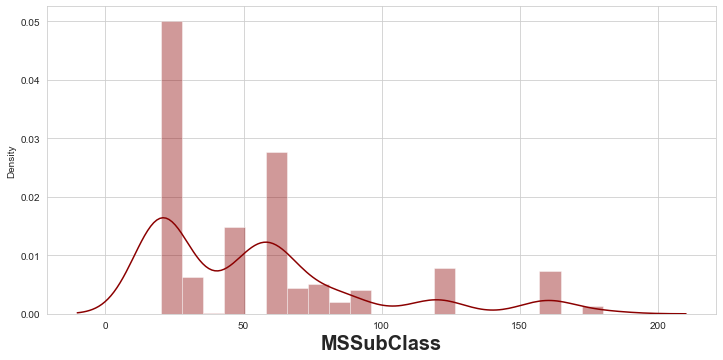

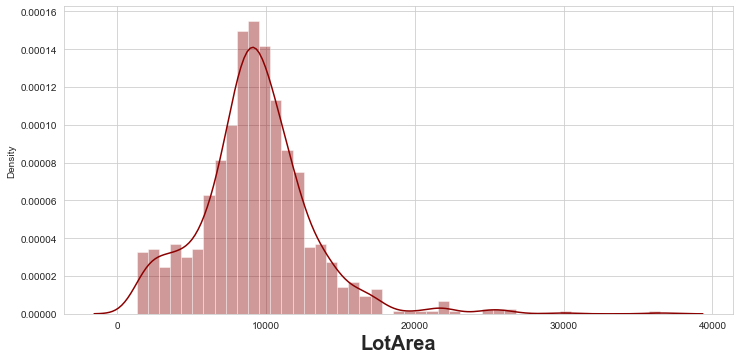

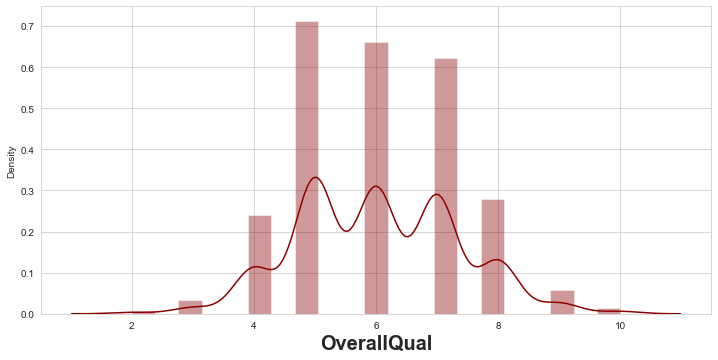

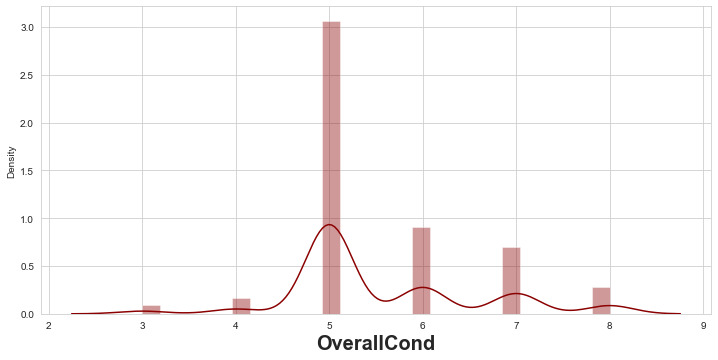

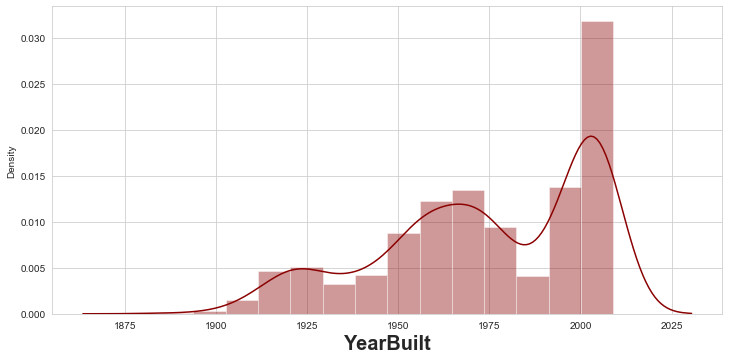

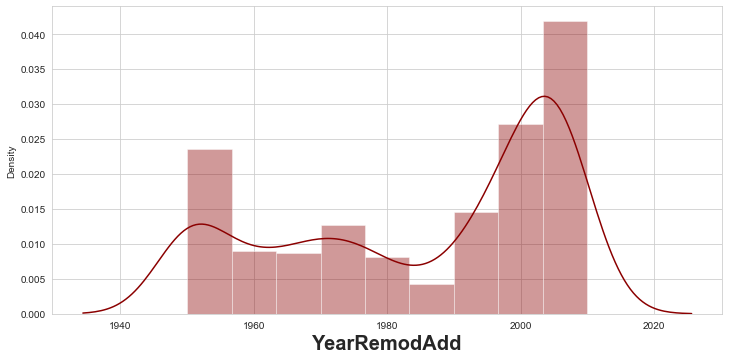

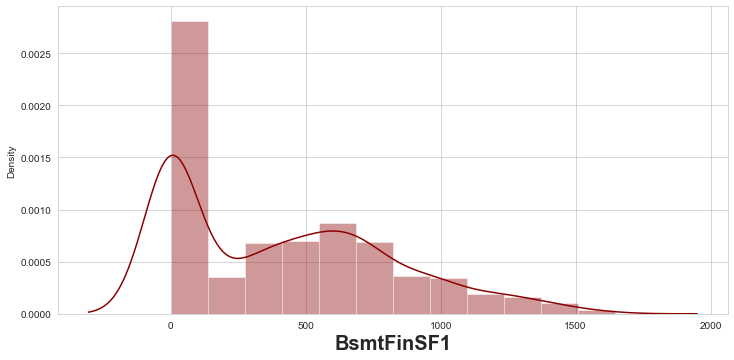

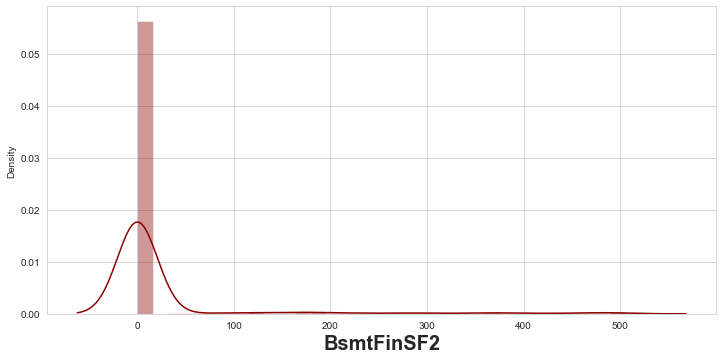

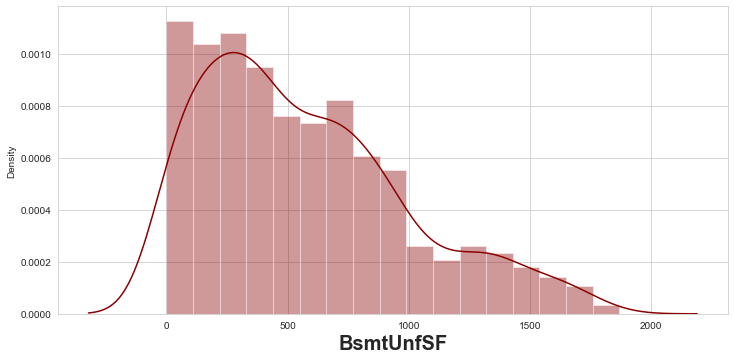

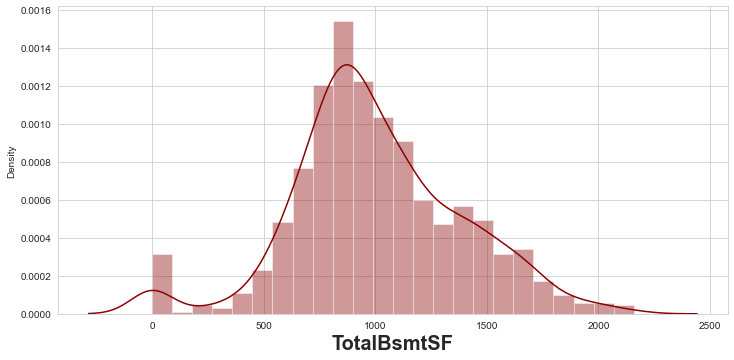

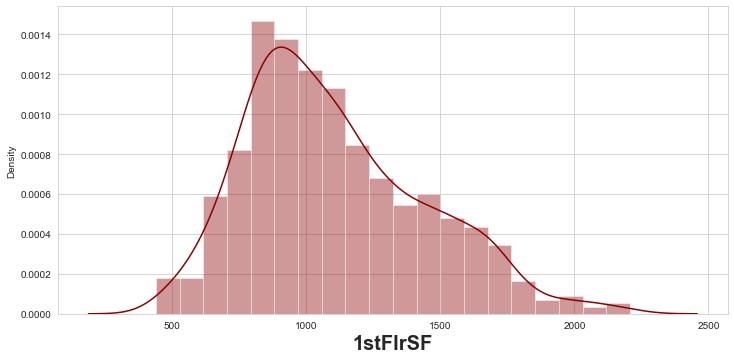

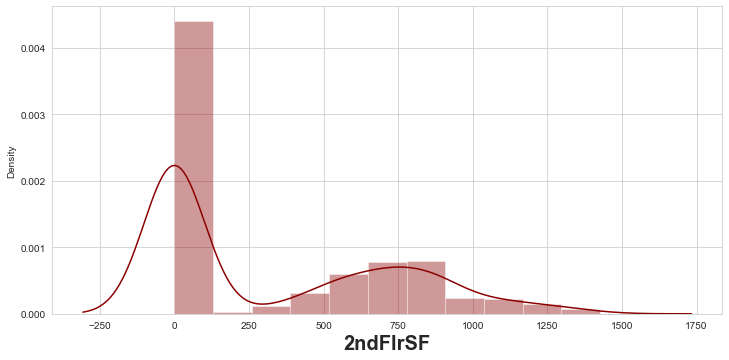

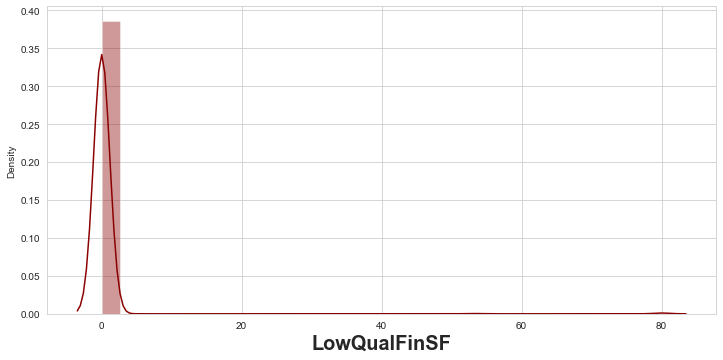

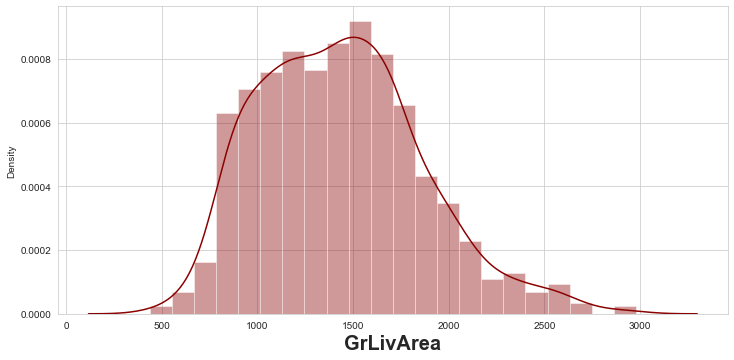

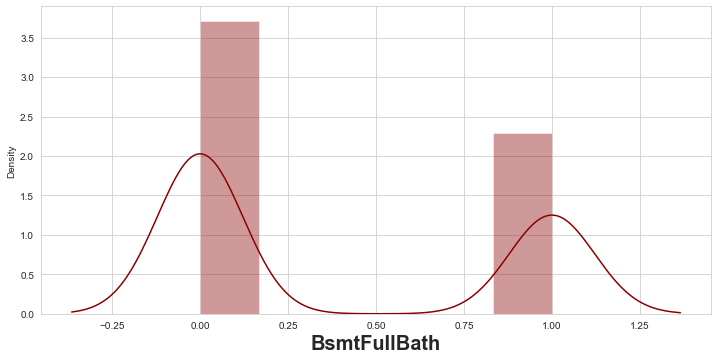

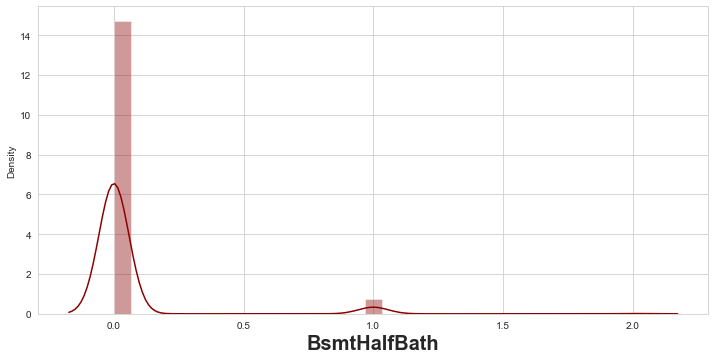

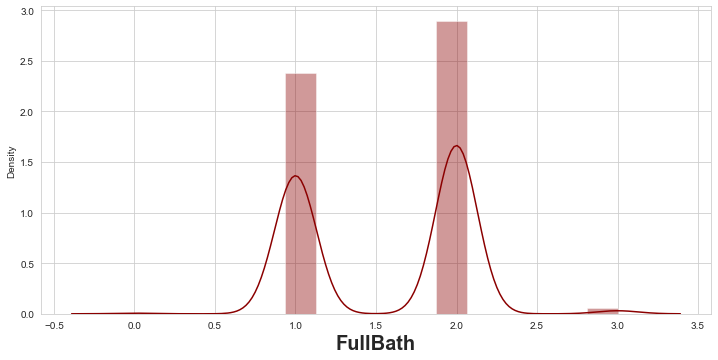

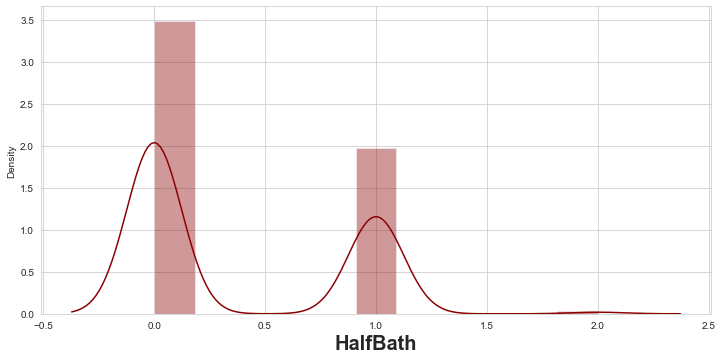

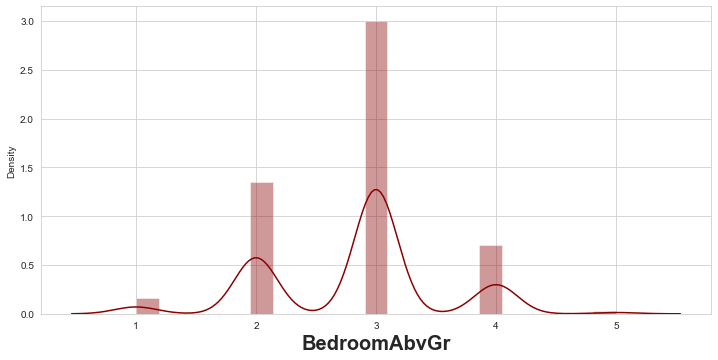

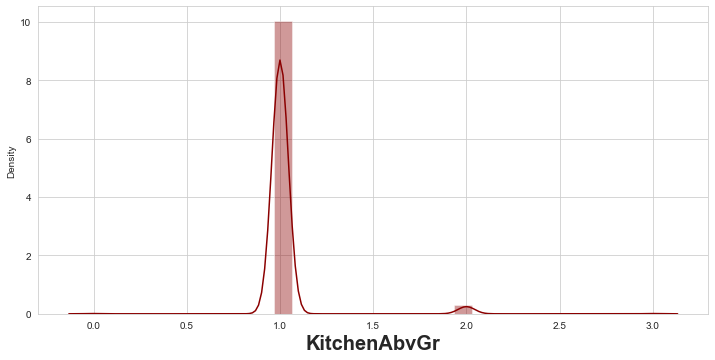

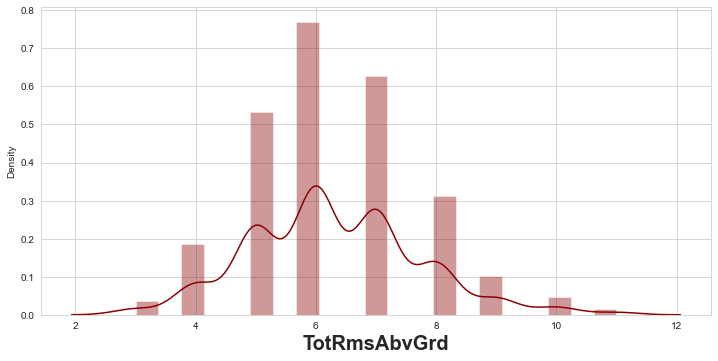

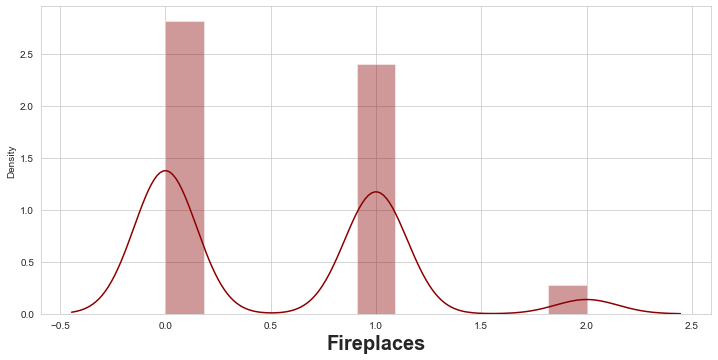

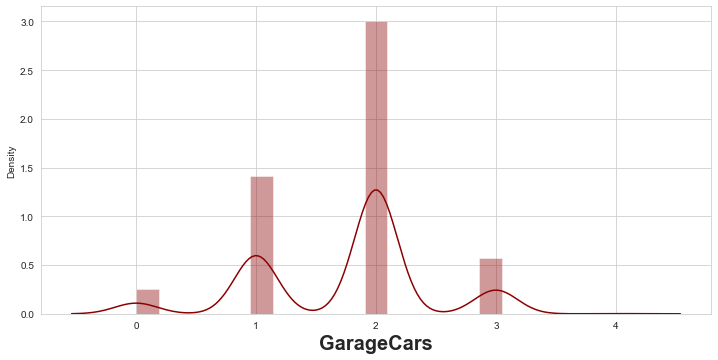

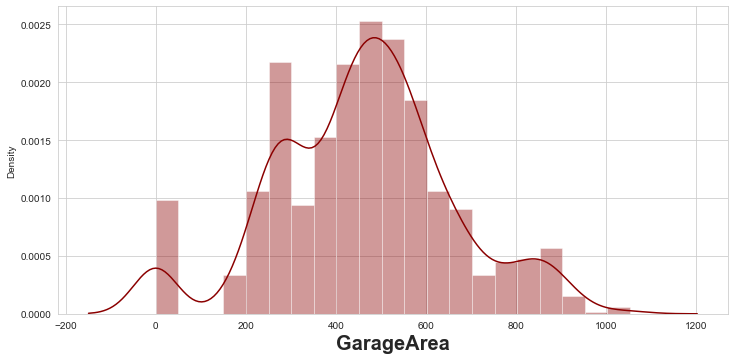

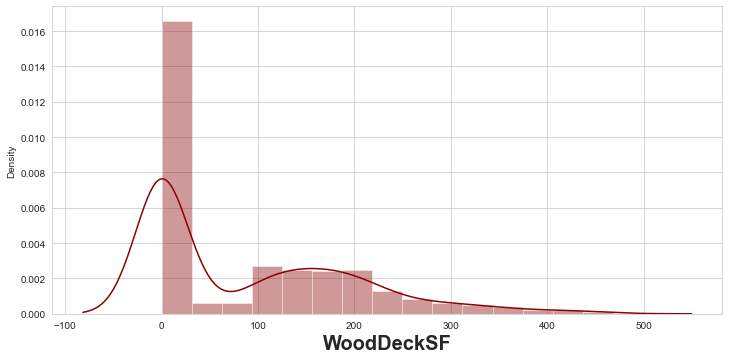

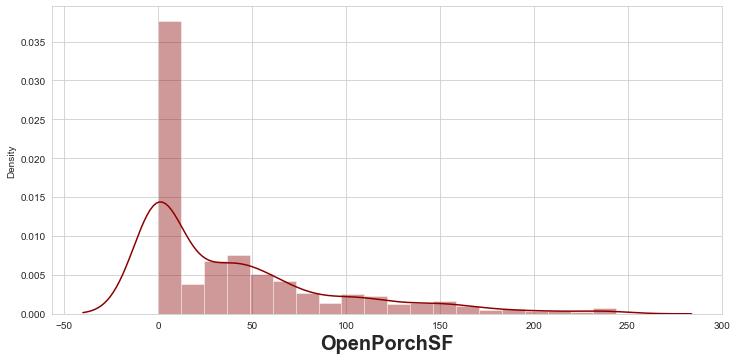

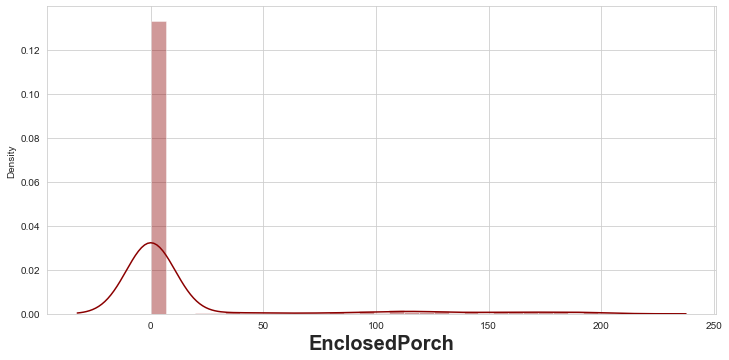

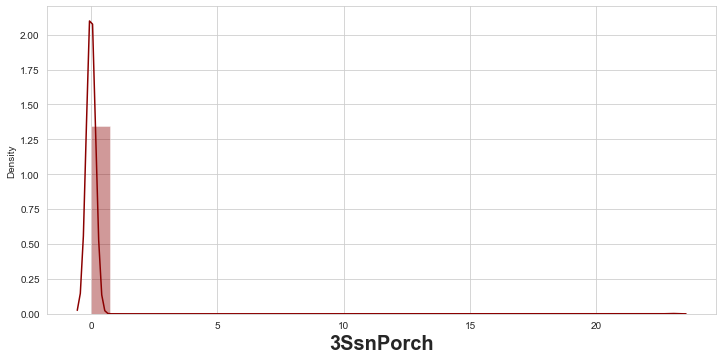

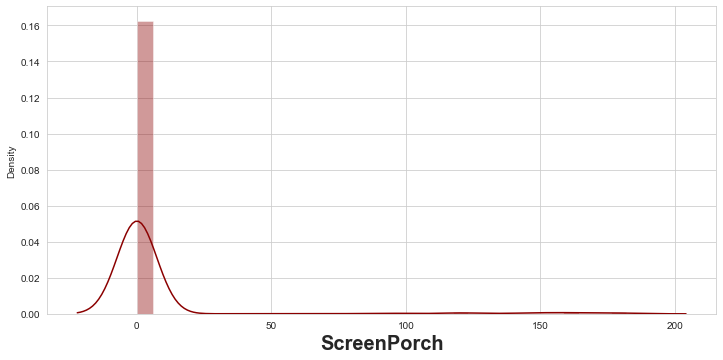

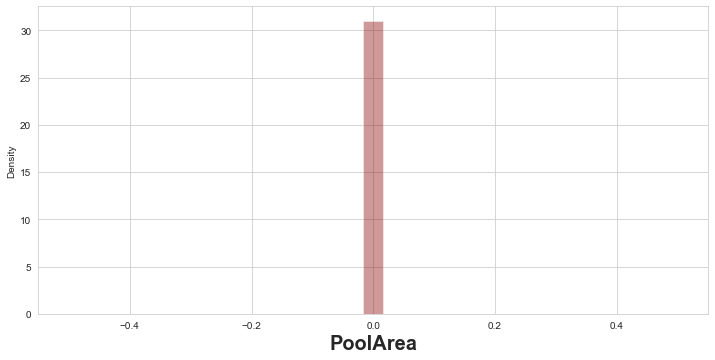

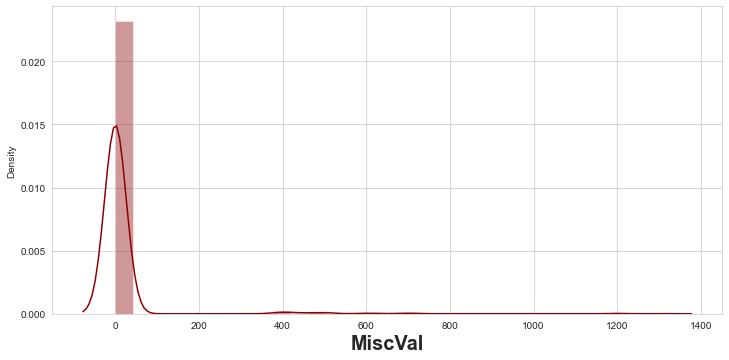

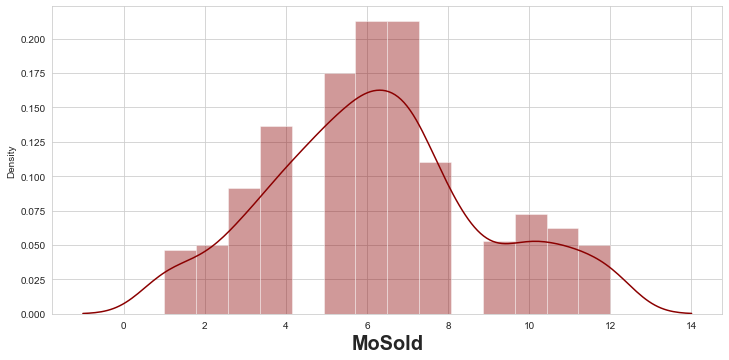

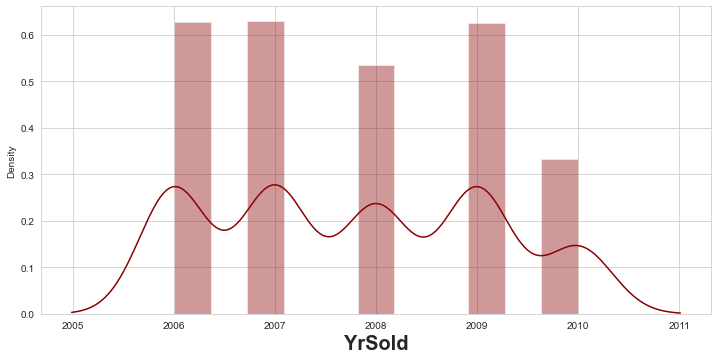

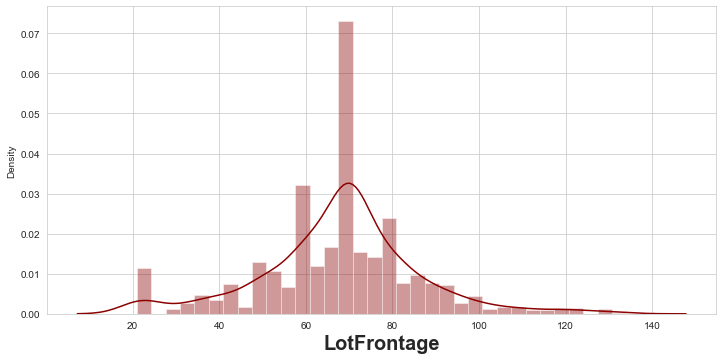

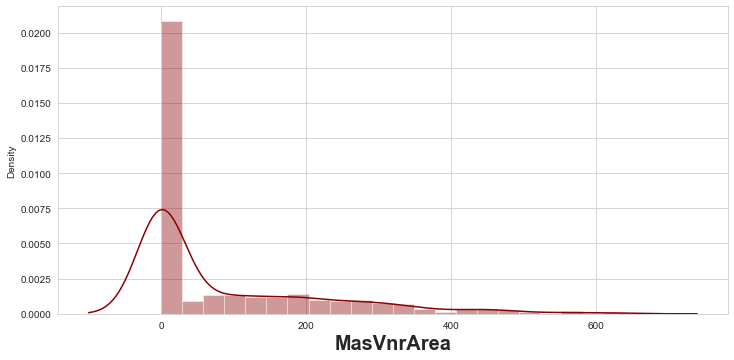

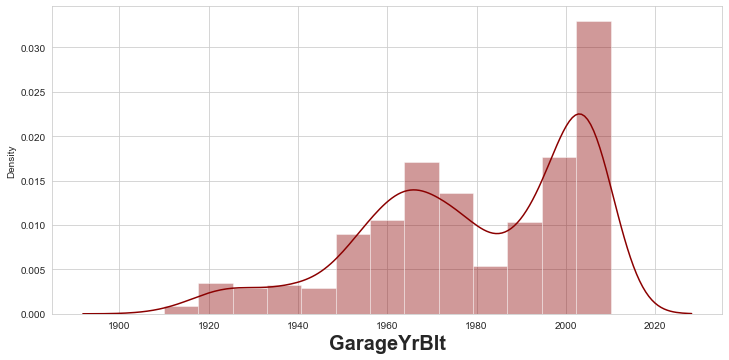

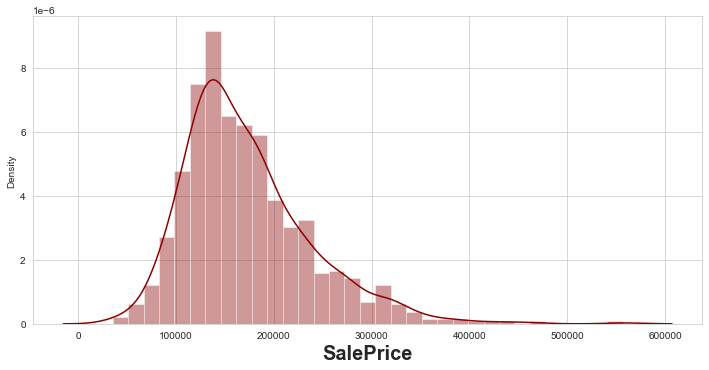

In [176]:
# ploting the distribution plot for all continuous column with for loop
plotnumber = 1

for columns in cont_col:
    if plotnumber <= 37:
        plt.figure(figsize = (12,250))
        ax = plt.subplot(37,1, plotnumber)
        sns.distplot(data[columns], color = 'darkred')
        plt.xlabel(columns, fontsize = 20, fontweight = 'bold')
        plotnumber+=1
plt.show()

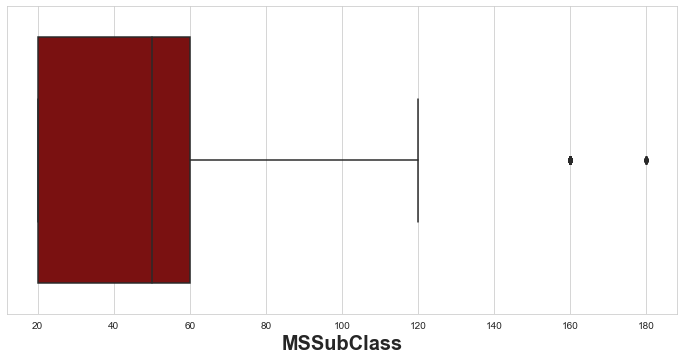

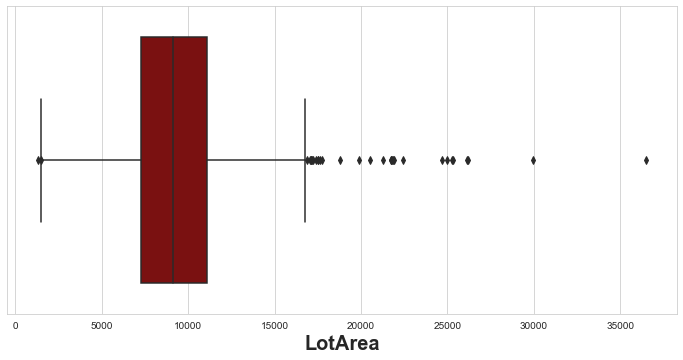

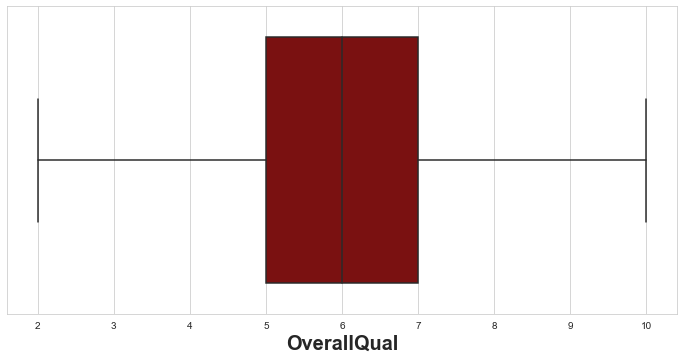

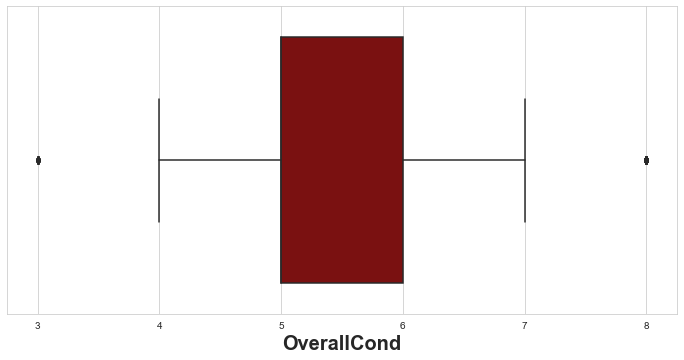

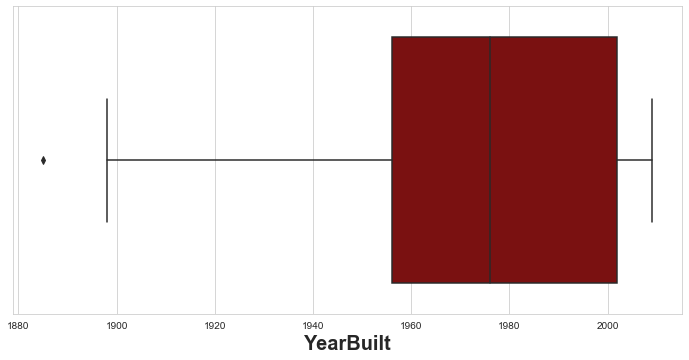

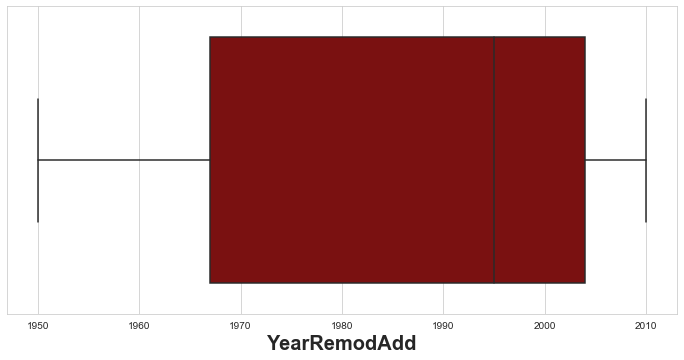

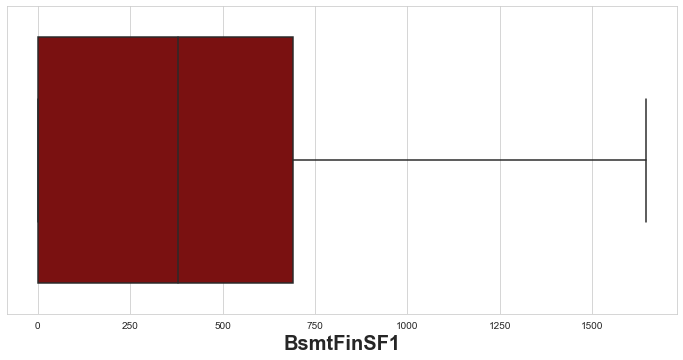

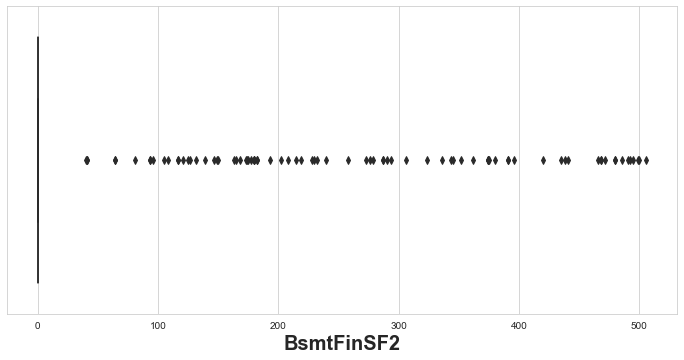

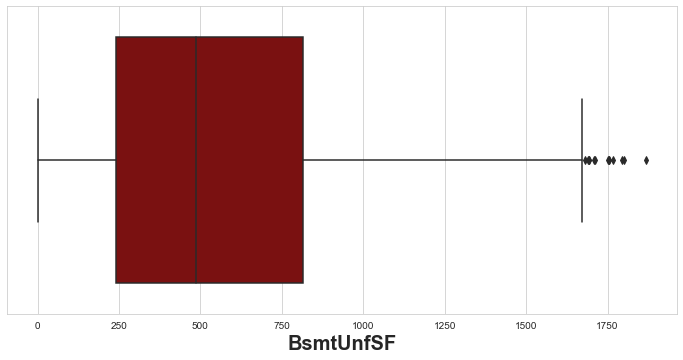

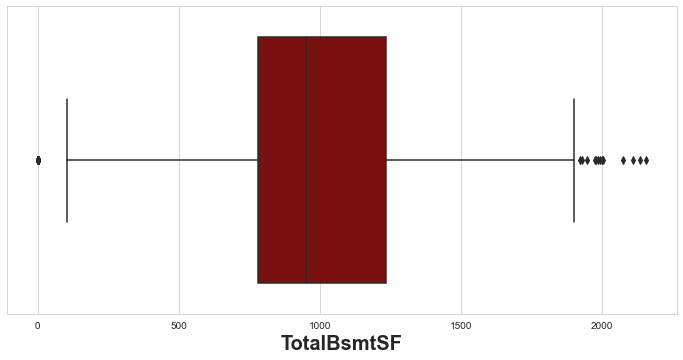

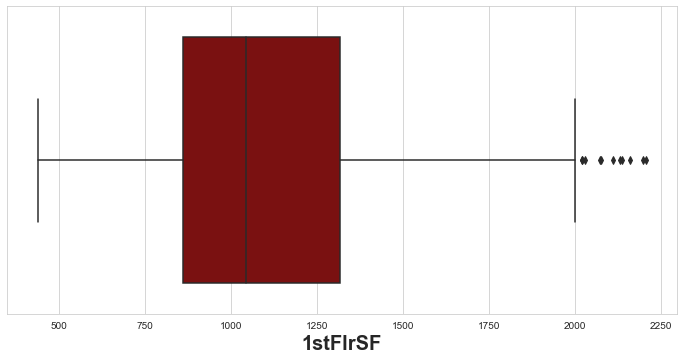

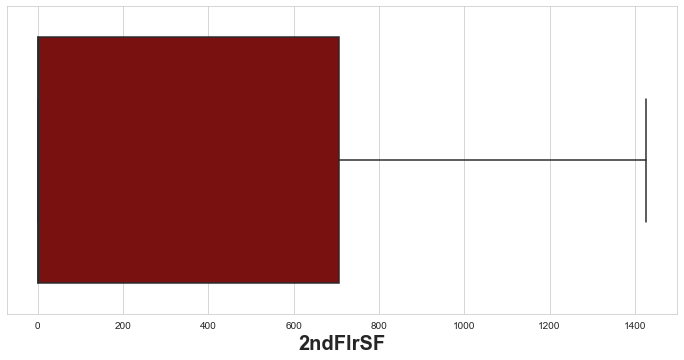

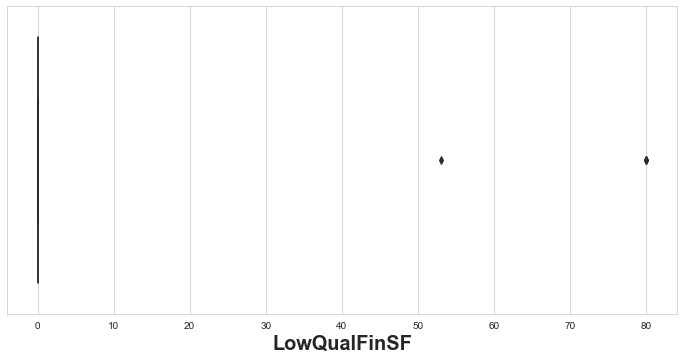

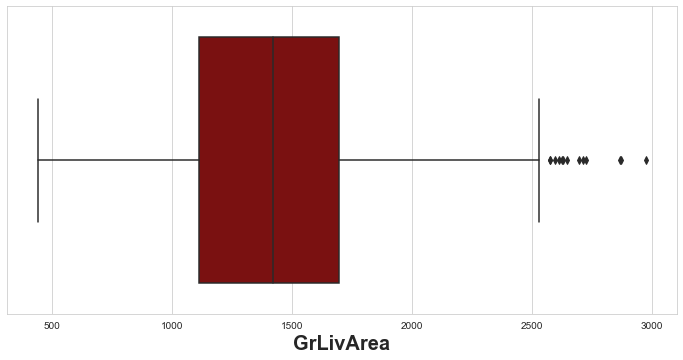

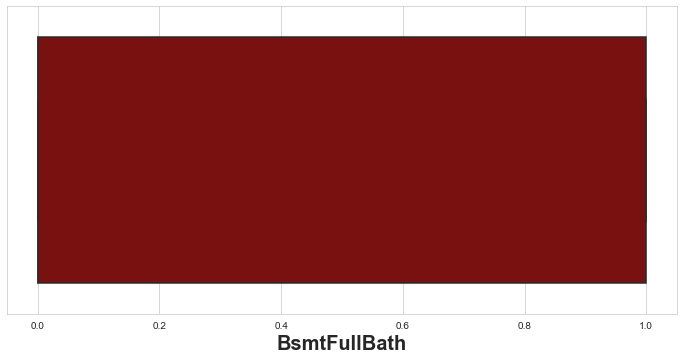

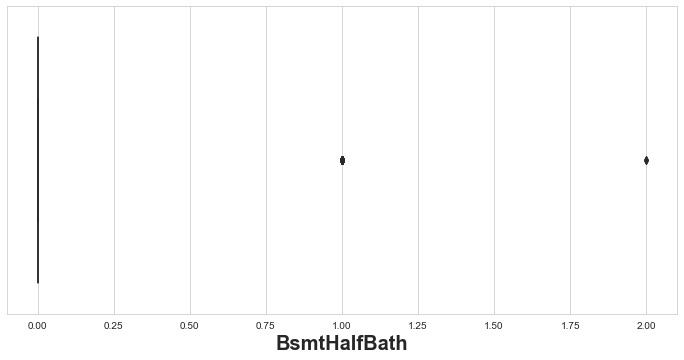

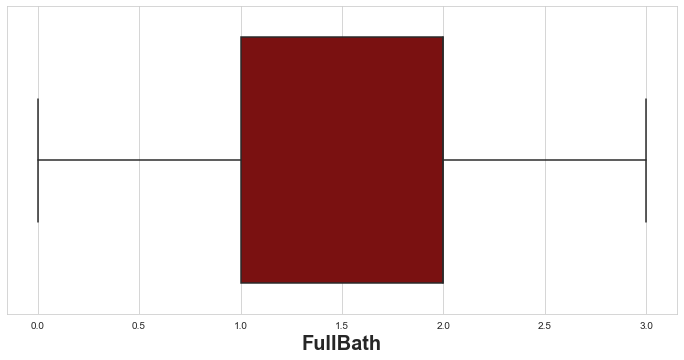

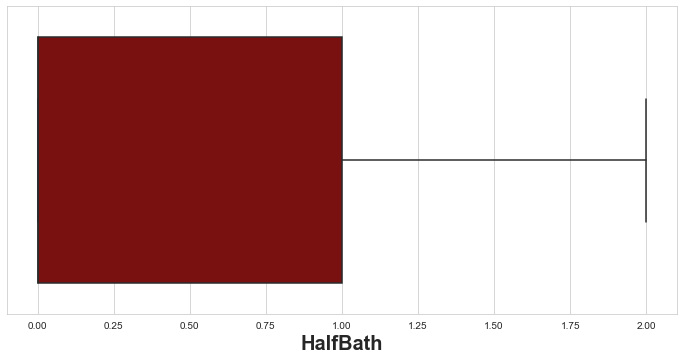

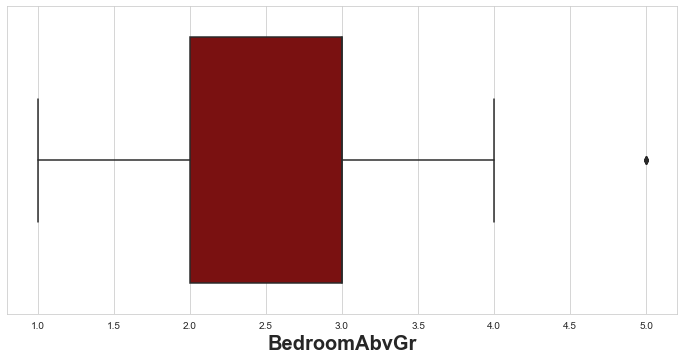

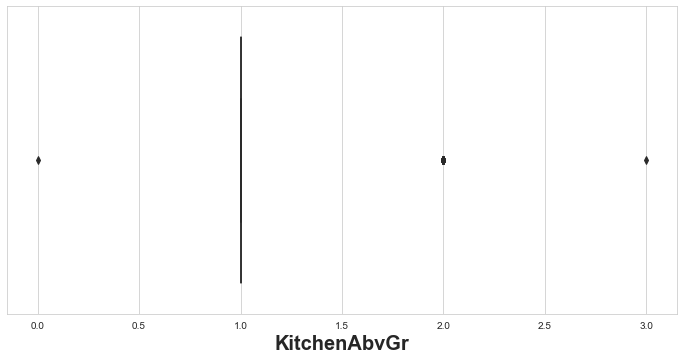

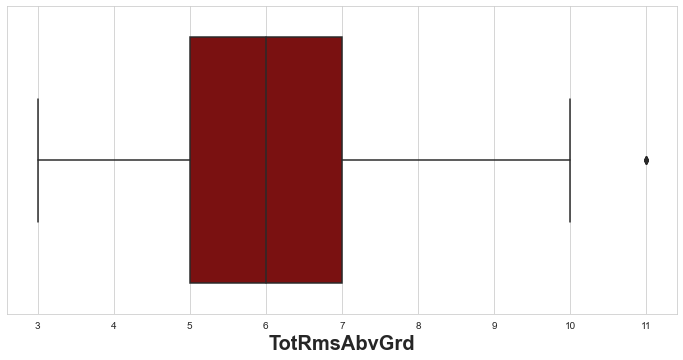

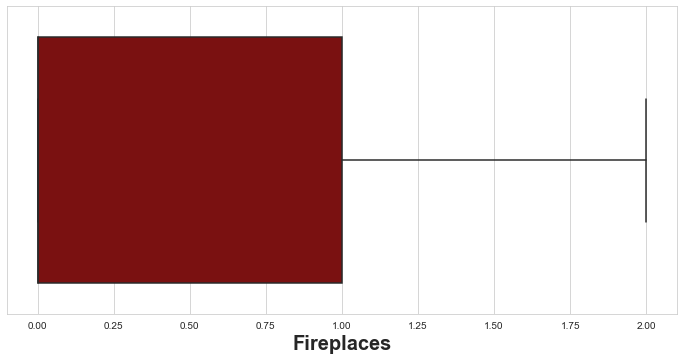

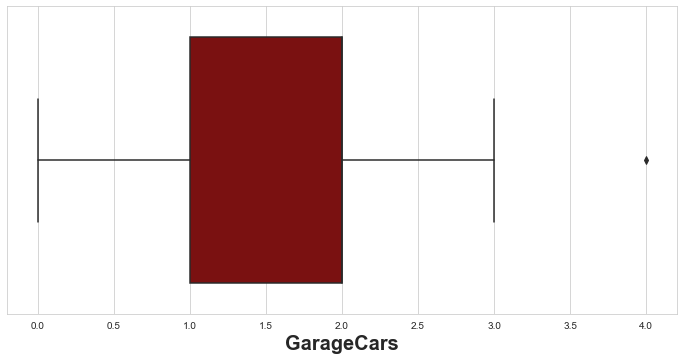

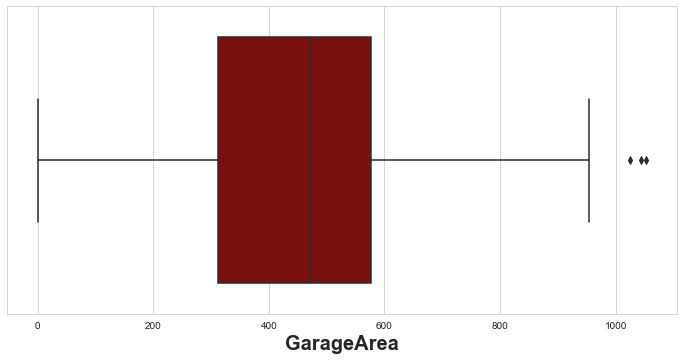

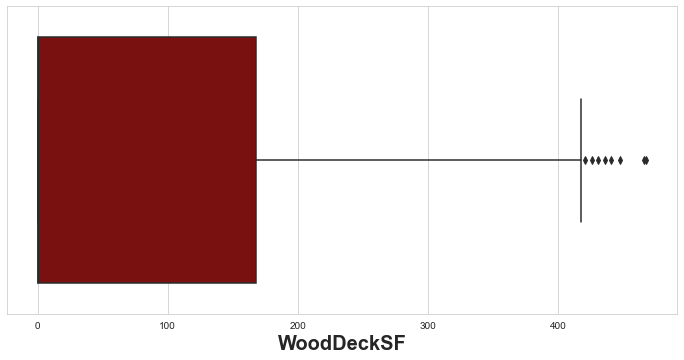

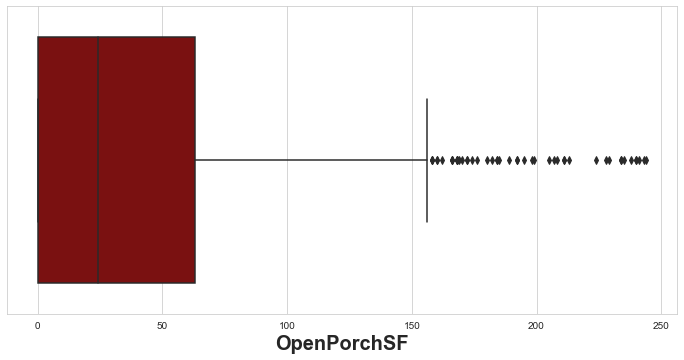

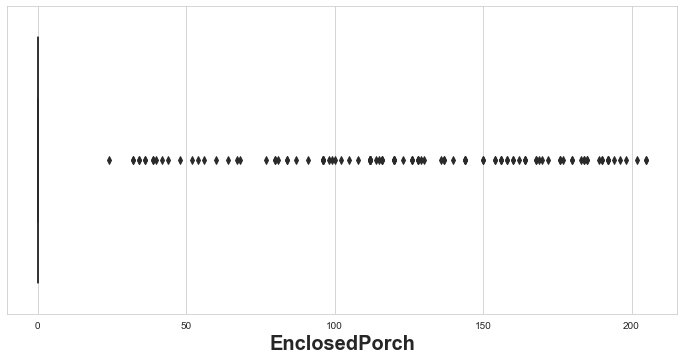

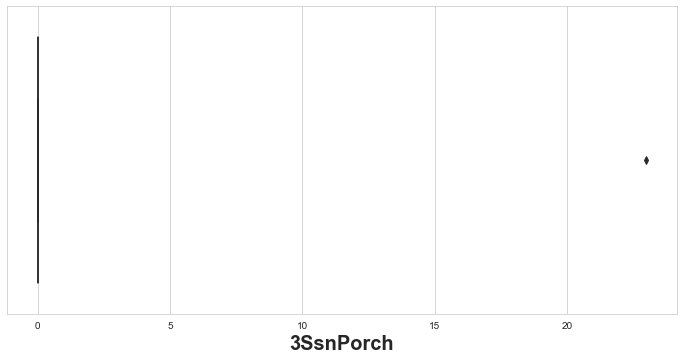

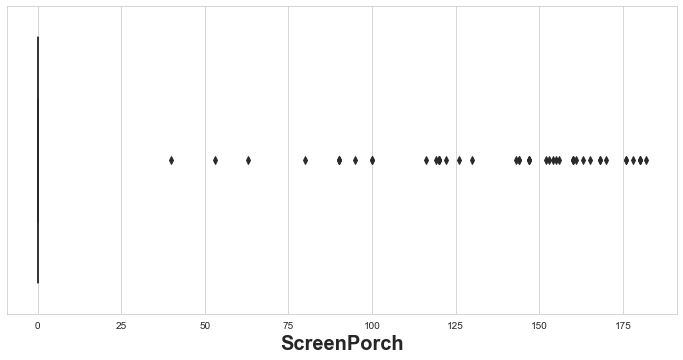

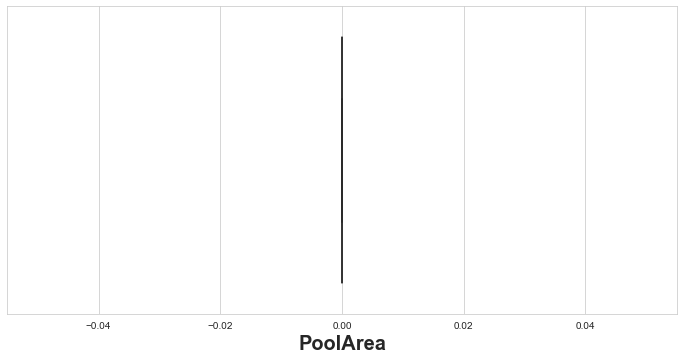

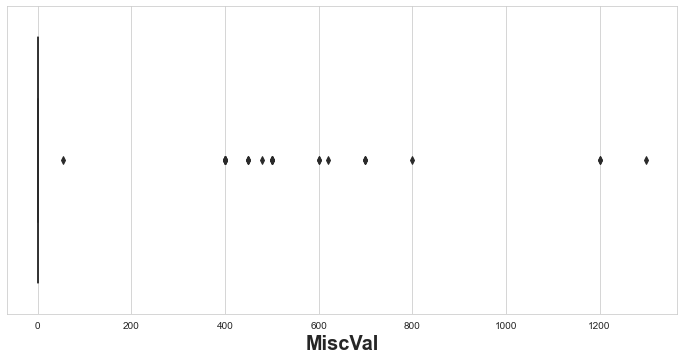

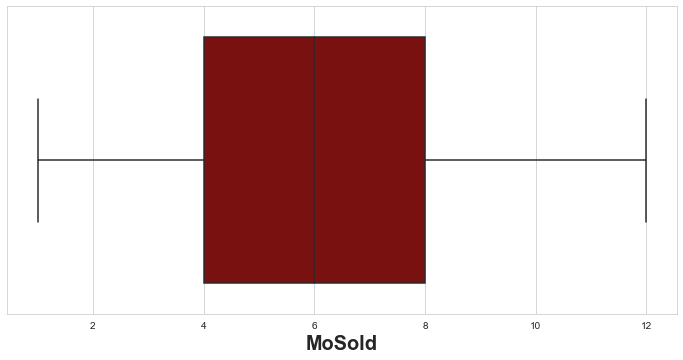

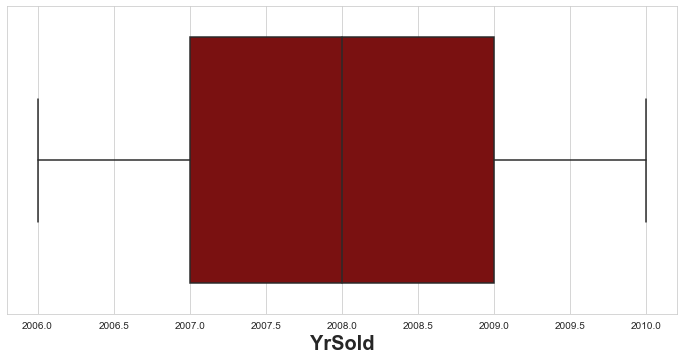

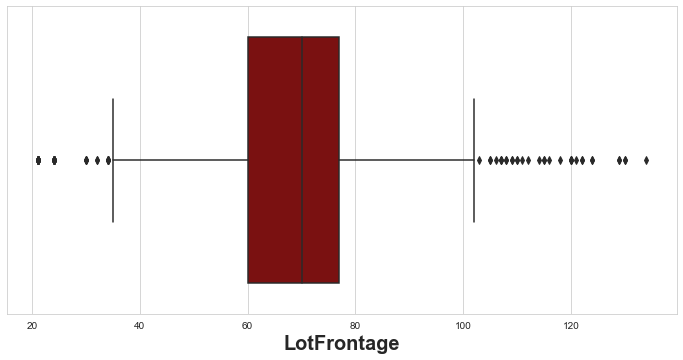

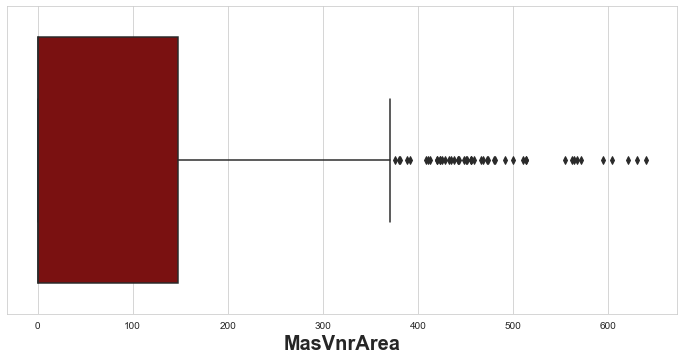

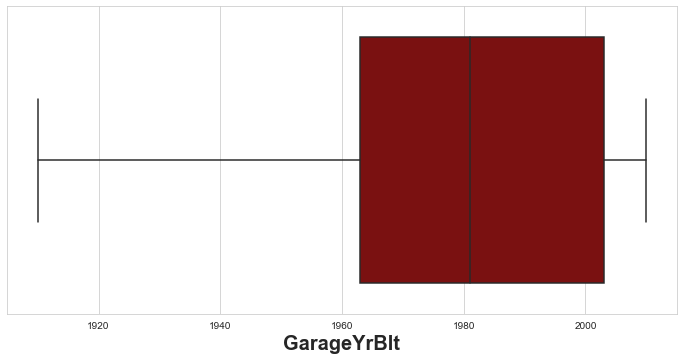

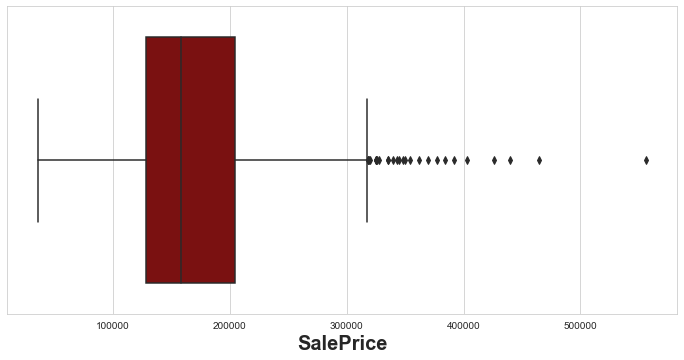

In [177]:
# ploting the boxplot plot for all continuous column with for loop
plotnumber = 1

for columns in cont_col:
    if plotnumber <= 37:
        plt.figure(figsize = (12,250))
        ax = plt.subplot(37,1, plotnumber)
        sns.boxplot(data[columns], color = 'darkred')
        plt.xlabel(columns, fontsize = 20, fontweight = 'bold')
        plotnumber+=1
plt.show()

We have removed all the outliers from the data set with the help of z-score & we also had compared the by re-visualising the distribution & outliers and found & observed that data has been much sorted from the previous distribution.

# Encoding.

In [178]:
# making a list of object data type columns and getting the lentgh of all oject data type columns.
obj_data = (data.dtypes=='object')
columns_with_obj = data.columns[obj_data].tolist()
print(columns_with_obj, '\n')
print('Length of Object Data Type Columns : ', len(columns_with_obj))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'] 

Length of Object Data Type Columns :  41


In [179]:
# for loop for encoding the object data types column into float data type with ordinal encoder.
ord_enc = OrdinalEncoder()

for columns in columns_with_obj:
    data[columns] = ord_enc.fit_transform(data[columns].values.reshape(-1,1))

In [180]:
# after encoding getting the total information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017 entries, 0 to 291
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1017 non-null   int64  
 1   MSZoning       1017 non-null   float64
 2   LotFrontage    1017 non-null   float64
 3   LotArea        1017 non-null   int64  
 4   Street         1017 non-null   float64
 5   Alley          1017 non-null   float64
 6   LotShape       1017 non-null   float64
 7   LandContour    1017 non-null   float64
 8   Utilities      1017 non-null   float64
 9   LotConfig      1017 non-null   float64
 10  LandSlope      1017 non-null   float64
 11  Neighborhood   1017 non-null   float64
 12  Condition1     1017 non-null   float64
 13  Condition2     1017 non-null   float64
 14  BldgType       1017 non-null   float64
 15  HouseStyle     1017 non-null   float64
 16  OverallQual    1017 non-null   int64  
 17  OverallCond    1017 non-null   int64  
 18  YearBuilt

In [181]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3.0,70.0,4928,1.0,1.0,0.0,3.0,0.0,4.0,...,0,0,0,2.0,0,2,2007,8.0,4.0,128000.0
2,60,3.0,92.0,9920,1.0,0.0,0.0,3.0,0.0,1.0,...,0,0,0,0.0,0,6,2007,8.0,4.0,269790.0
3,20,3.0,105.0,11751,1.0,1.0,0.0,3.0,0.0,4.0,...,0,0,0,2.0,0,1,2010,0.0,4.0,190000.0
4,20,3.0,70.0,16635,1.0,1.0,0.0,3.0,0.0,2.0,...,0,0,0,2.0,0,6,2009,8.0,4.0,215000.0
5,60,3.0,58.0,14054,1.0,0.0,0.0,3.0,0.0,4.0,...,0,0,0,0.0,0,11,2006,6.0,5.0,219210.0


Encoding of the Object Data Type columns are done. At first we made a list of all the object data type and after that we used Ordinal encoder in a for loop to convert all the object data types columns into float data type column. We confirmed encoding of columns by rechecking data information.

We have 2 columns in the data set in which only 1 kind of data is present that means their value counts is 1, which is commen for all the other column and target column so we do not need these column for model building hence it is better to drop these columns from the data set.

These columns are ```Utilities``` & ```PoolArea```. In ```Utilities``` column there was only one category with the name of ```AllPub``` & after encoding it became 0.0

In PoolArea there were values other than 0 but after removal of outliers all other values got removed and only 0 left.

Hence both these column in the data set will add no value in the prediction because they are saturated columns and their relation is common with other column. So it is better to reove these column from the data set.

In [182]:
data = data.drop(columns = ['Utilities', 'PoolArea'])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3.0,70.0,4928,1.0,1.0,0.0,3.0,4.0,0.0,...,0,0,0,2.0,0,2,2007,8.0,4.0,128000.0
2,60,3.0,92.0,9920,1.0,0.0,0.0,3.0,1.0,0.0,...,0,0,0,0.0,0,6,2007,8.0,4.0,269790.0
3,20,3.0,105.0,11751,1.0,1.0,0.0,3.0,4.0,0.0,...,0,0,0,2.0,0,1,2010,0.0,4.0,190000.0
4,20,3.0,70.0,16635,1.0,1.0,0.0,3.0,2.0,0.0,...,0,0,0,2.0,0,6,2009,8.0,4.0,215000.0
5,60,3.0,58.0,14054,1.0,0.0,0.0,3.0,4.0,0.0,...,0,0,0,0.0,0,11,2006,6.0,5.0,219210.0


# Separating the Train Data & Test Data.

In [183]:
# Seperating & making a data frame for the test data where saleprice column has all null values
test_data = data[data.SalePrice.isnull()]
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,3.0,86.0,14157,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,2.0,0,7,2007,8.0,4.0,NaN
2,20,3.0,70.0,11838,1.0,1.0,3.0,3.0,4.0,0.0,...,0,0,0,2.0,0,6,2009,8.0,4.0,NaN
3,70,3.0,75.0,12000,1.0,0.0,3.0,0.0,4.0,0.0,...,0,0,0,0.0,0,7,2009,8.0,4.0,NaN
4,60,3.0,86.0,14598,1.0,0.0,0.0,3.0,1.0,0.0,...,0,0,0,0.0,0,1,2008,8.0,4.0,NaN
5,180,4.0,21.0,1936,1.0,0.0,3.0,3.0,4.0,0.0,...,0,0,0,2.0,0,12,2007,8.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,3.0,78.0,10206,1.0,1.0,3.0,3.0,4.0,0.0,...,0,0,0,2.0,0,10,2008,8.0,4.0,NaN
288,20,3.0,57.0,9245,1.0,1.0,1.0,3.0,4.0,0.0,...,0,0,0,2.0,0,2,2008,8.0,4.0,NaN
289,20,3.0,70.0,11241,1.0,1.0,0.0,3.0,1.0,0.0,...,0,0,0,2.0,700,3,2010,8.0,4.0,NaN
290,50,4.0,50.0,5000,1.0,0.0,3.0,3.0,0.0,0.0,...,36,0,0,1.0,0,10,2006,8.0,4.0,NaN


In [184]:
test_data = test_data.drop(columns = ['SalePrice'])
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,3.0,86.0,14157,1.0,1.0,0.0,1.0,0.0,0.0,...,51,0,0,0,2.0,0,7,2007,8.0,4.0
2,20,3.0,70.0,11838,1.0,1.0,3.0,3.0,4.0,0.0,...,151,0,0,0,2.0,0,6,2009,8.0,4.0
3,70,3.0,75.0,12000,1.0,0.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0.0,0,7,2009,8.0,4.0
4,60,3.0,86.0,14598,1.0,0.0,0.0,3.0,1.0,0.0,...,18,0,0,0,0.0,0,1,2008,8.0,4.0
5,180,4.0,21.0,1936,1.0,0.0,3.0,3.0,4.0,0.0,...,0,0,0,0,2.0,0,12,2007,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,3.0,78.0,10206,1.0,1.0,3.0,3.0,4.0,0.0,...,99,0,0,0,2.0,0,10,2008,8.0,4.0
288,20,3.0,57.0,9245,1.0,1.0,1.0,3.0,4.0,0.0,...,0,0,0,0,2.0,0,2,2008,8.0,4.0
289,20,3.0,70.0,11241,1.0,1.0,0.0,3.0,1.0,0.0,...,0,0,0,0,2.0,700,3,2010,8.0,4.0
290,50,4.0,50.0,5000,1.0,0.0,3.0,3.0,0.0,0.0,...,24,36,0,0,1.0,0,10,2006,8.0,4.0


In [185]:
# dropping all the rows having null values as null values rows are test data and that way we are seperating train & test data.
train_data = data.dropna()
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3.0,70.0,4928,1.0,1.0,0.0,3.0,4.0,0.0,...,0,0,0,2.0,0,2,2007,8.0,4.0,128000.0
2,60,3.0,92.0,9920,1.0,0.0,0.0,3.0,1.0,0.0,...,0,0,0,0.0,0,6,2007,8.0,4.0,269790.0
3,20,3.0,105.0,11751,1.0,1.0,0.0,3.0,4.0,0.0,...,0,0,0,2.0,0,1,2010,0.0,4.0,190000.0
4,20,3.0,70.0,16635,1.0,1.0,0.0,3.0,2.0,0.0,...,0,0,0,2.0,0,6,2009,8.0,4.0,215000.0
5,60,3.0,58.0,14054,1.0,0.0,0.0,3.0,4.0,0.0,...,0,0,0,0.0,0,11,2006,6.0,5.0,219210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,3.0,70.0,9819,1.0,1.0,0.0,3.0,4.0,0.0,...,0,0,0,2.0,0,2,2010,8.0,4.0,122000.0
1164,20,3.0,67.0,8777,1.0,1.0,3.0,3.0,4.0,0.0,...,0,0,0,2.0,0,5,2009,8.0,4.0,108000.0
1165,160,3.0,24.0,2280,1.0,0.0,3.0,3.0,2.0,0.0,...,0,0,0,0.0,0,7,2009,8.0,4.0,148500.0
1166,70,0.0,50.0,8500,1.0,1.0,3.0,3.0,4.0,0.0,...,172,0,0,2.0,0,7,2008,8.0,4.0,40000.0


# Data Scaling.

In [186]:
# splitting the train data into feature & label
x = train_data.drop(columns = 'SalePrice')
y = train_data['SalePrice']

# scaling the train features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.64968731,  0.00739052,  0.09502828, ..., -0.59228546,
         0.31778555,  0.17336671],
       [ 0.12913492,  0.00739052,  1.29602394, ..., -0.59228546,
         0.31778555,  0.17336671],
       [-0.88456666,  0.00739052,  2.00570319, ...,  1.63077702,
        -5.08295563,  0.17336671],
       ...,
       [ 2.6633889 ,  0.00739052, -2.41614447, ...,  0.88975619,
         0.31778555,  0.17336671],
       [ 0.38256032, -4.63200952, -0.99678596, ...,  0.14873536,
         0.31778555,  0.17336671],
       [ 0.12913492,  0.00739052,  0.09502828, ..., -1.33330629,
         0.31778555,  0.17336671]])

In [187]:
# scaling the test data

scaled_test = scaler.fit_transform(test_data)
scaled_test

array([[-0.80235315, -0.06443237,  1.12708712, ..., -0.54101467,
         0.23855936,  0.1459002 ],
       [-0.80235315, -0.06443237,  0.2466936 , ...,  0.98058908,
         0.23855936,  0.1459002 ],
       [ 0.35026909, -0.06443237,  0.52181657, ...,  0.98058908,
         0.23855936,  0.1459002 ],
       ...,
       [-0.80235315, -0.06443237,  0.2466936 , ...,  1.74139096,
         0.23855936,  0.1459002 ],
       [-0.1107798 ,  1.38529605, -0.8537983 , ..., -1.30181654,
         0.23855936,  0.1459002 ],
       [ 2.42498912,  1.38529605, -2.44951155, ..., -1.30181654,
         0.23855936,  0.1459002 ]])

# Finding Best Random State.

In [188]:
max_accu = 0
best_rs = 0

for i in range(1,2000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    y_pred = lin_reg.predict(x_test)
    accuracy = r2_score(y_test, y_pred)
    if accuracy > max_accu:
        max_accu = accuracy
        best_rs = i
print('Mximum Accuracy is :',max_accu, 'at Random State ', best_rs)

Mximum Accuracy is : 0.9305102798580087 at Random State  423


We got the best random state ```423``` which gave the maximum accuracy of 93.05%, which is good accuracy, now we will create train test split and will start building models.

## Creating Train Test Split.

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 423)

# Machine Learning Model Building.

## 1. Linear Regression Model.

In [190]:
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred_lr = LR.predict(x_test)
print("r2_score of linear regression model is :", r2_score(y_test, y_pred_lr))
print("Mean Squared Error Of the Linear Regression Model is :", mean_squared_error(y_test, y_pred_lr))

r2_score of linear regression model is : 0.9305102798580087
Mean Squared Error Of the Linear Regression Model is : 337985181.7112748


### Regulaization of the model.

#### Lasso Regression.

In [191]:
lassocv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lassocv.fit(x_train, y_train)
alpha = lassocv.alpha_
alpha

21.375333116658275

In [192]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)
y_pred_lasso = lasso_reg.predict(x_test)
print("r2_score of lasso regression is ", r2_score(y_test, y_pred_lasso))
print("Mean Squared Error of lasso regression is ", mean_squared_error(y_test, y_pred_lasso))

r2_score of lasso regression is  0.9307027865352177
Mean Squared Error of lasso regression is  337048864.74030197


#### Ridge Regression

In [193]:
ridgecv = RidgeCV(alphas = np.arange(0.001,1,0.01), normalize = True)
ridgecv.fit(x_train, y_train)
alpha2 = ridgecv.alpha_
alpha2

0.15099999999999997

In [194]:
ridge_reg = Ridge(alpha2)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)
print("r2_score of ridge regression is ", r2_score(y_test, y_pred_ridge))
print("Mean Squared Error of Ridge Regression is ", mean_squared_error(y_test, y_pred_ridge))

r2_score of ridge regression is  0.9304986522738888
Mean Squared Error of Ridge Regression is  338041736.1357794


## Model 2 Polynomial Regression.

In [195]:
# transforming the degree of train & test data
poly_feature = PolynomialFeatures(degree=3)
x_train_poly = poly_feature.fit_transform(x_train)
x_test_poly = poly_feature.fit_transform(x_test)

In [196]:
LR.fit(x_train_poly, y_train)
y_pred_poly = LR.predict(x_test_poly)
print("r2_score of Polynomial Regression is ", r2_score(y_test, y_pred_poly))
print("Mean Squared Error of Polynomial Regression is ", mean_squared_error(y_test, y_pred_poly))

r2_score of Polynomial Regression is  0.9108296062033461
Mean Squared Error of Polynomial Regression is  433708348.3577887


## Model 3 K-Neighbors Regressor.

In [197]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print('r2_score of KNN Model is ', r2_score(y_test, y_pred_knn))
print('Mean Squared Error of KNN Model is ', mean_squared_error(y_test, y_pred_knn))

r2_score of KNN Model is  0.831133171293738
Mean Squared Error of KNN Model is  821337108.1171428


## Model 4 Decision Tree Regressor.

In [198]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
y_pred_dt = DT.predict(x_test)
print("r2_score of Decision Tree Regressor is ", r2_score(y_test, y_pred_dt))
print("Mean Squared Error of Decision Tree Regressor is ", mean_squared_error(y_test, y_pred_dt))

r2_score of Decision Tree Regressor is  0.7942991814147286
Mean Squared Error of Decision Tree Regressor is  1000490841.0285715


## Model 5 Random Forest Regressor.

In [199]:
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)
print("r2_score of Random Forest Regressor is ", r2_score(y_test, y_pred_rf))
print("Mean Squared Error of Random Forest Regressor is ", mean_squared_error(y_test, y_pred_rf))

r2_score of Random Forest Regressor is  0.9099898550198685
Mean Squared Error of Random Forest Regressor is  437792743.22597903


## Model 6 XGBoost Regressor.

In [200]:
! pip install xgboost

In [201]:
from xgboost import XGBRegressor

In [202]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
print("r2_score of XGB Regressor is ", r2_score(y_test, y_pred_xgb))
print("Mean Squared Error of XGB Regressor is ", mean_squared_error(y_test, y_pred_xgb))

r2_score of XGB Regressor is  0.8968271345378613
Mean Squared Error of XGB Regressor is  501813787.8471903


## Model 7 Support Vector Regressor.

In [203]:
svr = SVR()
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
print('r2_score of Support Vector Regressor is ', r2_score(y_test, y_pred_svr))
print('Mean Squared Error of Support Vector Regressor is ', mean_squared_error(y_test, y_pred_svr))

r2_score of Support Vector Regressor is  -0.08007104818505972
Mean Squared Error of Support Vector Regressor is  5253266364.23339


We have built 7 Machine Learning Regression models for Housing Price prediction & 2 regularization models of Linear Regression model. Out of which Linear Regression model has given the highest accuracy score which is 93.05%, it's 2 regulaization model has also given almost same accuracy score. Support Vector Regressor has give the worst score which is -8%.

Accuracy Score of models is as follows:-

* **Linear Regression** Model r2 accuracy score is = ```0.9305102798580087```
* **Lasso Regression** Model r2 accuracy score is = ```0.9307027865352177```
* **Ridge Regression** Model r2 accuracy score is = ```0.9304986522738888```
* **Polynomial Regression** Model r2 accuracy score is = ```0.9108296062033461```
* **K-Nearest Neighbors Regressor** Model r2 accuracy score is = ```0.831133171293738```
* **Decision Tree Regressor** Model r2 accuracy score is = ```0.791015886831979```
* **Random Forest Regressor** Model r2 accuracy score is = ```0.9103908113045052```
* **XG Boost Regressor** Model r2 accuracy score is = ```0.8968271345378613```
* **Support Vector Regressor** Model r2 accuracy score is = ```-0.08007104818505972```

# Cross Validation of the Models.

In [204]:
# cross validation score of Linear Regression Model

cvs = cross_val_score(LR, x_scaled, y, cv = 20, scoring = 'r2')
print('Cross Validation Score of Linear Regression Model is ', cvs.mean())

Cross Validation Score of Linear Regression Model is  0.8766040250632579


In [205]:
# cross validation score of Lasso Regression Model

cvs = cross_val_score(lasso_reg, x_scaled, y, cv = 20, scoring = 'r2')
print('Cross Validation Score of Lasso Regression Model is ', cvs.mean())

Cross Validation Score of Lasso Regression Model is  0.8768639308207126


In [206]:
# cross validation score of Ridge Regression Model

cvs = cross_val_score(ridge_reg, x_scaled, y, cv = 20, scoring = 'r2')
print('Cross Validation Score of Ridge Regression Model is ', cvs.mean())

Cross Validation Score of Ridge Regression Model is  0.8764875865804139


In [207]:
# cross validation score of Polynomial Regression Model

cvs = cross_val_score(LR, poly_feature.fit_transform(x_scaled), y, cv = 20, scoring = 'r2')
print('Cross Validation Score of Polynomial Regression Model is ', cvs.mean())

Cross Validation Score of Polynomial Regression Model is  0.8419583403051343


In [208]:
# cross validation score of K-Nearest Neighbors Regressor Model

cvs = cross_val_score(knn, x_scaled, y, cv = 20, scoring = 'r2')
print('Cross Validation Score of KNN Regressor Model is ', cvs.mean())

Cross Validation Score of KNN Regressor Model is  0.8114889371456041


In [209]:
# cross validation score of Decision Tree Regressor Model

cvs = cross_val_score(DT, x_scaled, y, cv = 20, scoring = 'r2')
print('Cross Validation Score of Decision Tree Regressor Model is ', cvs.mean())

Cross Validation Score of Decision Tree Regressor Model is  0.7009554645153325


In [210]:
# cross validation score of Random Forest Regressor Model

cvs = cross_val_score(RF, x_scaled, y, cv = 20, scoring = 'r2')
print('Cross Validation Score of Random Forest Regressor Model is ', cvs.mean())

Cross Validation Score of Random Forest Regressor Model is  0.870498481872868


In [211]:
# cross validation score of XG Boost Regressor Model

cvs = cross_val_score(xgb, x_scaled, y, cv = 20, scoring = 'r2')
print('Cross Validation Score of XG Boost Regressor Model is ', cvs.mean())

Cross Validation Score of XG Boost Regressor Model is  0.8641200787246086


In [212]:
# cross validation score of XG Boost Regressor Model

cvs = cross_val_score(svr, x_scaled, y, cv = 20, scoring = 'r2')
print('Cross Validation Score of Support Vector Regressor Model is ', cvs.mean())

Cross Validation Score of Support Vector Regressor Model is  -0.06280947105551629


We have successfully cross validated all the 9 models with 20 folds **(CV = 20)** and got the mean score of each model as follows:-

* **Linear Regression Model** Cross Validation Mean Score = ```0.8766040250632579```.
* **Lasso Regression Model** Cross Validation Mean Score = ```0.8768639308207126```.
* **Ridge Regression Model** Cross Validation Mean Score = ```0.8764875865804139```.
* **Polynomial Regression Model** Cross Validation Mean Score = ```0.8419583403051343```.
* **K-Nearest Neighbors Regressor Model** Cross Validation Mean Score = ```0.8114889371456041```.
* **Decision Tree Regressor Model** Cross Validation Mean Score = ```0.7315444021902423```.
* **Random Forest Regressor Model** Cross Validation Mean Score = ```0.8721079772546659```.
* **XG BOOST Regressor Model** Cross Validation Mean Score = ```0.8641200787246086```.
* **Support Vector Regressor Model** Cross Validation Mean Score = ```-0.06280947105551629```.

After cross validating of all the models we have analyzed that **Lasso Regularization** of **Linear Regression** Model & also **Linear Regression** has given the best accuracy score in both the model accuracy score & model cross validation score. Over all every model has given good cross validation score except **Support Vector Regressor** Model, this model has given worst score on both model accuracy & cross validation score. 

Now we will see the minimum difference between model ```accuracy score``` & ```cross validation score```. And whichever model have the minimum difference we will choose that model for ```Housing Price Prediction``` Project.

To check the minimum difference between model ```accuracy score``` & ```cross validation score``` I have calculated the same on a excel sheet. The result is as follows:-


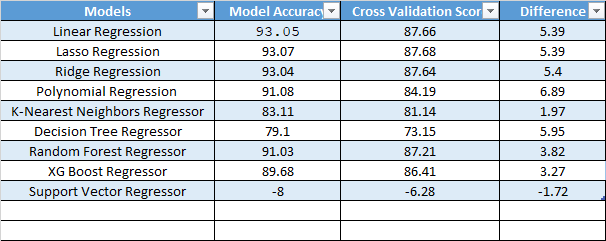

From above table we can see that though **Linear Regression, Lasso Regression, Ridge Regression, Random Forest & XG Boost** model have performed best and given the highest score but the **K-Nearest Neighbors Regressor** has given the minimum difference between ```Model accuracy score``` & ```Model cross validation score```. Which proves that **KNN** model is not overfit or underfit model it has very less difference between ```accuracy score``` & ```cross validation score```.

Hence we are going to finalize **K-Nearest Neighbors Regressor** model for our **```Housing Price Prediction Project```** & we will try to hyper tune the model in case if we can get better accuracy.

# Hyper Parameter Tuning.

In [213]:
# defining all the important parameters of KNN for hyper parameter tuning

params = {'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21],
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
          'leaf_size' : [10,20,30,40,50,60,70,80,90,100],
          'p' : [1,2],
          'metric' : ['minkowski', 'euclidean', 'hamming']
          }

In [214]:
# training the gridsearch cv with defined parameters to get the best parameters to increase the accuracy
grid_search = GridSearchCV(estimator = knn, param_grid = params, cv = 5, n_jobs = -1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'metric': ['minkowski', 'euclidean', 'hamming'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [215]:
# getting the best parameters from gridsearch cv
grid_search.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

## Building KNN Model with Tuned Parameters.

In [216]:
# training & testing knn model with best parameters
knn_HT = KNeighborsRegressor(n_neighbors = 5, algorithm = 'auto', leaf_size = 10, metric = 'minkowski', p = 1, weights = 'distance')
knn_HT.fit(x_train, y_train)
y_pred_knnht = knn_HT.predict(x_test)
print('r2_score of Hyper Tuned KNN Model is ', r2_score(y_test, y_pred_knnht))
print('Mean Squared Error of Hyper Tuned KNN Model is ', mean_squared_error(y_test, y_pred_knnht))

r2_score of Hyper Tuned KNN Model is  0.8638590476872827
Mean Squared Error of Hyper Tuned KNN Model is  662164481.47637


We have done with Hyper parameter tuning of K-Nearest Neighbors algorithm with some good productivity as we significantly increased the model's accuracy by more than 3% with the help of hyper parameter tuning.

So, here we have completed the machine learning model building & we ended up by building **```K-NearestNeighborsRegressor```** algorithm's model for the **```Housing Price Prediction Project```**. Now we will complete this project by saving the model & by predicting the test data with the saved model.

# Model Saving with Pickle.

In [217]:
filename = 'Housing Price Prediction Model'
pickle.dump(knn_HT, open(filename, 'wb'))

Model has been saved successfullu in the local system.

## Loading & Predicting the Test Data with Loaded Model.

In [218]:
loaded_model = pickle.load(open(filename, 'rb'))           # loading the saved model from local system
price_prediction = loaded_model.predict(scaled_test)       # predicting the test data by loaded model
price_prediction

array([346352.2772568 , 208706.86872584, 176549.62263565, 207248.35914116,
        83616.15340808, 145317.68926119, 103140.0840168 , 133130.22239041,
       121585.16522153, 132389.77623788, 114404.6969364 , 125839.51480473,
       169035.03788435, 212692.9857871 , 159678.14030636,  96261.57308014,
       182942.28405651, 175253.88602113, 103439.79028199, 112490.71104367,
       200775.17008698, 113221.36897093, 167266.75624122, 191187.53645648,
       105328.26458147, 297345.54581777, 208284.0218329 , 185881.43994657,
       160433.4033121 , 123812.74905836, 124243.73495735, 121881.12965533,
        87262.07854161, 141463.66368921, 186978.66308042, 247139.63473467,
        94195.42623261, 231664.21358946, 139668.78433192, 204262.65557742,
       102943.04850169, 197189.51286268, 146543.29575198, 256534.85667883,
       235463.81493918, 250017.33291785, 145273.05395658, 193795.86453603,
       128482.1221186 , 170272.0536276 , 116962.79794311, 150519.58423795,
       180984.8325783 , 2

We have successfully loaded the saved model from the local system and also predicted the test data from the loaded model now we have predicted housing price value of test data. We will conclude this project by making a data frame of predicted price of test data.

# Conclusion.

In [219]:
# making a data frame for predicted price of housing test data.

Predicted_price = pd.DataFrame({})
Predicted_price['Predicted Price'] = price_prediction
Predicted_price

,Predicted Price
0,346352.277257
1,208706.868726
2,176549.622636
3,207248.359141
4,83616.153408
...,...
175,250215.091262
176,131527.932575
177,143747.523698
178,143082.397930


Here our project of Housing Price Prediction is completed with conclusion which we concluded by predicting the price of housings of Hosuing test data.

And we have saved the predicted price of housing in a Data Frame named **Predicted_price**. You can now evaluate this prediction.

# FINISHED.

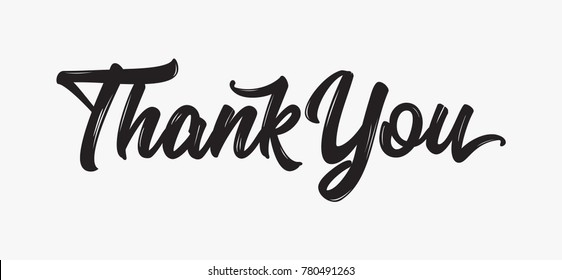